# Подключение библиотек и загрузка данных

In [ ]:
#@title Подключение библиотек
import pandas as pd
import numpy as np

In [ ]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [ ]:
#@title Графические библиотеки

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
#@title Метрики
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [ ]:
#@title Библиотеки для регрессий
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
#@title Загрузка библиотеки для кодировки категориальных признаков
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
import copy
import time
import category_encoders as ce

In [ ]:
#@title Загрузка данных
from google.colab import files

#uploaded = files.upload()

In [ ]:
all_cars = pd.read_csv('https://raw.githubusercontent.com/allkon14/car_price_pred/main/car_price.csv')

In [ ]:
#@title Переименовывание название столбцов для удобства
all_cars = all_cars.rename(columns={"Engine volume": "EngV",
                                    "Prod. year": "Prod_year",
                                    "Leather interior": "Leather_inter",
                                    "Fuel type": "Type",
                                    "Gear box type":"Gearbox",
                                    "Drive wheels":"Drive",
                                    "Wheel":"Steering"
                                    })
all_cars.head()

ID  Price  Levy Manufacturer    Model  Prod_year   Category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  Leather_inter    Type EngV    Mileage  Cylinders    Gearbox  Drive   Doors  \
0           Yes  Hybrid  3.5  186005 km        6.0  Automatic    4x4  04-May   
1            No  Petrol    3  192000 km        6.0  Tiptronic    4x4  04-May   
2            No  Petrol  1.3  200000 km        4.0   Variator  Front  04-May   
3           Yes  Hybrid  2.5  168966 km        4.0  Automatic    4x4  04-May   
4           Yes  Petrol  1.3   91901 km        4.0  Automatic  Front  04-May   

           Steering   Color  Airbags  
0        Left wheel  Silver       12  
1        Left wheel   Black        8  
2  Right-hand drive   Black        2  
3        Left wheel   White        0  
4        Left wheel  Silver        4

# Информация о признаках

### Описание набора данных



Выбранный набор данных имеет 19237 объектов, для каждого из которых имеется 18 признаков

### Текстовое описание каждого признака



ID - уникальный номер для каждого объекта в таблице. Не несет смыслового значения для выявления закономерностей

Price - цена автомобиля (целевой признак). Валюта не определена, возмем USD

Levy - налог на экспорт и импорт автомобиля. Данный атрибут имеет ту же валюту, что и целевой признак. Может быть по размеру больше, чем целевой признак (не знаем, это нормально или значения налога не могут превышать стоимость автомобиля)

Manufacturer - производитель автомобиля

Model - модель автомобиля

Prod. year - год производства автомобиля

Category - тип кузова автомобиля

Leather interior - является ли салон автомобиля кожаным

Fuel type - тип топлива, используемого в автомобиле

Engine volume - объем двигателя автомобиля

Mileage - пробег автомобиля

Cylinders - количество цилиндров в двигателе автомобиля

Gear box type - тип коробки передач в автомобиле

Drive wheels - тип привода автомобиля

Doors - количество дверей в автомобиле

Wheel - тип рулевого управления в автомобиле

Color - цвет автомобиля

Airbags - количество подушек безопасности в автомобиле

### Информация

In [ ]:
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             19237 non-null  int64  
 1   Price          19237 non-null  int64  
 2   Levy           19237 non-null  object 
 3   Manufacturer   19237 non-null  object 
 4   Model          19237 non-null  object 
 5   Prod_year      19237 non-null  int64  
 6   Category       19237 non-null  object 
 7   Leather_inter  19237 non-null  object 
 8   Type           19237 non-null  object 
 9   EngV           19237 non-null  object 
 10  Mileage        19237 non-null  object 
 11  Cylinders      19237 non-null  float64
 12  Gearbox        19237 non-null  object 
 13  Drive          19237 non-null  object 
 14  Doors          19237 non-null  object 
 15  Steering       19237 non-null  object 
 16  Color          19237 non-null  object 
 17  Airbags        19237 non-null  int64  
dtypes: flo

In [ ]:
#@title Описание каждого числового признака
all_cars.describe()

ID         Price     Prod_year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [ ]:
#@title Описание каждого признака
all_cars.describe(include='all')

ID         Price   Levy Manufacturer  Model     Prod_year  \
count   1.923700e+04  1.923700e+04  19237        19237  19237  19237.000000   
unique           NaN           NaN    559           65   1590           NaN   
top              NaN           NaN      -      HYUNDAI  Prius           NaN   
freq             NaN           NaN   5819         3769   1083           NaN   
mean    4.557654e+07  1.855593e+04    NaN          NaN    NaN   2010.912824   
std     9.365914e+05  1.905813e+05    NaN          NaN    NaN      5.668673   
min     2.074688e+07  1.000000e+00    NaN          NaN    NaN   1939.000000   
25%     4.569837e+07  5.331000e+03    NaN          NaN    NaN   2009.000000   
50%     4.577231e+07  1.317200e+04    NaN          NaN    NaN   2012.000000   
75%     4.580204e+07  2.207500e+04    NaN          NaN    NaN   2015.000000   
max     4.581665e+07  2.630750e+07    NaN          NaN    NaN   2020.000000   

       Category Leather_inter    Type   EngV Mileage     Cylinders    Gearbox  \
count     19237         19237   19237  19237   19237  19237.000000      19237   
unique       11             2       7    107    7687           NaN          4   
top       Sedan           Yes  Petrol      2    0 km           NaN  Automatic   
freq       8736         13954   10150   3916     721           NaN      13514   
mean        NaN           NaN     NaN    NaN     NaN      4.582991        NaN   
std         NaN           NaN     NaN    NaN     NaN      1.199933        NaN   
min         NaN           NaN     NaN    NaN     NaN      1.000000        NaN   
25%         NaN           NaN     NaN    NaN     NaN      4.000000        NaN   
50%         NaN           NaN     NaN    NaN     NaN      4.000000        NaN   
75%         NaN           NaN     NaN    NaN     NaN      4.000000        NaN   
max         NaN           NaN     NaN    NaN     NaN     16.000000        NaN   

        Drive   Doors    Steering  Color       Airbags  
count   19237   19237       19237  19237  19237.000000  
unique      3       3           2     16           NaN  
top     Front  04-May  Left wheel  Black           NaN  
freq    12874   18332       17753   5033           NaN  
mean      NaN     NaN         NaN    NaN      6.582627  
std       NaN     NaN         NaN    NaN      4.320168  
min       NaN     NaN         NaN    NaN      0.000000  
25%       NaN     NaN         NaN    NaN      4.000000  
50%       NaN     NaN         NaN    NaN      6.000000  
75%       NaN     NaN         NaN    NaN     12.000000  
max       NaN     NaN         NaN    NaN     16.000000

In [ ]:
#@title Количество NaN значений
all_cars.isnull().sum()

ID               0
Price            0
Levy             0
Manufacturer     0
Model            0
Prod_year        0
Category         0
Leather_inter    0
Type             0
EngV             0
Mileage          0
Cylinders        0
Gearbox          0
Drive            0
Doors            0
Steering         0
Color            0
Airbags          0
dtype: int64

По предварительному анализу пропусков необнаружено

## Подробное описание для каждого отдельного атрибута


### ID

In [ ]:
len(all_cars.ID.unique())

18924

In [ ]:
len(all_cars)

19237

Набор данных имеет объекты-дубликаты. Это может вызвать ряд проблем при выявлений закономерностях в данных (обучении)

In [ ]:
all_cars[all_cars['ID']	== 36559154] # 42412373  42444388

ID  Price Levy   Manufacturer         Model  Prod_year  \
1107  36559154  19726    -  MERCEDES-BENZ  Sprinter 411       2002   
6732  36559154  19726    -  MERCEDES-BENZ  Sprinter 411       2002   

         Category Leather_inter    Type       EngV    Mileage  Cylinders  \
1107  Goods wagon            No  Diesel  2.2 Turbo  280000 km        4.0   
6732  Goods wagon            No  Diesel  2.2 Turbo  280000 km        4.0   

     Gearbox Drive   Doors    Steering  Color  Airbags  
1107  Manual  Rear  02-Mar  Left wheel  White        2  
6732  Manual  Rear  02-Mar  Left wheel  White        2

### Price

Цена автомобиля (целевой признак)

Количество уникальных значений

In [ ]:
len(all_cars.Price.unique())

2315

Предварительный анализ характеристик признака

In [ ]:
all_cars.Price.describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

Вывод машины с максимально ценой (скорее всего, является выбросом)

In [ ]:
display(all_cars[all_cars.Price == all_cars.Price.max()])

ID     Price Levy Manufacturer  Model  Prod_year     Category  \
16983  45812886  26307500    -         OPEL  Combo       1999  Goods wagon   

      Leather_inter    Type EngV   Mileage  Cylinders Gearbox  Drive   Doors  \
16983            No  Diesel  1.7  99999 km        4.0  Manual  Front  02-Mar   

         Steering Color  Airbags  
16983  Left wheel  Blue        0

Средняя цена на машины, в зависимости от типа привода

In [ ]:
all_cars.groupby('Drive')['Price'].mean().sort_values(ascending=False)

Drive
4x4      19535.423854
Front    18491.339055
Rear     17192.244252
Name: Price, dtype: float64

Средняя цена на машины, в зависимости от тпиа коробки передач

In [ ]:
all_cars.groupby('Gearbox')['Price'].median().sort_values(ascending=False)

Gearbox
Tiptronic    18817.0
Variator     13172.0
Automatic    12074.0
Manual        8624.0
Name: Price, dtype: float64

Средняя цена на машины, в зависимости от цвета

In [ ]:
all_cars.groupby('Color')['Price'].mean().sort_values(ascending=False)

Color
Blue             33726.850287
Yellow           20666.584906
Brown            19709.636364
Grey             19203.448000
Black            18886.917346
White            18204.295389
Carnelian red    15820.927374
Beige            15627.559701
Silver           15091.806962
Golden           14678.551724
Sky blue         14079.000000
Red              13553.275430
Orange           13008.422925
Pink             10649.076923
Green             9449.677019
Purple            8837.384615
Name: Price, dtype: float64

Средняя цена на машины, в зависимости от типа двигателя

In [ ]:
all_cars.groupby('Type')['Price'].median().sort_values(ascending=False)

Type
Plug-in Hybrid    22737.0
Diesel            20489.5
Hydrogen          20385.0
Petrol            12858.0
LPG               11604.0
Hybrid            10036.0
CNG                7527.0
Name: Price, dtype: float64

Гистограмма по цене

In [ ]:
fig = px.histogram(all_cars, x='Price', marginal='box')
fig.show()

### Levy

Levy - налог на экспорт/импорт автомобиля.

Эта величина зачастую больше, чем цена авто. Возможно, для получения итоговой цены нужно сложить Levy и Price

Количество значений, в которых встречается '-'

In [ ]:
len(all_cars[all_cars['Levy']=='-'])

5819

Из 18924 объектов 5709 имеют прочерк в данном признаке.

Возможные причины:

1. Автомобиль не имел налог на ввоз/вывоз
2. Не записали по каким-либо другим причинам

In [ ]:
all_cars.Levy.describe()

count     19237
unique      559
top           -
freq       5819
Name: Levy, dtype: object

Машина с максимальным Levy

In [ ]:
display(all_cars[all_cars.Levy == all_cars.Levy.max()])

ID  Price Levy Manufacturer     Model  Prod_year Category  \
4664  45815937   5645  997      HYUNDAI  Santa FE       2014     Jeep   

     Leather_inter    Type EngV    Mileage  Cylinders    Gearbox  Drive  \
4664           Yes  Petrol  3.3  165355 km        6.0  Automatic  Front   

       Doors    Steering  Color  Airbags  
4664  04-May  Left wheel  Black       12

### Manufacturer

Производитель

Manufacturer - производитель

Вывод всех производителей

In [ ]:
print(all_cars.Manufacturer.unique())
len(all_cars.Manufacturer.unique())

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


65

Количество машин от каждого производителя

In [ ]:
all_cars.groupby('Manufacturer')['Price'].count().sort_values(ascending=False)

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              397
MITSUBISHI        289
SUBARU            275
AUDI              255
MAZDA             183
JEEP              138
DAEWOO             91
DODGE              91
FIAT               78
SUZUKI             76
PORSCHE            54
LAND ROVER         49
MINI               48
VAZ                48
JAGUAR             42
RENAULT            37
INFINITI           30
CHRYSLER           26
SKODA              20
VOLVO              19
PEUGEOT            17
BUICK              16
ACURA              15
GMC                15
LINCOLN            15
CADILLAC           14
DAIHATSU           13
UAZ                12
GAZ                12
CITROEN             9
SCION               7
HUMMER              5
ISUZU              

Средняя цена в зависимости от производителя


In [ ]:
all_cars.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

Manufacturer
LAMBORGHINI      872946.000000
BENTLEY          197574.500000
OPEL              73305.617128
FERRARI           66955.500000
LAND ROVER        54053.489796
ASTON MARTIN      54000.000000
TESLA             53941.000000
PORSCHE           47106.037037
JAGUAR            34408.785714
HUMMER            31210.600000
SSANGYONG         30894.637188
JEEP              25409.427536
HYUNDAI           22338.447864
BMW               20876.792183
MASERATI          20149.500000
INFINITI          19774.800000
LEXUS             19191.276986
MERCEDES-BENZ     18609.382948
სხვა              17248.500000
MINI              17135.520833
SCION             16173.000000
FORD              15573.981998
KIA               15251.477435
SKODA             15079.800000
HAVAL             15053.000000
CHEVROLET         14926.368569
HONDA             14291.335722
TOYOTA            14248.982250
AUDI              14106.545098
SATURN            13799.000000
LINCOLN           13651.600000
CADILLAC          13514.50

In [ ]:
all_cars[all_cars.Manufacturer=='სხვა']

ID  Price Levy Manufacturer        Model  Prod_year  Category  \
2358  45779593  25089    -         სხვა  IVECO DAYLY       2007  Microbus   
4792  39223518   9408    -         სხვა        GONOW       2005      Jeep   

     Leather_inter    Type       EngV    Mileage  Cylinders Gearbox Drive  \
2358            No  Diesel  2.3 Turbo  328000 km        4.0  Manual  Rear   
4792           Yes  Petrol        2.3  102000 km        4.0  Manual  Rear   

       Doors    Steering   Color  Airbags  
2358  04-May  Left wheel   White        1  
4792  04-May  Left wheel  Silver        2

Оказалось, что это грузинские авто. На удивление, название марки поддерживается UTF-8

### Model

Модель автомобиля

Предварительное описание признака 'Model' - модель


In [ ]:
all_cars.Model.describe()

count     19237
unique     1590
top       Prius
freq       1083
Name: Model, dtype: object

Количество уникальных моделей

In [ ]:
len(all_cars.Model.unique())

1590

Средняя цена в зависимости от марки и модели авто

In [ ]:
all_cars.groupby(['Manufacturer','Model'])['Price'].mean().sort_values(ascending=False)


Manufacturer   Model                   
LAMBORGHINI    Urus                        872946.000000
OPEL           Combo                       740856.611111
MERCEDES-BENZ  G 65 AMG 63AMG              627220.000000
LAND ROVER     Range Rover Vogue           297930.000000
MERCEDES-BENZ  AMG GT S                    297930.000000
BMW            M5 Машина в максимально     288521.000000
MERCEDES-BENZ  GLE 400 A M G               254024.000000
BENTLEY        Continental GT              219527.000000
MERCEDES-BENZ  G 65 AMG G63 AMG            216391.000000
               GLE 400                     193287.000000
               GLE 400 Coupe, AMG Kit      193184.000000
BENTLEY        Mulsanne                    175622.000000
BMW            M6 Gran cupe                163077.000000
JAGUAR         F-type R                    150533.000000
LAND ROVER     Range Rover Velar           150533.000000
MERCEDES-BENZ  GLS 450                     148964.500000
BMW            M4 Competition              14426

Количество машин по каждой марке и производителю

In [ ]:
all_cars.groupby(['Manufacturer','Model'])['Model'].count()

Manufacturer   Model                   
ACURA          MDX                            3
               RDX                            3
               TL                             2
               TL saber                       1
               TLX                            2
               TSX                            4
ALFA ROMEO     147                            1
               159                            1
               166                            1
               Giulietta                      1
ASTON MARTIN   Virage                         1
AUDI           100                            2
               50                             1
               A3                             7
               A3 4X4                         1
               A3 PREMIUM                     1
               A4                            63
               A4 B5                          1
               A4 B6                          1
               A4 B7                          1


In [ ]:
all_cars[all_cars.Model=='318 რესტაილინგი']

ID  Price Levy Manufacturer            Model  Prod_year Category  \
8578  44528385   9408    -          BMW  318 რესტაილინგი       2004    Sedan   

     Leather_inter    Type EngV   Mileage  Cylinders    Gearbox Drive   Doors  \
8578            No  Petrol  1.9  81000 km        4.0  Tiptronic  Rear  04-May   

              Steering Color  Airbags  
8578  Right-hand drive  Blue        6

### Prod_Year

Год производства

В данном датасете представлены машины с 1939 года по 2020

In [ ]:
all_cars.Prod_year.unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973])

In [ ]:
all_cars['Prod_year'].describe(include = 'all')

count    19237.000000
mean      2010.912824
std          5.668673
min       1939.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod_year, dtype: float64

In [ ]:
all_cars.groupby(['Prod_year'])['Price'].mean().sort_values(ascending=False)

Prod_year
1999    134684.217391
1943    119172.000000
1965     65074.000000
2020     63006.106383
2018     35415.452000
1982     31361.000000
2019     30669.179739
2016     28070.765583
2017     27282.978102
2015     20866.485474
2014     18001.524482
1953     17735.250000
2013     16744.565970
1973     15681.000000
2012     15355.083063
2010     14181.331760
2011     13894.687345
2009     13623.700499
2007     13145.183190
2006     12903.429022
2008     11525.782904
2004     11196.785714
2005     11037.878109
1977     10340.500000
2003      9735.926431
2002      9306.054054
1987      8828.400000
2001      8521.728346
2000      8095.935484
1957      7527.000000
1998      7372.633803
1996      7202.921053
1964      6585.500000
1995      6427.638095
1993      6407.956522
1997      6313.139073
1994      5968.880952
1992      5677.066667
1990      5215.500000
1986      4906.833333
1988      4849.250000
1991      4746.800000
1984      4046.000000
1989      3546.333333
1985      2995.000000


In [ ]:
all_cars.groupby(['Prod_year'])['Prod_year'].count().sort_values(ascending=False)


Prod_year
2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
2010    1483
2016    1476
2017     959
2008     737
2009     601
2018     500
2007     464
2005     402
2003     367
2004     364
2006     317
2019     306
2002     296
2000     279
2001     254
1998     213
1999     207
1997     151
1996     114
1995     105
2020      47
1994      42
1992      30
1993      23
1990      18
1988      12
1991      10
1989       6
1986       6
1984       5
1987       5
1985       5
1953       4
1939       3
1983       3
1980       2
1978       2
1977       2
1965       2
1974       2
1964       2
1947       1
1957       1
1943       1
1968       1
1973       1
1976       1
1982       1
1981       1
Name: Prod_year, dtype: int64

### Category

Category - тип кузова автомобиля

In [ ]:
all_cars['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

Значение поля 'Goods wagon' - это НЕ вагоны. Это просто такой тип кузова. В интернете именно такого найти не удолось, но нашлось много со словом wagon.


//Посмотрим как влияет тип кузова на цену:
Посмотреть пока не получится, так как с ценой пока не всё понятно

In [ ]:
all_cars[all_cars['Category'] == 'Goods wagon']

ID     Price  Levy   Manufacturer                    Model  \
12     45815568      3000     -           OPEL                   Vectra   
30     44944581     15681  1288  MERCEDES-BENZ                     Vito   
149    45777114      3136     -         SUBARU                   Legacy   
179    45395938     21950   831           FORD                  Transit   
294    45764287      6272  1522           OPEL                   Zafira   
422    45507522      3000     -         SUBARU                  Outback   
456    45773579     11604   993           OPEL                    Astra   
589    44691279        70     -           FORD                  Transit   
592    45701762      6429  1438           OPEL                    Combo   
891    45527158      7840     -           FORD          Transit Connect   
896    45092576     15210     -           FORD                  Transit   
921    45784851      8467     -           FORD          Transit Connect   
940    45203976     14113     -           FORD                  Transit   
1004   45770268      6272     -           OPEL                    Astra   
1107   36559154     19726     -  MERCEDES-BENZ             Sprinter 411   
1309   45802946      5331     -           OPEL                    Combo   
1321   45814381      9408   790           FORD                    Focus   
1389   45768964      9408   777           FORD  Transit Connect ბენზინი   
1466   38263032     22577     -     VOLKSWAGEN                  Crafter   
1565   45340089      5959  1438           OPEL                    Combo   
1590   45789478      5331     -           OPEL                    Astra   
1593   45781969      7527     -           OPEL                   Vectra   
1710   45804681      1500     -           OPEL                  Omega 1   
1730   45755768      5645  1440           OPEL                    Combo   
1950   45586747      9408     -  MERCEDES-BENZ                     Vito   
1997   45762131      5959     -           OPEL                    Astra   
2066   45415669     13485   584           FORD          Transit Connect   
2139   45763592      6500     -           OPEL               Combo 2001   
2377   45583433     25716   831           FORD                  Transit   
2446   45777071     10000     -           FORD                  Transit   
2503   45516064      5000     -           OPEL                    Astra   
2525   45683846     12544     -           FORD                  Transit   
2556   45559708     11917   742           OPEL                    Astra   
2679   45774767     10506   761           FORD          Transit Connect   
2784   45760004      7840     -           OPEL                    Astra   
2823   45799575      5959     -         NISSAN                 Wingroad   
2837   45787224      8154     -           FIAT                    Doblo   
2898   45792637      4077     -     VOLKSWAGEN                    Caddy   
3003   44804664     10017   966     VOLKSWAGEN                    Caddy   
3382   45798763     10976   687        HYUNDAI                      I30   
3498   45776408      2500     -           OPEL              Astra astra   
3506   45480875     15994     -  MERCEDES-BENZ                      311   
3539   45803690      7840     -  MERCEDES-BENZ                    E 200   
3668   45782558      6272     -           OPEL                    Astra   
3734   45786777      7840     -           FORD                  Transit   
3741   45790750      9095  1438           OPEL                    Combo   
4031   45780261     11917   893        HYUNDAI                      I30   
4112   45781363     15681   586           FORD          Transit Connect   
4184   45609089      4861     -           OPEL                  Astra g   
4259   43042015     14113     -           OPEL                  Astra H   
4368   45776502      7840     -           OPEL                    Astra   
4411   45785545      4704     -            GAZ                     3796   
4421   45793713      9722     -       

In [ ]:
all_cars['Category'].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [ ]:
# sns.displot(all_cars, x = 'Category', col = 'Price') #

### Leather interior

Leather interior - является ли салон автомобиля кожаным

Логично предположить, что кожанный салон стоит дороже, чем обычный

In [ ]:
all_cars['Leather_inter'].unique()

array(['Yes', 'No'], dtype=object)

Данный признак имеет всего два уникальных значения, поэтому можно будет заменить 'No' на 0, а 'Yes' на 1, не боясь, что машина подумает, что один из признаков лучше другого.

А если и подумает, то на наличие кожанного салона, что возможно сыграет нам на руку.

In [ ]:
all_cars['Leather_inter'].value_counts()

Yes    13954
No      5283
Name: Leather_inter, dtype: int64

### Type (Fuel type)

Fuel type - тип топлива, используемого в автомобиле

In [ ]:
all_cars['Type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

***'Hybrid'*** означает «смешанный». Гибридные автомобили используют два источника энергии — горючие нефтепродукты и электричество. В таких машинах больше одного мотора. Силовые агрегаты работают вместе, передавая мощность на колеса через сложную трансмиссию. *(Предположение: Данные типы сильно удешивляют расходы на топливо, так что может быть дороже?)*

***'Petrol'*** - Бензин

***'Diesel'*** - Дизельное топливо

***'CNG'*** - Компримированный (сжатый) природный газ  — природный газ (метан (CH4), сжатый на компрессорной станции до давления 200—250 бар (196-245 кг/см2) для использования в качестве топлива в двигателях внутреннего сгорания.
CNG является более экономным на 70-80%.

***'Plug-in Hybrid'***. PHEV – это подключаемый гибрид электромобиля. Это автомобиль, приводимый в движение двигателем внутреннего сгорания, который поддерживается электродвигателем.
*Ключевым отличием PHEV от стандартного гибридного автомобиля является наличие дополнительной батареи в первоначальном варианте такого автомобиля. Ее большая емкость позволяет автомобилю проехать десятки километров*

***'LPG'*** - Liquified Petroleum Gas - это топливо, которое представляет собой смесь пропана и бутана, образующуюся под давлением.
*Дешевизна LPG топлива обусловлена тем, что это естественный побочный продукт добычи природного газа или нефтепереработки. Для его получения не требуется супердорогое оборудование.*

***'Hydrogen'*** - Водородное топливо. ***водородное топливо пока слишком дорогое***
Работающие на водородном топливе авто заправлять сложнее, чем привычный транспорт. Заправка выполняется газом в сжатом или сжиженном состоянии.
*Хотя водородные автомобили уже существуют – почти все модели только в виде концепта, и только некоторые выпускаются серийно.*


Конечно, тип топлива сильно влияет на стоимость. Можно предположить, что чаще всего втречаются типы 'Petrol' и 'Diesel'.

In [ ]:
all_cars[all_cars['Type'] == 'Hydrogen']

ID  Price Levy Manufacturer          Model  Prod_year Category  \
12900  45784073  20385    -      HYUNDAI  Sonata Hybrid       2012    Sedan   

      Leather_inter      Type EngV    Mileage  Cylinders    Gearbox  Drive  \
12900           Yes  Hydrogen  2.4  116800 km        6.0  Tiptronic  Front   

        Doors    Steering Color  Airbags  
12900  04-May  Left wheel  Grey        8

С водородным типом всего лишь одна машина. Для исследования одной машины - это слишком мало. ***Предлагаю удалить эту строчку***

Посмотрим количество машин в остальных категориях:

In [ ]:
all_cars['Type'].value_counts()

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Type, dtype: int64

Возможно, что ***86 строчек с типом 'Plug-in Hybrid' тоже мало для построения модели?***

### Engine volume
Engine volume - объем двигателя автомобиля

In [ ]:
all_cars['EngV'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

Двигатели делятся на два подтипа: атмосферные и турбированные(надувные).

Преимущества есть у наддувного мотора: высокая максимальная мощность. Как мы уже поняли, за счет наддува можно увеличить количество сжигаемого топлива, а значит, и повысить мощность мотора при неизменном объеме. Мощность можно увеличить в разы, но обычный показатель — 20–100% для серийных двигателей.
А также *Стабильный крутящий момент* и  *Низкий расход топлива*, что должно сказываться

In [ ]:
len(all_cars['EngV'].unique())

107

In [ ]:
all_cars['EngV'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
3.5          1228
2.4           987
3             823
1.3           518
2.0 Turbo     408
1.4           374
4.6           370
3.0 Turbo     278
2.2           227
2.2 Turbo     219
3.3           204
1.8 Turbo     177
1.4 Turbo     157
1.7           157
3.2           148
2.7           133
3.6           123
1             117
2.3           116
1.6 Turbo     116
4             108
1.2           101
4.7            98
2.5 Turbo      93
4.4            81
3.7            79
1.5 Turbo      72
5              67
2.8            58
5.5            57
5.7            51
2.4 Turbo      50
2.7 Turbo      49
3.5 Turbo      42
1.9            39
1.7 Turbo      38
4.8            34
3.8            32
1.9 Turbo      31
6.2            25
4.4 Turbo      25
3.2 Turbo      24
0.4            22
0.7            19
4.2            18
1.3 Turbo      18
2.6            18
4.7 Turbo      18
2.3 Turbo      16
2.8 Turbo      13
4.5       

Для каждого типа объёмов двигателей слишком мало 'примеров'. Слишком мало, чтобы учитывать данный параметр в модели.

***Предлагаю не рассматривать данный столбец***

***Или сделать интервалы значений***

### Mileage

Mileage - пробег автомобиля

In [ ]:
all_cars['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [ ]:
all_cars['Mileage'].value_counts()

0 km             721
200000 km        183
150000 km        161
160000 km        120
100000 km        119
180000 km        118
1000 km          102
170000 km         99
120000 km         98
130000 km         86
111111 km         82
140000 km         75
190000 km         74
250000 km         67
300000 km         67
80000 km          64
145000 km         63
110000 km         61
90000 km          60
220000 km         59
240000 km         59
135000 km         55
125000 km         54
95000 km          54
112000 km         53
230000 km         52
185000 km         48
144000 km         48
260000 km         47
210000 km         46
128000 km         44
165000 km         42
75000 km          42
123000 km         41
117000 km         41
98000 km          40
11111 km          39
70000 km          38
152000 km         36
280000 km         36
156000 km         36
10000 km          35
176000 km         35
88000 km          35
155000 km         35
138000 km         34
85000 km          34
65000 km     

Скорее всего тоже придётся действовать ***через интервалы***.

Чем больше пробег, тем меньше должна быть цена, так как машина изнашивается.

### Cylinders

Cylinders - количество цилиндров в двигателе автомобиля

In [ ]:
all_cars['Cylinders'].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

In [ ]:
type(all_cars['Cylinders'][1])

numpy.float64

Убрать точку и привести к типу int

In [ ]:
all_cars['Cylinders'].value_counts()

4.0     14367
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

Очень мало машин с 7, 9, 14 и 16 цилиндрами

In [ ]:
all_cars.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_inter', 'Type', 'EngV', 'Mileage', 'Cylinders', 'Gearbox',
       'Drive', 'Doors', 'Steering', 'Color', 'Airbags'],
      dtype='object')

### Gearbox (Gear box type)

Gear box type - тип коробки передач в автомобиле

Выделим уникальные значения типа коробки передач:

In [ ]:
all_cars['Gearbox'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

В датасете представлены 4 типа коробки передач: автоматическая, типтроник, вариаторная и ручная. Автомобилей с отсутствующим данным признаком в этом датасете нет.

In [ ]:
all_cars['Gearbox'].describe()

count         19237
unique            4
top       Automatic
freq          13514
Name: Gearbox, dtype: object

### Drive (Drive wheels)

Drive wheels - тип привода автомобиля

Выделим уникальные значения типа привода:

In [ ]:
all_cars['Drive'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

В датасете представлены 3 типа привода: 4х4 или полный привод, передний привод и задний привод. Автомобилей с отсутствующим данным признаком в этом датасете нет.

In [ ]:
all_cars['Drive'].describe()

count     19237
unique        3
top       Front
freq      12874
Name: Drive, dtype: object

### Doors

Doors - количество дверей в автомобиле

Выделим уникальные значения количества дверей:

In [ ]:
all_cars['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

В датасете представлены 3 значения количества дверей: 4 двери, 2 двери и больше 5 дверей. Автомобилей с отсутствующим данным признаком в этом датасете нет.

In [ ]:
all_cars['Doors'].describe()

count      19237
unique         3
top       04-May
freq       18332
Name: Doors, dtype: object

### Steering (Wheel)

Wheel - тип рулевого управления в автомобиле

Выделим уникальные значения типа рулевого управления:

In [ ]:
all_cars['Steering'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

В датасете представлены 2 типа рулевого управления: леворульное и праворульное. Автомобилей с отсутствующим данным признаком в этом датасете нет.

In [ ]:
all_cars['Steering'].describe()

count          19237
unique             2
top       Left wheel
freq           17753
Name: Steering, dtype: object

### Color

Color - цвет автомобиля

Выделим уникальные значения цвета:

In [ ]:
all_cars['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

В датасете представлены 16 цветов. Автомобилей с отсутствующим данным признаком в этом датасете нет.

In [ ]:
all_cars['Color'].describe()

count     19237
unique       16
top       Black
freq       5033
Name: Color, dtype: object

In [ ]:
all_cars.groupby('Color')['Price'].count().sort_values(ascending=False)

Color
Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Price, dtype: int64

In [ ]:
all_cars.groupby('Color')['Price'].mean().sort_values(ascending=False)

Color
Blue             33726.850287
Yellow           20666.584906
Brown            19709.636364
Grey             19203.448000
Black            18886.917346
White            18204.295389
Carnelian red    15820.927374
Beige            15627.559701
Silver           15091.806962
Golden           14678.551724
Sky blue         14079.000000
Red              13553.275430
Orange           13008.422925
Pink             10649.076923
Green             9449.677019
Purple            8837.384615
Name: Price, dtype: float64

### Airbags

Airbags - количество подушек безопасности в автомобиле

In [ ]:
all_cars['Airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

In [ ]:
all_cars['Airbags'].describe()

count    19237.000000
mean         6.582627
std          4.320168
min          0.000000
25%          4.000000
50%          6.000000
75%         12.000000
max         16.000000
Name: Airbags, dtype: float64

# Обработка данных

In [ ]:
#@title Копирование данных

cars_tr = copy.copy(all_cars)
cars_tr.head()

ID  Price  Levy Manufacturer    Model  Prod_year   Category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  Leather_inter    Type EngV    Mileage  Cylinders    Gearbox  Drive   Doors  \
0           Yes  Hybrid  3.5  186005 km        6.0  Automatic    4x4  04-May   
1            No  Petrol    3  192000 km        6.0  Tiptronic    4x4  04-May   
2            No  Petrol  1.3  200000 km        4.0   Variator  Front  04-May   
3           Yes  Hybrid  2.5  168966 km        4.0  Automatic    4x4  04-May   
4           Yes  Petrol  1.3   91901 km        4.0  Automatic  Front  04-May   

           Steering   Color  Airbags  
0        Left wheel  Silver       12  
1        Left wheel   Black        8  
2  Right-hand drive   Black        2  
3        Left wheel   White        0  
4        Left wheel  Silver        4

In [ ]:
#@title Удаление ID
cars_tr = cars_tr.drop('ID', axis=1)
len(cars_tr)

19237

In [ ]:
cars_tr = cars_tr.drop_duplicates()

In [ ]:
cars_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15725 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          15725 non-null  int64  
 1   Levy           15725 non-null  object 
 2   Manufacturer   15725 non-null  object 
 3   Model          15725 non-null  object 
 4   Prod_year      15725 non-null  int64  
 5   Category       15725 non-null  object 
 6   Leather_inter  15725 non-null  object 
 7   Type           15725 non-null  object 
 8   EngV           15725 non-null  object 
 9   Mileage        15725 non-null  object 
 10  Cylinders      15725 non-null  float64
 11  Gearbox        15725 non-null  object 
 12  Drive          15725 non-null  object 
 13  Doors          15725 non-null  object 
 14  Steering       15725 non-null  object 
 15  Color          15725 non-null  object 
 16  Airbags        15725 non-null  int64  
dtypes: float64(1), int64(3), object(13)
memory usage: 

Замена всех значений '-' в Levy на NaN (для заполнения пропусков)

In [ ]:
cars_tr['Levy'].replace({'-': np.nan}, inplace = True)
cars_tr['Levy'] = cars_tr['Levy'].astype(float)

Описание до

In [ ]:
cars_tr.Levy.describe()

count    10041.000000
mean       879.440195
std        458.772939
min         87.000000
25%        640.000000
50%        779.000000
75%       1018.000000
max      11714.000000
Name: Levy, dtype: float64

Заполнение пропусков с помощью KNNImputer

In [ ]:
impute = KNNImputer(n_neighbors=5)
cars_tr['Levy'] = impute.fit_transform(cars_tr['Levy'].values.reshape(-1,1))

Описание после

In [ ]:
cars_tr.Levy.describe()

count    15725.000000
mean       879.440195
std        366.592125
min         87.000000
25%        746.000000
50%        879.440195
75%        879.440195
max      11714.000000
Name: Levy, dtype: float64

<Axes: xlabel='Levy', ylabel='Density'>

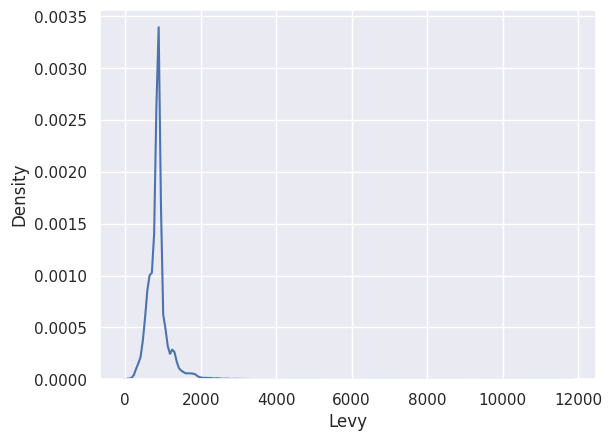

In [ ]:
#@title Levy до
sns.kdeplot(cars_tr["Levy"])

In [ ]:
cars_tr["Levy"].max()

11714.0

In [ ]:
cars_tr[cars_tr["Levy"]>2200]['Levy'].count()

127

<Axes: xlabel='Levy'>

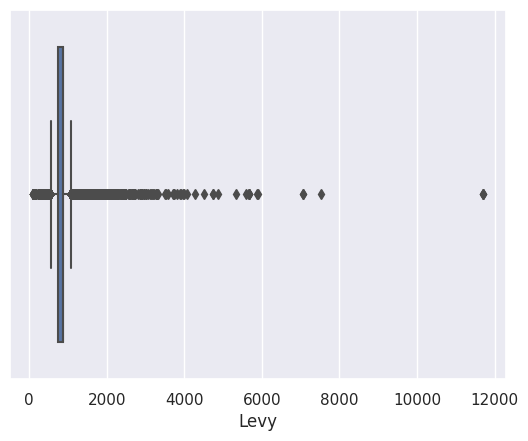

In [ ]:
sns.boxplot(data=cars_tr, x='Levy')

<Axes: xlabel='Levy', ylabel='Density'>

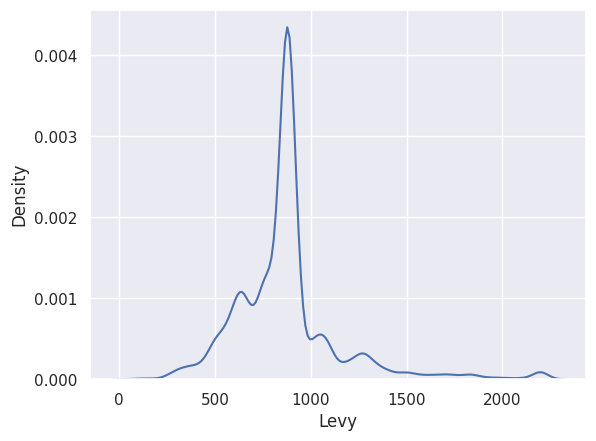

In [ ]:
#@title Levy после ограничения сверху
cars_tr["Levy"] = np.where(cars_tr["Levy"] > 2200 , 2200 , cars_tr["Levy"])
sns.kdeplot(cars_tr["Levy"])

In [ ]:
cars_tr["Levy"].max()

2200.0

<Axes: xlabel='Levy'>

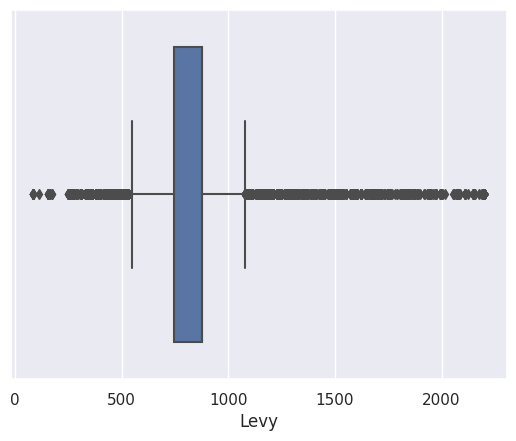

In [ ]:
sns.boxplot(data=cars_tr, x='Levy')

## Total Price

In [ ]:
cars_tr['Total_Price'] = cars_tr['Price'] + cars_tr['Levy']

In [ ]:
cars_tr = cars_tr[['Total_Price'] + [x for x in cars_tr.columns if x != 'Total_Price']]


In [ ]:
cars_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15725 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total_Price    15725 non-null  float64
 1   Price          15725 non-null  int64  
 2   Levy           15725 non-null  float64
 3   Manufacturer   15725 non-null  object 
 4   Model          15725 non-null  object 
 5   Prod_year      15725 non-null  int64  
 6   Category       15725 non-null  object 
 7   Leather_inter  15725 non-null  object 
 8   Type           15725 non-null  object 
 9   EngV           15725 non-null  object 
 10  Mileage        15725 non-null  object 
 11  Cylinders      15725 non-null  float64
 12  Gearbox        15725 non-null  object 
 13  Drive          15725 non-null  object 
 14  Doors          15725 non-null  object 
 15  Steering       15725 non-null  object 
 16  Color          15725 non-null  object 
 17  Airbags        15725 non-null  int64  
dtypes: flo

<Axes: xlabel='Price', ylabel='Density'>

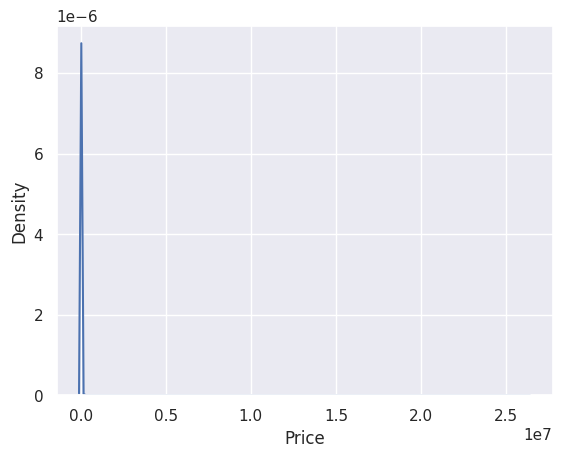

In [ ]:
sns.kdeplot(cars_tr["Price"])

<Axes: xlabel='Price'>

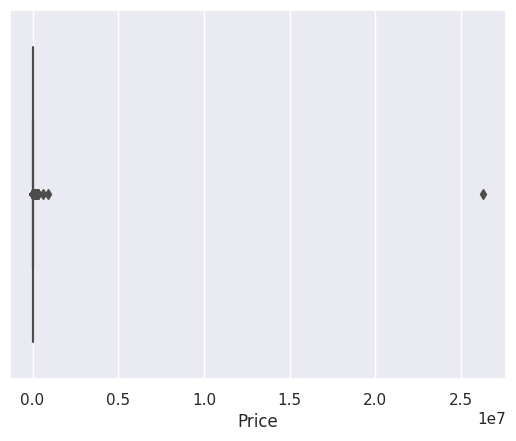

In [ ]:
sns.boxplot(data=cars_tr, x='Price')

<Axes: xlabel='Total_Price', ylabel='Density'>

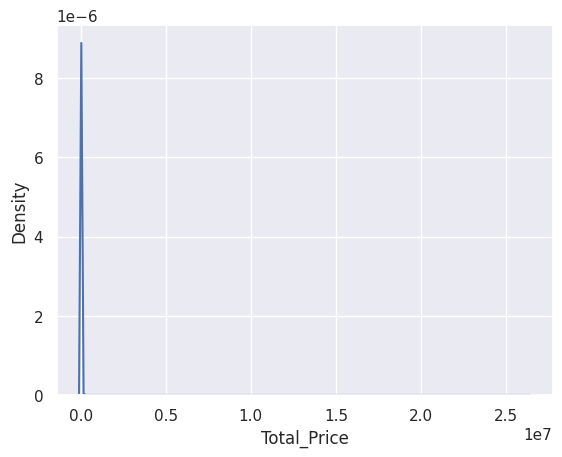

In [ ]:
sns.kdeplot(cars_tr["Total_Price"])

<Axes: xlabel='Total_Price'>

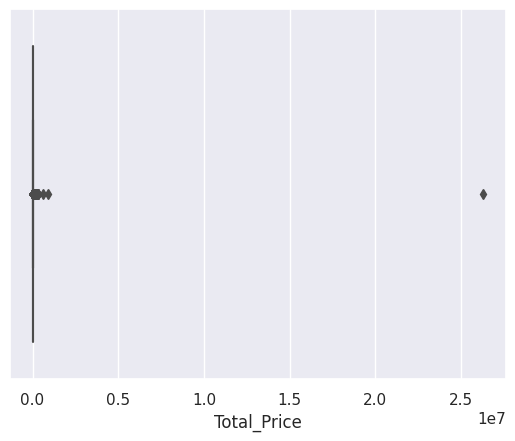

In [ ]:
sns.boxplot(data=cars_tr, x='Total_Price')

In [ ]:
cars_tr[cars_tr['Price']>200000]['Price'].count()

13

In [ ]:
cars_tr[cars_tr['Price']>80000]['Price'].count()

216

<Axes: xlabel='Price'>

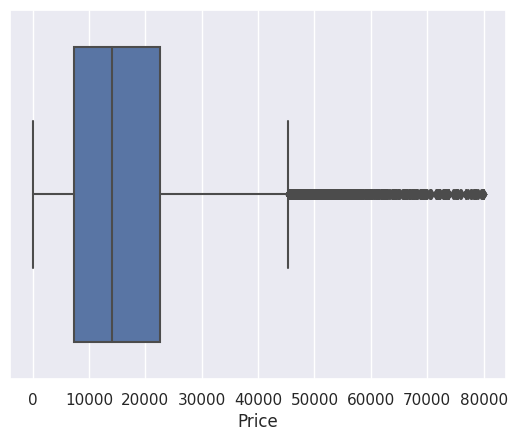

In [ ]:
sns.boxplot(data=cars_tr[cars_tr['Price']<80000], x='Price')

In [ ]:
cars_tr[cars_tr['Price']>50000]['Price'].count()

824

<Axes: xlabel='Price'>

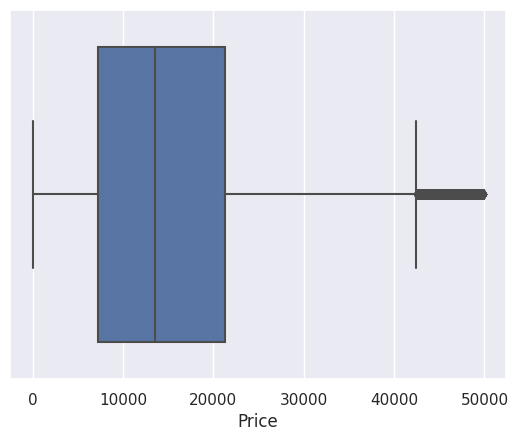

In [ ]:
sns.boxplot(data=cars_tr[cars_tr['Price']<50000], x='Price')

## Замена дверей

In [ ]:
cars_tr['Doors'] = cars_tr['Doors'].map({'04-May':4, '02-Mar':2, '>5':5})

<Axes: xlabel='Doors', ylabel='Density'>

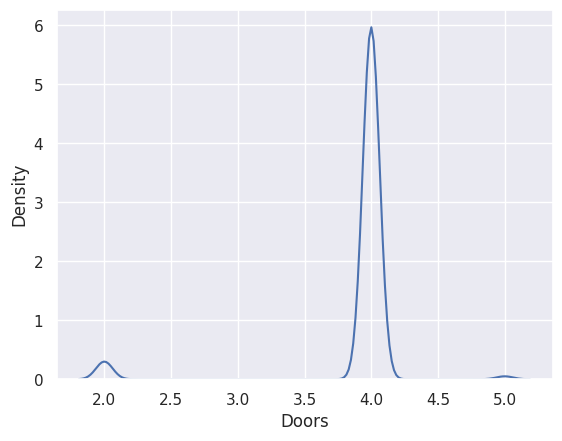

In [ ]:
sns.kdeplot(cars_tr["Doors"])

<Axes: xlabel='Doors', ylabel='Count'>

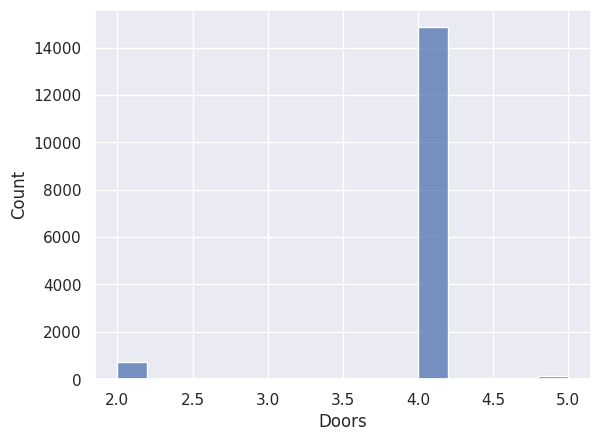

In [ ]:
sns.histplot(data=cars_tr, x='Doors')

<Axes: xlabel='Doors'>

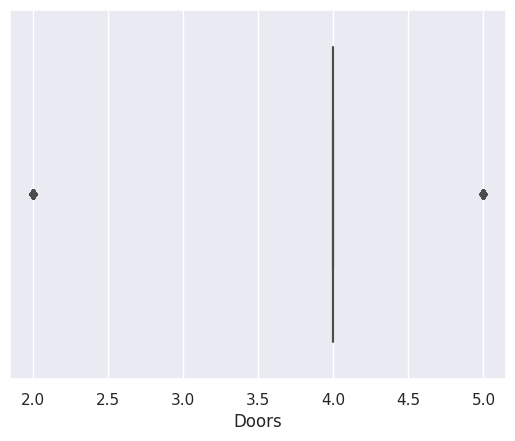

In [ ]:
sns.boxplot(data=cars_tr, x='Doors')

In [ ]:
cars_tr[cars_tr['Doors'] == 2]['Doors'].count()

746

In [ ]:
cars_tr[cars_tr['Doors'] == 4]['Doors'].count()

14855

In [ ]:
cars_tr[cars_tr['Doors'] == 5]['Doors'].count()

124

## Преобразование пробега в числовой

In [ ]:
cars_tr['Mileage'] = cars_tr['Mileage'].str.strip('km')
cars_tr['Mileage'] = cars_tr['Mileage'].astype('int64')

In [ ]:
cars_tr.head()

Total_Price  Price         Levy Manufacturer    Model  Prod_year  \
0  14727.000000  13328  1399.000000        LEXUS   RX 450       2010   
1  17639.000000  16621  1018.000000    CHEVROLET  Equinox       2011   
2   9346.440195   8467   879.440195        HONDA      FIT       2006   
3   4469.000000   3607   862.000000         FORD   Escape       2011   
4  12172.000000  11726   446.000000        HONDA      FIT       2014   

    Category Leather_inter    Type EngV  Mileage  Cylinders    Gearbox  Drive  \
0       Jeep           Yes  Hybrid  3.5   186005        6.0  Automatic    4x4   
1       Jeep            No  Petrol    3   192000        6.0  Tiptronic    4x4   
2  Hatchback            No  Petrol  1.3   200000        4.0   Variator  Front   
3       Jeep           Yes  Hybrid  2.5   168966        4.0  Automatic    4x4   
4  Hatchback           Yes  Petrol  1.3    91901        4.0  Automatic  Front   

   Doors          Steering   Color  Airbags  
0      4        Left wheel  Silver       12  
1      4        Left wheel   Black        8  
2      4  Right-hand drive   Black        2  
3      4        Left wheel   White        0  
4      4        Left wheel  Silver        4

## Замена салона

In [ ]:
cars_tr['Leather_inter'] = cars_tr['Leather_inter'].map({'Yes':True, 'No':False})

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



<Axes: xlabel='Leather_inter', ylabel='Count'>

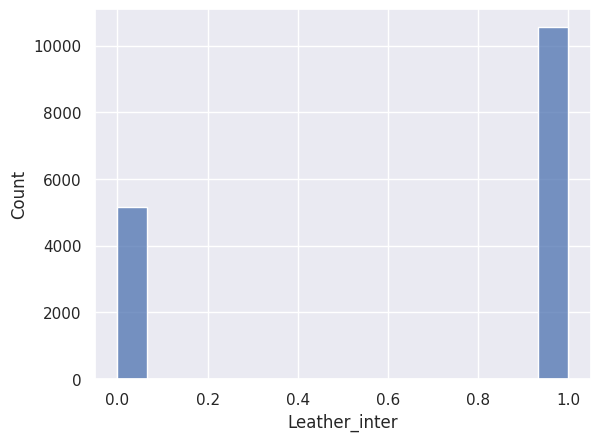

In [ ]:
sns.histplot(data=cars_tr, x="Leather_inter")

In [ ]:
display(cars_tr.dtypes);
len(cars_tr.dtypes)

Total_Price      float64
Price              int64
Levy             float64
Manufacturer      object
Model             object
Prod_year          int64
Category          object
Leather_inter       bool
Type              object
EngV              object
Mileage            int64
Cylinders        float64
Gearbox           object
Drive             object
Doors              int64
Steering          object
Color             object
Airbags            int64
dtype: object

18

## Отделение turbo двигателей

In [ ]:
# Заменяем написание значения на строчные буквы
cars_tr['EngV'] = cars_tr['EngV'].str.lower()


# Выбираем значения, которые содержат “turbo”
cars_tr['Turbo'] = cars_tr['EngV'].str.contains('turbo')


# Отбираем число в формате строки и превращаем его в число типа float
cars_tr['EngV'] = cars_tr['EngV'].str.slice(0,3)
cars_tr['EngV'] = cars_tr['EngV'].astype('float64')

In [ ]:
cars_tr.head(15)

Total_Price  Price         Levy   Manufacturer     Model  Prod_year  \
0   14727.000000  13328  1399.000000          LEXUS    RX 450       2010   
1   17639.000000  16621  1018.000000      CHEVROLET   Equinox       2011   
2    9346.440195   8467   879.440195          HONDA       FIT       2006   
3    4469.000000   3607   862.000000           FORD    Escape       2011   
4   12172.000000  11726   446.000000          HONDA       FIT       2014   
5   40384.000000  39493   891.000000        HYUNDAI  Santa FE       2016   
6    2564.000000   1803   761.000000         TOYOTA     Prius       2010   
7    1300.000000    549   751.000000        HYUNDAI    Sonata       2013   
8    1492.000000   1098   394.000000         TOYOTA     Camry       2014   
9   27536.440195  26657   879.440195          LEXUS    RX 350       2007   
10   1994.000000    941  1053.000000  MERCEDES-BENZ     E 350       2014   
11   9660.440195   8781   879.440195           FORD   Transit       1999   
12   3879.440195   3000   879.440195           OPEL    Vectra       1997   
13   2074.000000   1019  1055.000000          LEXUS    RX 450       2013   
14  60355.000000  59464   891.000000        HYUNDAI  Santa FE       2016   

       Category  Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  \
0          Jeep           True  Hybrid   3.5   186005        6.0  Automatic   
1          Jeep          False  Petrol   3.0   192000        6.0  Tiptronic   
2     Hatchback          False  Petrol   1.3   200000        4.0   Variator   
3          Jeep           True  Hybrid   2.5   168966        4.0  Automatic   
4     Hatchback           True  Petrol   1.3    91901        4.0  Automatic   
5          Jeep           True  Diesel   2.0   160931        4.0  Automatic   
6     Hatchback           True  Hybrid   1.8   258909        4.0  Automatic   
7         Sedan           True  Petrol   2.4   216118        4.0  Automatic   
8         Sedan           True  Hybrid   2.5   398069        4.0  Automatic   
9          Jeep           True  Petrol   3.5   128500        6.0  Automatic   
10        Sedan           True  Diesel   3.5   184467        6.0  Automatic   
11     Microbus          False     CNG   4.0        0        8.0     Manual   
12  Goods wagon          False     CNG   1.6   350000        4.0     Manual   
13         Jeep           True  Hybrid   3.5   138038        6.0  Automatic   
14         Jeep           True  Diesel   2.0    76000        4.0  Automatic   

    Drive  Doors          Steering   Color  Airbags  Turbo  
0     4x4      4        Left wheel  Silver       12  False  
1     4x4      4        Left wheel   Black        8  False  
2   Front      4  Right-hand drive   Black        2  False  
3     4x4      4        Left wheel   White        0  False  
4   Front      4        Left wheel  Silver        4  False  
5   Front      4        Left wheel   White        4  False  
6   Front      4        Left wheel   White       12  False  
7   Front      4        Left wheel    Grey       12  False  
8   Front      4        Left wheel   Black       12  False  
9     4x4      4        Left wheel  Silver       12  False  
10   Rear      4        Left wheel   White       12  False  
11   Rear      2        Left wheel    Blue        0  False  
12  Front      4        Left wheel   White        4  False  
13  Front      4        Left wheel   White       12  False  
14  Front      4        Left wheel   White        4  False

<Axes: ylabel='EngV'>

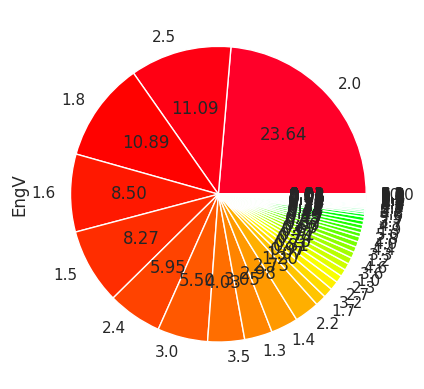

In [ ]:
#@title EngV до
cars_tr["EngV"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [ ]:
cars_tr['EngV'].isnull().sum()

0

In [ ]:
cars_tr['EngV'].min()

0.0

In [ ]:
cars_tr['EngV'].max()

20.0

In [ ]:
cars_tr['EngV'][cars_tr['EngV']>=6].count()

28

In [ ]:
cars_tr["EngV"] = np.where(cars_tr["EngV"] <= 2.0 , 2.0 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 2.5) & (cars_tr["EngV"] < 3.0), 2.5 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 3.0) & (cars_tr["EngV"] < 3.5), 3.0 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 3.5) & (cars_tr["EngV"] < 4.0), 3.5 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 4.0) & (cars_tr["EngV"] < 4.5), 4.0 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 4.5) & (cars_tr["EngV"] < 5.0), 4.5 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 5.0) & (cars_tr["EngV"] < 5.5), 5.0 , cars_tr["EngV"])
cars_tr["EngV"] = np.where((cars_tr["EngV"] >= 5.5) & (cars_tr["EngV"] < 6.0), 5.5 , cars_tr["EngV"])
cars_tr["EngV"] = np.where(cars_tr["EngV"] >= 6.0 , 6.0 , cars_tr["EngV"])

<Axes: ylabel='EngV'>

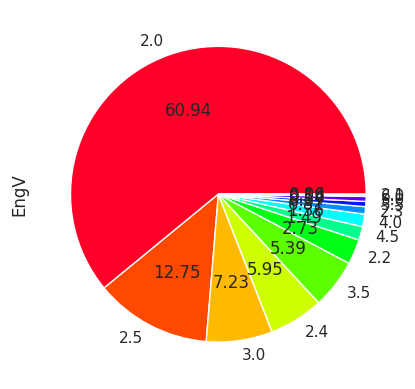

In [ ]:
#@title EngV после
cars_tr["EngV"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [ ]:
cars_tr['EngV'] = cars_tr['EngV'].astype('float64')

In [ ]:
cars_tr.head(15)

Total_Price  Price         Levy   Manufacturer     Model  Prod_year  \
0   14727.000000  13328  1399.000000          LEXUS    RX 450       2010   
1   17639.000000  16621  1018.000000      CHEVROLET   Equinox       2011   
2    9346.440195   8467   879.440195          HONDA       FIT       2006   
3    4469.000000   3607   862.000000           FORD    Escape       2011   
4   12172.000000  11726   446.000000          HONDA       FIT       2014   
5   40384.000000  39493   891.000000        HYUNDAI  Santa FE       2016   
6    2564.000000   1803   761.000000         TOYOTA     Prius       2010   
7    1300.000000    549   751.000000        HYUNDAI    Sonata       2013   
8    1492.000000   1098   394.000000         TOYOTA     Camry       2014   
9   27536.440195  26657   879.440195          LEXUS    RX 350       2007   
10   1994.000000    941  1053.000000  MERCEDES-BENZ     E 350       2014   
11   9660.440195   8781   879.440195           FORD   Transit       1999   
12   3879.440195   3000   879.440195           OPEL    Vectra       1997   
13   2074.000000   1019  1055.000000          LEXUS    RX 450       2013   
14  60355.000000  59464   891.000000        HYUNDAI  Santa FE       2016   

       Category  Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  \
0          Jeep           True  Hybrid   3.5   186005        6.0  Automatic   
1          Jeep          False  Petrol   3.0   192000        6.0  Tiptronic   
2     Hatchback          False  Petrol   2.0   200000        4.0   Variator   
3          Jeep           True  Hybrid   2.5   168966        4.0  Automatic   
4     Hatchback           True  Petrol   2.0    91901        4.0  Automatic   
5          Jeep           True  Diesel   2.0   160931        4.0  Automatic   
6     Hatchback           True  Hybrid   2.0   258909        4.0  Automatic   
7         Sedan           True  Petrol   2.4   216118        4.0  Automatic   
8         Sedan           True  Hybrid   2.5   398069        4.0  Automatic   
9          Jeep           True  Petrol   3.5   128500        6.0  Automatic   
10        Sedan           True  Diesel   3.5   184467        6.0  Automatic   
11     Microbus          False     CNG   4.0        0        8.0     Manual   
12  Goods wagon          False     CNG   2.0   350000        4.0     Manual   
13         Jeep           True  Hybrid   3.5   138038        6.0  Automatic   
14         Jeep           True  Diesel   2.0    76000        4.0  Automatic   

    Drive  Doors          Steering   Color  Airbags  Turbo  
0     4x4      4        Left wheel  Silver       12  False  
1     4x4      4        Left wheel   Black        8  False  
2   Front      4  Right-hand drive   Black        2  False  
3     4x4      4        Left wheel   White        0  False  
4   Front      4        Left wheel  Silver        4  False  
5   Front      4        Left wheel   White        4  False  
6   Front      4        Left wheel   White       12  False  
7   Front      4        Left wheel    Grey       12  False  
8   Front      4        Left wheel   Black       12  False  
9     4x4      4        Left wheel  Silver       12  False  
10   Rear      4        Left wheel   White       12  False  
11   Rear      2        Left wheel    Blue        0  False  
12  Front      4        Left wheel   White        4  False  
13  Front      4        Left wheel   White       12  False  
14  Front      4        Left wheel   White        4  False

In [ ]:
cars_tr['EngV'].isnull().sum()

0

<Axes: xlabel='EngV', ylabel='Density'>

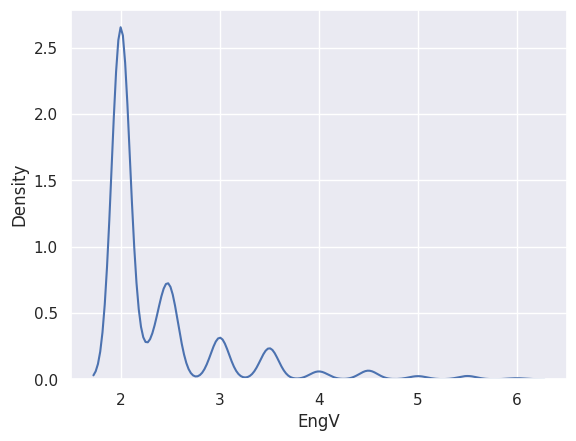

In [ ]:
sns.kdeplot(cars_tr["EngV"])

<Axes: xlabel='EngV'>

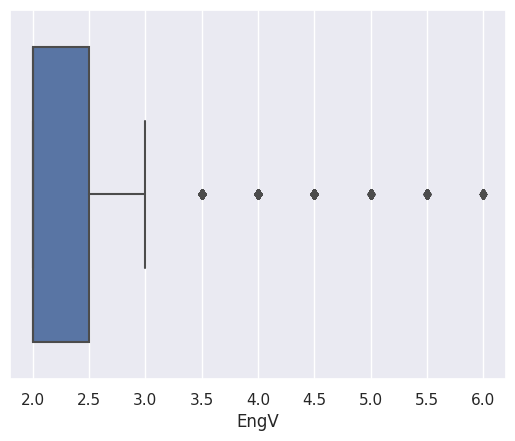

In [ ]:
sns.boxplot(data=cars_tr, x='EngV')

In [ ]:
cars_tr.groupby(by='EngV').count()

Total_Price  Price  Levy  Manufacturer  Model  Prod_year  Category  \
EngV                                                                       
2.0          9583   9583  9583          9583   9583       9583      9583   
2.1            10     10    10            10     10         10        10   
2.2           429    429   429           429    429        429       429   
2.3           127    127   127           127    127        127       127   
2.4           935    935   935           935    935        935       935   
2.5          2005   2005  2005          2005   2005       2005      2005   
3.0          1137   1137  1137          1137   1137       1137      1137   
3.5           848    848   848           848    848        848       848   
4.0           214    214   214           214    214        214       214   
4.5           235    235   235           235    235        235       235   
5.0            85     85    85            85     85         85        85   
5.5            89     89    89            89     89         89        89   
6.0            28     28    28            28     28         28        28   

      Leather_inter  Type  Mileage  Cylinders  Gearbox  Drive  Doors  \
EngV                                                                   
2.0            9583  9583     9583       9583     9583   9583   9583   
2.1              10    10       10         10       10     10     10   
2.2             429   429      429        429      429    429    429   
2.3             127   127      127        127      127    127    127   
2.4             935   935      935        935      935    935    935   
2.5            2005  2005     2005       2005     2005   2005   2005   
3.0            1137  1137     1137       1137     1137   1137   1137   
3.5             848   848      848        848      848    848    848   
4.0             214   214      214        214      214    214    214   
4.5             235   235      235        235      235    235    235   
5.0              85    85       85         85       85     85     85   
5.5              89    89       89         89       89     89     89   
6.0              28    28       28         28       28     28     28   

      Steering  Color  Airbags  Turbo  
EngV                                   
2.0       9583   9583     9583   9583  
2.1         10     10       10     10  
2.2        429    429      429    429  
2.3        127    127      127    127  
2.4        935    935      935    935  
2.5       2005   2005     2005   2005  
3.0       1137   1137     1137   1137  
3.5        848    848      848    848  
4.0        214    214      214    214  
4.5        235    235      235    235  
5.0         85     85       85     85  
5.5         89     89       89     89  
6.0         28     28       28     28

## Преобразование Cilinders

In [ ]:
cars_tr['Cylinders'] = cars_tr['Cylinders'].astype('int64')
cars_tr['Cylinders'] = cars_tr['Cylinders'].astype('int64')

In [ ]:
display(cars_tr.dtypes);
len(cars_tr.dtypes)

Total_Price      float64
Price              int64
Levy             float64
Manufacturer      object
Model             object
Prod_year          int64
Category          object
Leather_inter       bool
Type              object
EngV             float64
Mileage            int64
Cylinders          int64
Gearbox           object
Drive             object
Doors              int64
Steering          object
Color             object
Airbags            int64
Turbo               bool
dtype: object

19

In [ ]:
cars_tr.Cylinders.unique()

array([ 6,  4,  8,  1, 12,  3,  2, 16,  5,  7,  9, 10, 14])

In [ ]:
cars_tr.groupby(by='Cylinders')['Cylinders'].count()

Cylinders
1        37
2        42
3       107
4     12279
5       165
6      2429
7         4
8       605
9         1
10       12
12       38
14        1
16        5
Name: Cylinders, dtype: int64

<Axes: xlabel='Cylinders', ylabel='Count'>

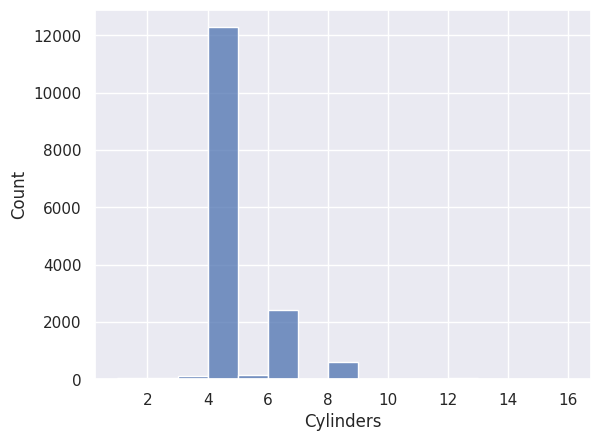

In [ ]:
sns.histplot(data=cars_tr, x="Cylinders")

<Axes: xlabel='Cylinders'>

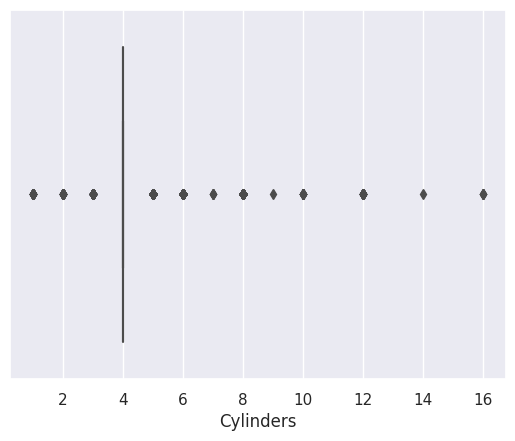

In [ ]:
sns.boxplot(data=cars_tr, x="Cylinders")

In [ ]:
cars_tr["Cylinders"] = np.where(cars_tr["Cylinders"] <= 3 , 3 , cars_tr["Cylinders"])
cars_tr["Cylinders"] = np.where((cars_tr["Cylinders"] >= 4) & (cars_tr["Cylinders"] < 6), 5 , cars_tr["Cylinders"])
cars_tr["Cylinders"] = np.where(cars_tr["Cylinders"] >= 6, 10 , cars_tr["Cylinders"])

In [ ]:
cars_tr.groupby(by='Cylinders')['Cylinders'].count()

Cylinders
3       186
5     12444
10     3095
Name: Cylinders, dtype: int64

<Axes: xlabel='Cylinders', ylabel='Count'>

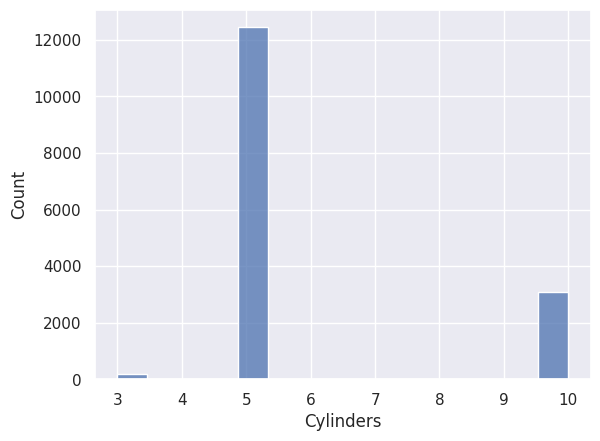

In [ ]:
sns.histplot(data=cars_tr, x="Cylinders")

<Axes: xlabel='Cylinders'>

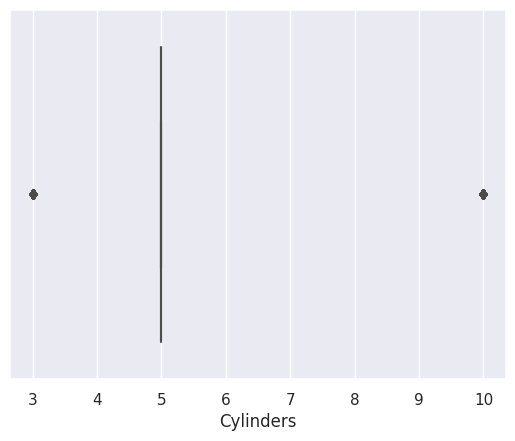

In [ ]:
sns.boxplot(data=cars_tr, x="Cylinders")

In [ ]:
cars_tr[cars_tr['Type'] == 'Hydrogen']

Total_Price  Price        Levy Manufacturer          Model  Prod_year  \
12900  21264.440195  20385  879.440195      HYUNDAI  Sonata Hybrid       2012   

      Category  Leather_inter      Type  EngV  Mileage  Cylinders    Gearbox  \
12900    Sedan           True  Hydrogen   2.4   116800         10  Tiptronic   

       Drive  Doors    Steering Color  Airbags  Turbo  
12900  Front      4  Left wheel  Grey        8  False

In [ ]:
##@title Удаление гидрогенного
display(cars_tr.Type.unique())

cars_tr = cars_tr[cars_tr['Type'] != 'Hydrogen']

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [ ]:
cars_tr.groupby(by='Type')['Cylinders'].count()

Type
CNG                468
Diesel            3209
Hybrid            2424
LPG                714
Petrol            8824
Plug-in Hybrid      85
Name: Cylinders, dtype: int64

In [ ]:
cars_tr[cars_tr['Type'] == 'Hydrogen']

Empty DataFrame
Columns: [Total_Price, Price, Levy, Manufacturer, Model, Prod_year, Category, Leather_inter, Type, EngV, Mileage, Cylinders, Gearbox, Drive, Doors, Steering, Color, Airbags, Turbo]
Index: []

<Axes: xlabel='Steering', ylabel='Count'>

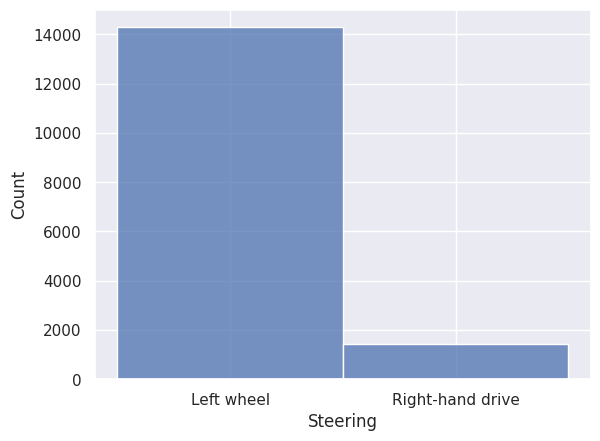

In [ ]:
sns.histplot(data=cars_tr, x="Steering")

## Преобразование типа руля

In [ ]:
Steering_le = LabelEncoder()
cars_tr['Steering'] = Steering_le.fit_transform(cars_tr['Steering'])

cars_tr.head()

Total_Price  Price         Levy Manufacturer    Model  Prod_year  \
0  14727.000000  13328  1399.000000        LEXUS   RX 450       2010   
1  17639.000000  16621  1018.000000    CHEVROLET  Equinox       2011   
2   9346.440195   8467   879.440195        HONDA      FIT       2006   
3   4469.000000   3607   862.000000         FORD   Escape       2011   
4  12172.000000  11726   446.000000        HONDA      FIT       2014   

    Category  Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  \
0       Jeep           True  Hybrid   3.5   186005         10  Automatic   
1       Jeep          False  Petrol   3.0   192000         10  Tiptronic   
2  Hatchback          False  Petrol   2.0   200000          5   Variator   
3       Jeep           True  Hybrid   2.5   168966          5  Automatic   
4  Hatchback           True  Petrol   2.0    91901          5  Automatic   

   Drive  Doors  Steering   Color  Airbags  Turbo  
0    4x4      4         0  Silver       12  False  
1    4x4      4         0   Black        8  False  
2  Front      4         1   Black        2  False  
3    4x4      4         0   White        0  False  
4  Front      4         0  Silver        4  False

In [ ]:
cars_cleaned = copy.copy(cars_tr)

## Выбор ограничения для пробега

<Axes: xlabel='Mileage', ylabel='Density'>

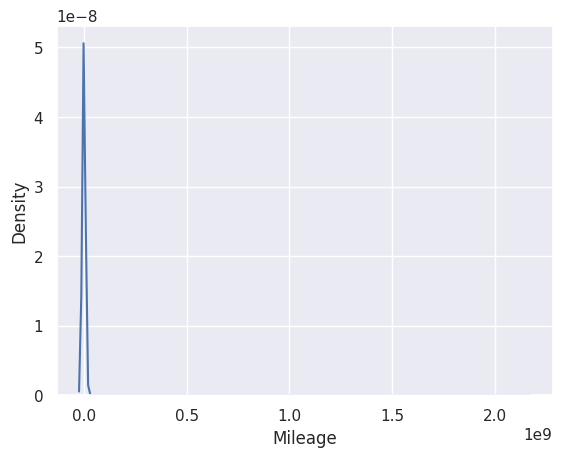

In [ ]:
sns.kdeplot(cars_tr["Mileage"])

<Axes: xlabel='Mileage'>

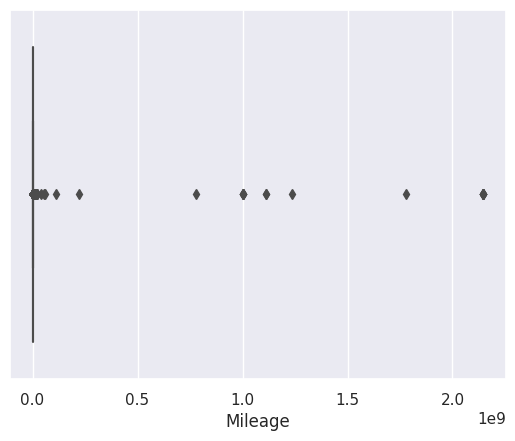

In [ ]:
sns.boxplot(data=cars_tr, x='Mileage')

<Axes: xlabel='Mileage', ylabel='Density'>

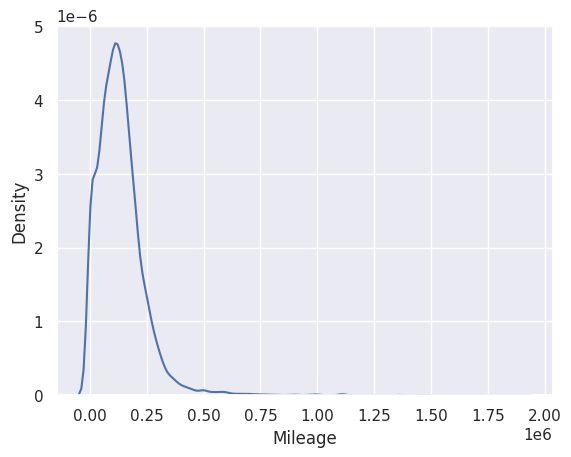

In [ ]:
sns.kdeplot(cars_tr["Mileage"][cars_tr["Mileage"]<2000000])

<Axes: xlabel='Mileage'>

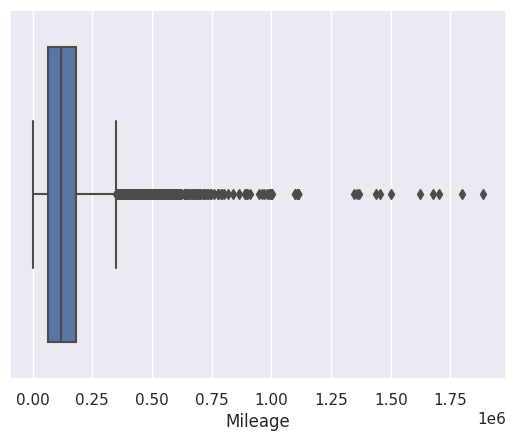

In [ ]:
sns.boxplot(data=cars_tr[cars_tr["Mileage"]<2000000], x='Mileage')

<Axes: xlabel='Mileage', ylabel='Density'>

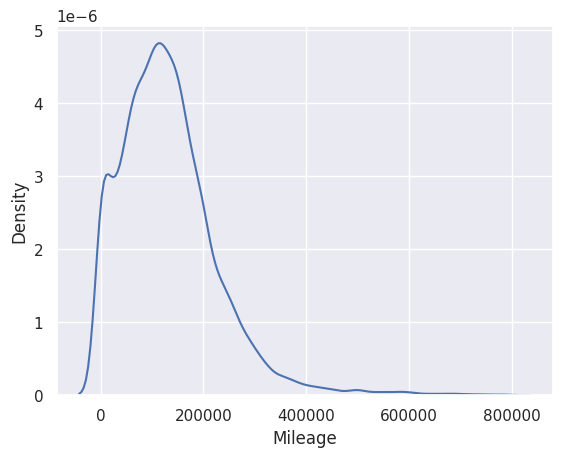

In [ ]:
sns.kdeplot(cars_tr["Mileage"][cars_tr["Mileage"]<800000])

<Axes: xlabel='Mileage'>

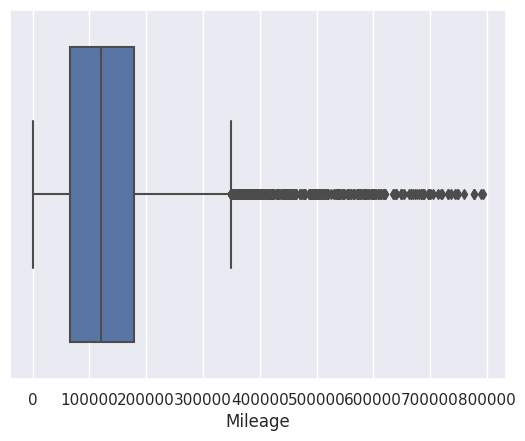

In [ ]:
sns.boxplot(data=cars_tr[cars_tr["Mileage"]<800000], x='Mileage')

<Axes: xlabel='Mileage', ylabel='Density'>

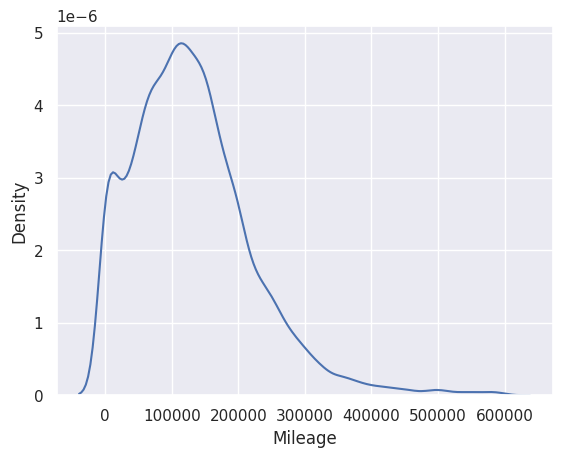

In [ ]:
sns.kdeplot(cars_tr["Mileage"][cars_tr["Mileage"]<600000])

<Axes: xlabel='Mileage'>

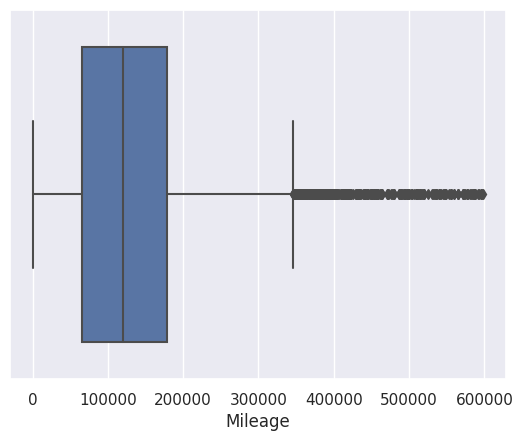

In [ ]:
sns.boxplot(data=cars_tr[cars_tr["Mileage"]<600000], x='Mileage')

<Axes: xlabel='Mileage', ylabel='Density'>

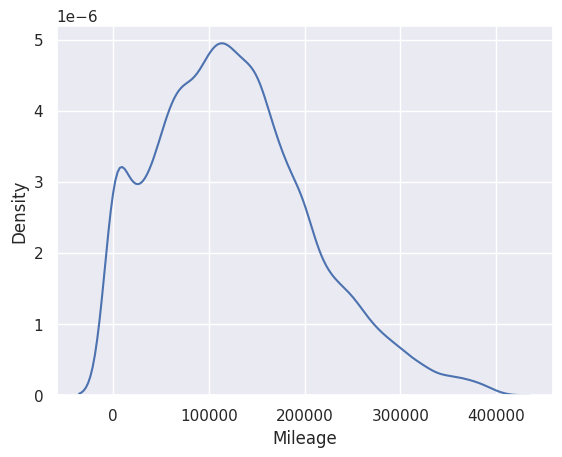

In [ ]:
sns.kdeplot(cars_tr["Mileage"][cars_tr["Mileage"]<400000])

<Axes: xlabel='Mileage'>

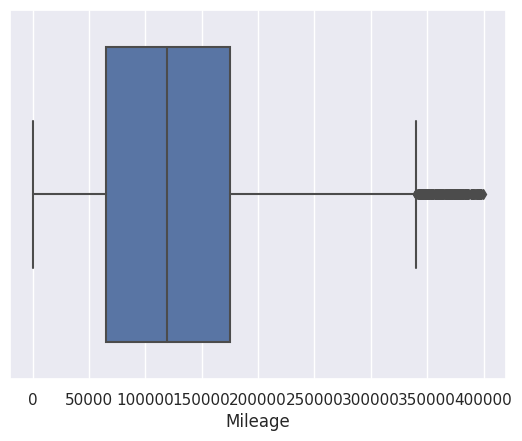

In [ ]:
sns.boxplot(data=cars_tr[cars_tr["Mileage"]<400000], x='Mileage')

<Axes: xlabel='Mileage', ylabel='Density'>

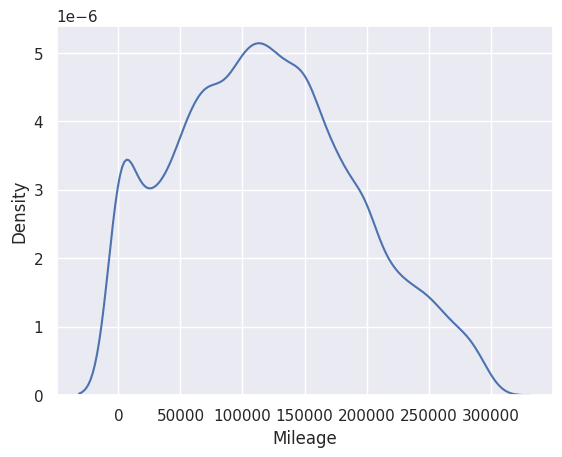

In [ ]:
sns.kdeplot(cars_tr["Mileage"][cars_tr["Mileage"]<300000])

<Axes: xlabel='Mileage'>

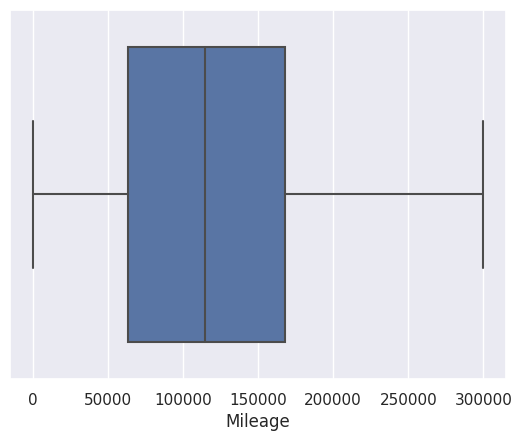

In [ ]:
sns.boxplot(data=cars_tr[cars_tr["Mileage"]<300000], x='Mileage')

In [ ]:
cars_tr[cars_tr["Mileage"]>300000]["Mileage"].count()

802

<Axes: xlabel='Mileage', ylabel='Density'>

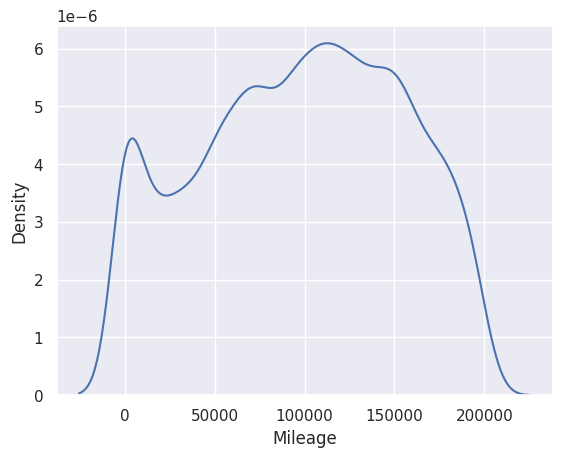

In [ ]:
sns.kdeplot(cars_tr["Mileage"][cars_tr["Mileage"]<200000])

<Axes: xlabel='Mileage'>

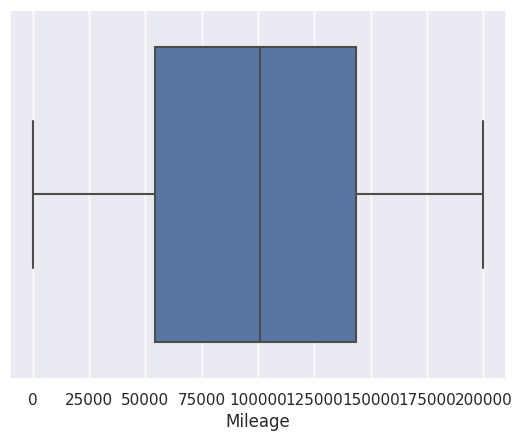

In [ ]:
sns.boxplot(data=cars_tr[cars_tr["Mileage"]<200000], x='Mileage')

In [ ]:
cars_tr = cars_tr[cars_tr['Mileage'] < 300000]

## Manufactor

<Axes: ylabel='Manufacturer'>

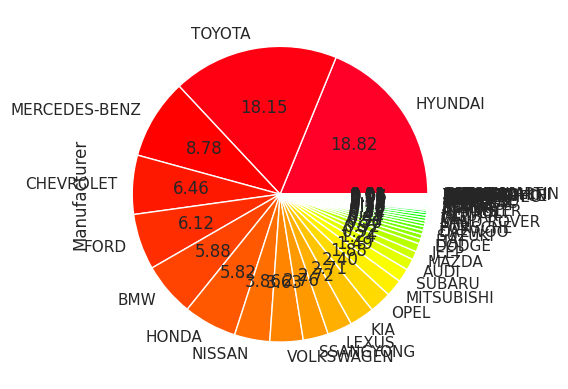

In [ ]:
#@title Manufactor до
cars_tr["Manufacturer"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

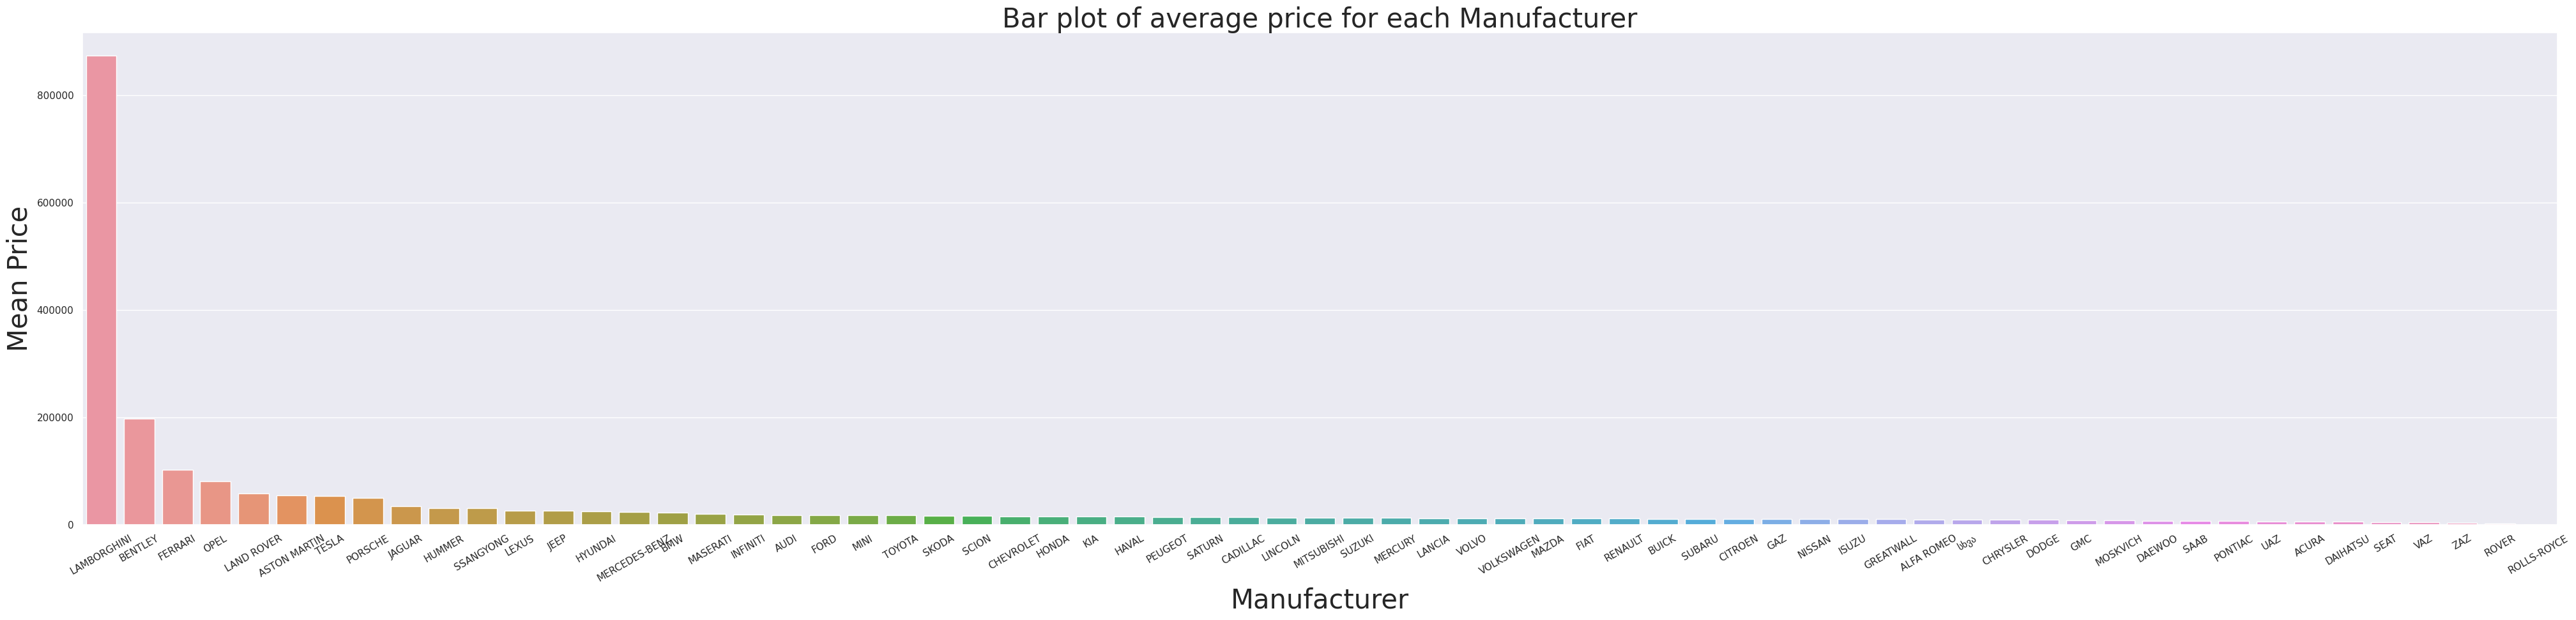

In [ ]:
df1 = cars_tr[['Price', 'Manufacturer']].groupby(by= ['Manufacturer'], as_index=False).agg('mean').sort_values(by='Price', ascending=False)
plt.figure(figsize=(50,10))
plot = sns.barplot(x="Manufacturer", y="Price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.title('Bar plot of average price for each Manufacturer', fontsize=30)
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Mean Price', fontsize=30)
plt.show()

In [ ]:
inf = cars_tr["Manufacturer"].value_counts().index[15:]
cars_tr["Manufacturer"] = np.where(cars_tr["Manufacturer"].isin(inf) , "other" , cars_tr["Manufacturer"])

<Axes: ylabel='Manufacturer'>

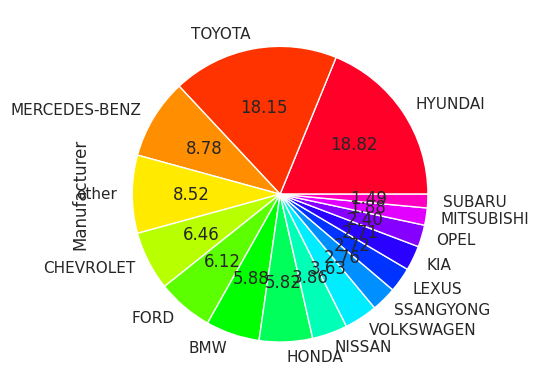

In [ ]:
#@title Manufactor после
cars_tr["Manufacturer"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

## Model

<Axes: ylabel='Model'>

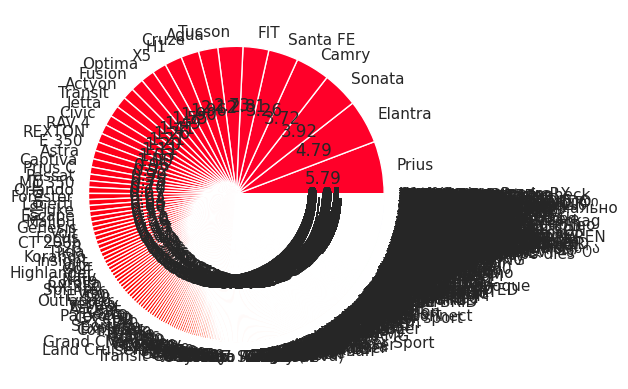

In [ ]:
#@title Model до
cars_tr["Model"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [ ]:
inf = cars_tr["Model"].value_counts().index[24:]
cars_tr["Model"] = np.where(cars_tr["Model"].isin(inf) , "other" , cars_tr["Model"])

<Axes: ylabel='Model'>

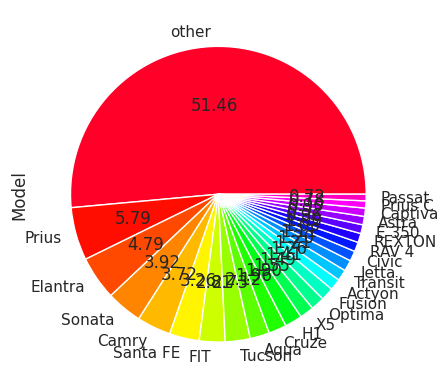

In [ ]:
#@title Model после
cars_tr["Model"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

## Prod_year

<Axes: ylabel='Prod_year'>

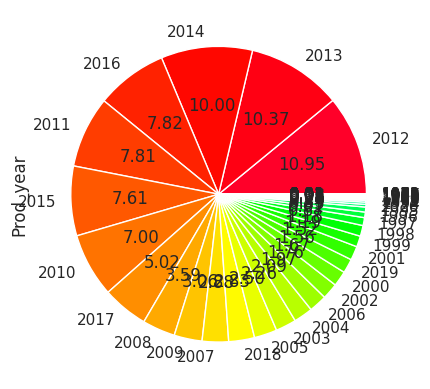

In [ ]:
#@title Prod_year до
cars_tr["Prod_year"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: xlabel='Prod_year', ylabel='Density'>

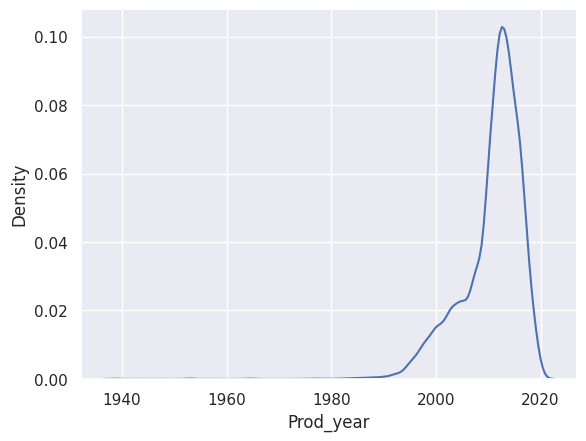

In [ ]:
sns.kdeplot(cars_tr["Prod_year"])

In [ ]:
cars_tr["Prod_year"] = np.where(cars_tr["Prod_year"] < 2000 , 2000 , cars_tr["Prod_year"])

<Axes: ylabel='Prod_year'>

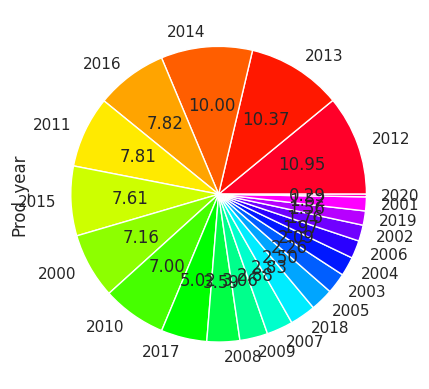

In [ ]:
#@title Prod_year после
cars_tr["Prod_year"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: xlabel='Prod_year', ylabel='Density'>

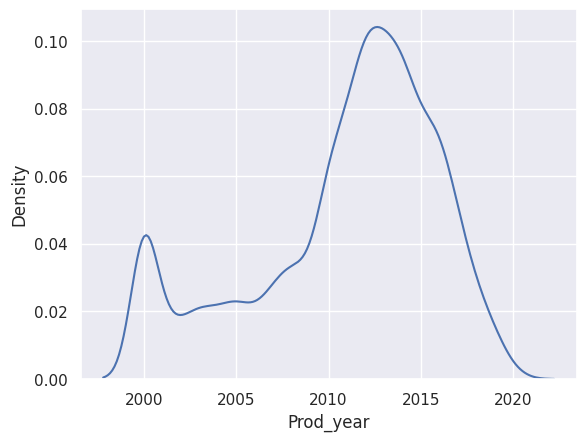

In [ ]:
sns.kdeplot(cars_tr["Prod_year"])

In [ ]:
cars_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14855 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total_Price    14855 non-null  float64
 1   Price          14855 non-null  int64  
 2   Levy           14855 non-null  float64
 3   Manufacturer   14855 non-null  object 
 4   Model          14855 non-null  object 
 5   Prod_year      14855 non-null  int64  
 6   Category       14855 non-null  object 
 7   Leather_inter  14855 non-null  bool   
 8   Type           14855 non-null  object 
 9   EngV           14855 non-null  float64
 10  Mileage        14855 non-null  int64  
 11  Cylinders      14855 non-null  int64  
 12  Gearbox        14855 non-null  object 
 13  Drive          14855 non-null  object 
 14  Doors          14855 non-null  int64  
 15  Steering       14855 non-null  int64  
 16  Color          14855 non-null  object 
 17  Airbags        14855 non-null  int64  
 18  Turbo 

## Ограничение по признаку Price

In [ ]:
cars_tr[cars_tr['Price']>200000]['Price'].count()

13

In [ ]:
cars_tr[cars_tr['Price']>80000]['Price'].count()

215

<Axes: xlabel='Price'>

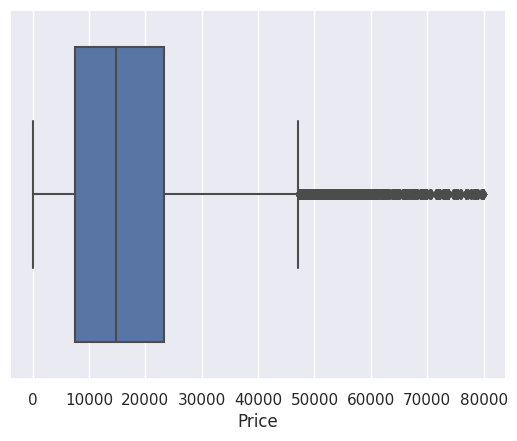

In [ ]:
sns.boxplot(data=cars_tr[cars_tr['Price']<80000], x='Price')

In [ ]:
cars_tr[cars_tr['Price']>50000]['Price'].count()

817

<Axes: xlabel='Price'>

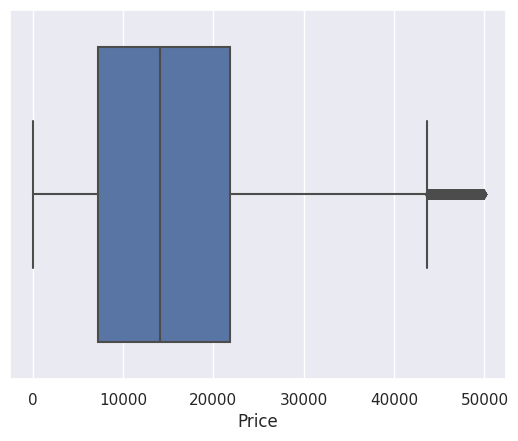

In [ ]:
sns.boxplot(data=cars_tr[cars_tr['Price']<50000], x='Price')

<Axes: xlabel='Price', ylabel='Density'>

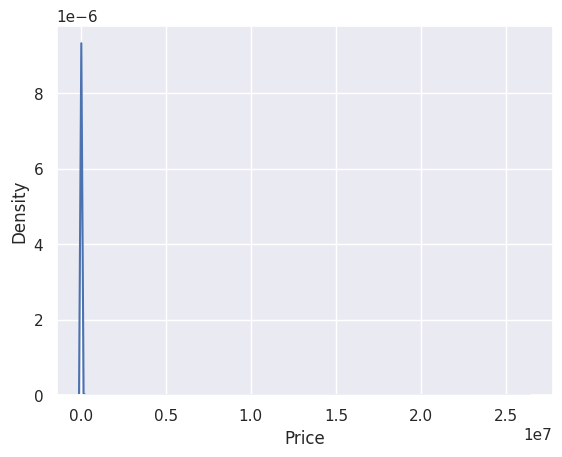

In [ ]:
sns.kdeplot(cars_tr["Price"])

<Axes: xlabel='Price'>

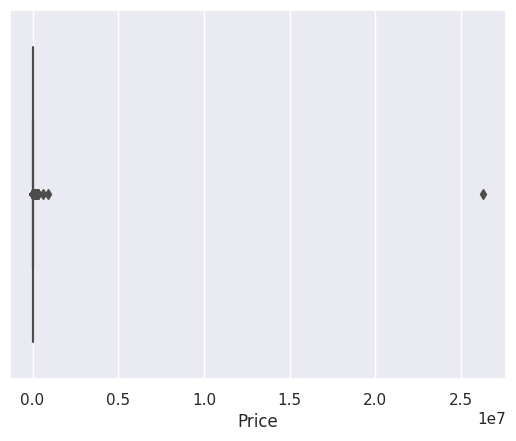

In [ ]:
sns.boxplot(data=cars_tr, x='Price')

### 50-1 000 000

In [ ]:
cars_tr = cars_tr[cars_tr['Price'] > 50]
cars_tr = cars_tr[cars_tr['Price'] < 1000000]


In [ ]:
cars_tr.sort_values(by='Price', ascending=False).head(15)

Total_Price   Price         Levy   Manufacturer  Model  Prod_year  \
8541   875013.000000  872946  2067.000000          other  other       2019   
1225   628099.440195  627220   879.440195  MERCEDES-BENZ  other       2020   
5008   310600.000000  308906  1694.000000          other  other       2016   
9367   298809.440195  297930   879.440195  MERCEDES-BENZ  other       2015   
14839  298809.440195  297930   879.440195          other  other       2019   
7749   290721.000000  288521  2200.000000            BMW  other       2018   
10759  261175.440195  260296   879.440195          LEXUS  other       2018   
5840   255316.000000  254024  1292.000000  MERCEDES-BENZ  other       2016   
15283  252055.000000  250574  1481.000000  MERCEDES-BENZ  other       2017   
7283   229814.440195  228935   879.440195  MERCEDES-BENZ  other       2018   
2283   220406.440195  219527   879.440195          other  other       2012   
7353   217270.440195  216391   879.440195  MERCEDES-BENZ  other       2013   
1145   195317.440195  194438   879.440195  MERCEDES-BENZ  other       2013   
13328  194063.440195  193184   879.440195  MERCEDES-BENZ  other       2018   
4722   177822.000000  175622  2200.000000          other  other       2016   

        Category  Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  \
8541   Universal           True  Petrol   4.0     2531         10  Tiptronic   
1225        Jeep           True  Petrol   6.0        0         10  Tiptronic   
5008       Coupe           True  Petrol   4.0     8690         10  Automatic   
9367       Coupe           True  Petrol   4.0    20000         10  Tiptronic   
14839       Jeep           True  Diesel   3.0     4500         10  Tiptronic   
7749       Sedan           True  Petrol   4.0    13500         10  Tiptronic   
10759       Jeep           True  Petrol   5.5    17700         10  Tiptronic   
5840        Jeep           True  Petrol   3.0    73000         10  Tiptronic   
15283       Jeep           True  Petrol   3.0    81600         10  Tiptronic   
7283        Jeep           True  Petrol   5.5    23000         10  Tiptronic   
2283       Coupe           True  Petrol   4.0    55500         10  Tiptronic   
7353        Jeep           True  Petrol   5.5    54000         10  Tiptronic   
1145        Jeep           True  Diesel   3.0    94000         10  Automatic   
13328       Jeep           True  Petrol   3.0    20000         10  Automatic   
4722       Sedan           True  Petrol   6.0     6189         10  Automatic   

      Drive  Doors  Steering   Color  Airbags  Turbo  
8541    4x4      4         0   Black        0  False  
1225    4x4      4         0   Black       12   True  
5008   Rear      2         0   Black       12  False  
9367   Rear      2         0   White       16   True  
14839   4x4      4         0   Black       12   True  
7749    4x4      4         0   Black        0  False  
10759   4x4      4         0   Black       10   True  
5840    4x4      4         0   Black       12   True  
15283   4x4      4         0   Black       12   True  
7283    4x4      4         0   Black       16   True  
2283    4x4      2         0   Black        0   True  
7353    4x4      4         0   Black       12   True  
1145    4x4      4         0   Black        6   True  
13328   4x4      4         0  Silver       12   True  
4722   Rear      4         0   Black       12  False

In [ ]:
cars_tr.sort_values(by='Price', ascending=True).head(15)


Total_Price  Price         Levy   Manufacturer  Model  Prod_year  \
7071    934.440195     55   879.440195         TOYOTA  other       2013   
952     939.440195     60   879.440195     MITSUBISHI  other       2001   
8995    939.440195     60   879.440195          other  other       2007   
14154   939.440195     60   879.440195         TOYOTA  Prius       2012   
5908    939.440195     60   879.440195          HONDA    FIT       2006   
2070    939.440195     60   879.440195         TOYOTA  Prius       2011   
15734   939.440195     60   879.440195            BMW  other       2007   
14540   939.440195     60   879.440195        HYUNDAI  other       2012   
19164   939.440195     60   879.440195         TOYOTA  Prius       2013   
3625    939.440195     60   879.440195         TOYOTA  other       2002   
4641    939.440195     60   879.440195          HONDA  other       2006   
13289   939.440195     60   879.440195         TOYOTA  other       2008   
14345   939.440195     60   879.440195         TOYOTA  other       2005   
13878   942.440195     63   879.440195          HONDA    FIT       2003   
3958   1687.000000     63  1624.000000  MERCEDES-BENZ  E 350       2009   

        Category  Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  \
7071   Hatchback           True  Hybrid   2.0    65000          5  Automatic   
952         Jeep          False  Petrol   2.0   131000          5  Automatic   
8995        Jeep          False  Petrol   2.5    83000         10  Automatic   
14154  Hatchback           True  Hybrid   2.0   100000          5  Automatic   
5908   Hatchback          False  Petrol   2.0    11000          5  Automatic   
2070       Sedan          False  Hybrid   2.0   178000          5  Automatic   
15734      Coupe           True  Petrol   3.0   157800         10  Tiptronic   
14540      Sedan          False  Petrol   2.0   150000          5     Manual   
19164      Sedan          False  Hybrid   2.0   150000          5  Automatic   
3625       Sedan          False  Petrol   2.0   100000          5  Automatic   
4641     Minivan          False  Petrol   3.0   145000         10  Automatic   
13289    Minivan          False  Petrol   2.0   200000          5  Automatic   
14345    Minivan          False  Petrol   2.0   232000          5  Automatic   
13878  Hatchback          False     LPG   2.0   220000          5   Variator   
3958       Sedan           True  Diesel   3.5   205922         10  Automatic   

       Drive  Doors  Steering   Color  Airbags  Turbo  
7071   Front      4         0    Grey        2  False  
952      4x4      4         0   White        0  False  
8995    Rear      4         0  Silver       12  False  
14154  Front      4         0  Silver       12  False  
5908     4x4      4         1    Blue        4  False  
2070   Front      4         0   White        6  False  
15734    4x4      2         0  Silver        8  False  
14540  Front      4         0  Silver        8  False  
19164  Front      4         0   White        8  False  
3625   Front      4         0  Silver        2  False  
4641   Front      4         1   White        8  False  
13289  Front      4         1   White        8  False  
14345    4x4      4         1  Golden        4  False  
13878  Front      4         1   Black        4  False  
3958     4x4      4         0   Black       12  False

In [ ]:
cars_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14647 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total_Price    14647 non-null  float64
 1   Price          14647 non-null  int64  
 2   Levy           14647 non-null  float64
 3   Manufacturer   14647 non-null  object 
 4   Model          14647 non-null  object 
 5   Prod_year      14647 non-null  int64  
 6   Category       14647 non-null  object 
 7   Leather_inter  14647 non-null  bool   
 8   Type           14647 non-null  object 
 9   EngV           14647 non-null  float64
 10  Mileage        14647 non-null  int64  
 11  Cylinders      14647 non-null  int64  
 12  Gearbox        14647 non-null  object 
 13  Drive          14647 non-null  object 
 14  Doors          14647 non-null  int64  
 15  Steering       14647 non-null  int64  
 16  Color          14647 non-null  object 
 17  Airbags        14647 non-null  int64  
 18  Turbo 

In [ ]:
cars_tr.describe()

Total_Price          Price          Levy    Prod_year          EngV  \
count   14647.000000   14647.000000  14647.000000  14647.00000  14647.000000   
mean    20226.370992   19356.392572    869.978420   2010.97945      2.361180   
std     20905.459824   20877.643249    279.623119      5.04170      0.638572   
min       165.000000      55.000000     87.000000   2000.00000      2.000000   
25%      8719.440195    7840.000000    730.000000   2008.00000      2.000000   
50%     15932.440195   15053.000000    879.440195   2012.00000      2.000000   
75%     24822.000000   24002.000000    879.440195   2015.00000      2.500000   
max    875013.000000  872946.000000   2200.000000   2020.00000      6.000000   

             Mileage     Cylinders         Doors      Steering       Airbags  
count   14647.000000  14647.000000  14647.000000  14647.000000  14647.000000  
mean   118553.310302      5.964566      3.911791      0.089097      6.618011  
std     72232.580320      2.012806      0.437710      0.284893      4.069348  
min         0.000000      3.000000      2.000000      0.000000      0.000000  
25%     63500.000000      5.000000      4.000000      0.000000      4.000000  
50%    115000.000000      5.000000      4.000000      0.000000      6.000000  
75%    168256.500000      5.000000      4.000000      0.000000     12.000000  
max    299999.000000     10.000000      5.000000      1.000000     16.000000

<Axes: xlabel='Price', ylabel='Density'>

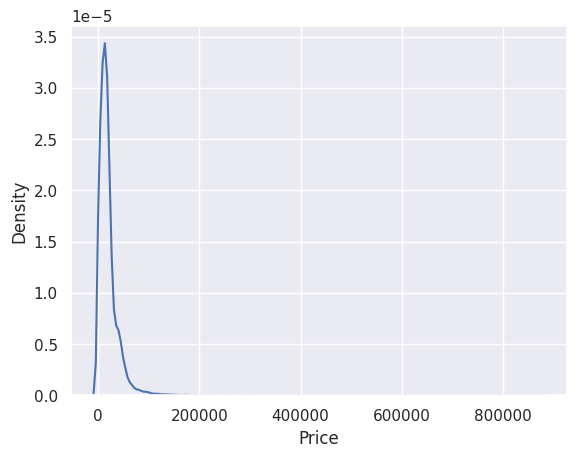

In [ ]:
sns.kdeplot(cars_tr["Price"])

<Axes: xlabel='Price'>

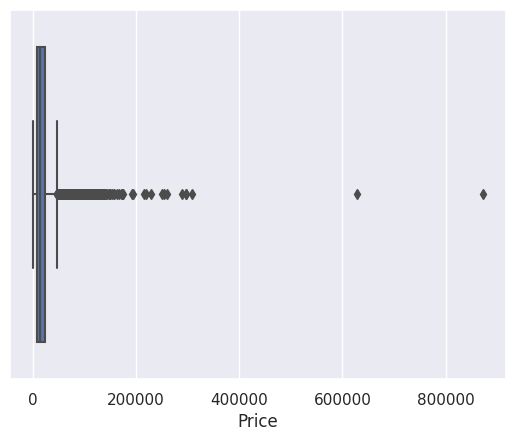

In [ ]:
sns.boxplot(data=cars_tr, x='Price')

### 100-200 000

In [ ]:
cars_tr = cars_tr[cars_tr['Price'] > 100]
cars_tr = cars_tr[cars_tr['Price'] < 200000]


<Axes: xlabel='Price', ylabel='Density'>

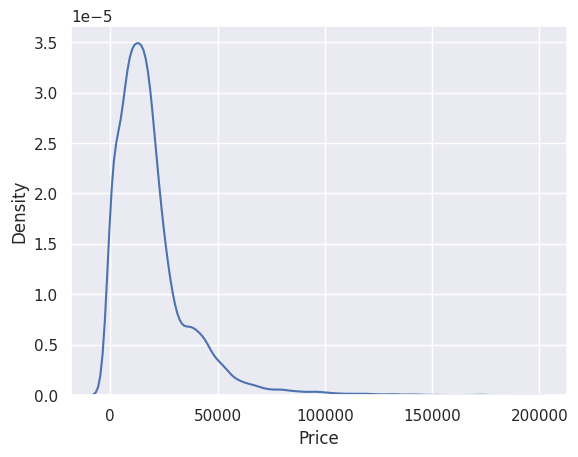

In [ ]:
sns.kdeplot(cars_tr["Price"])

<Axes: xlabel='Price'>

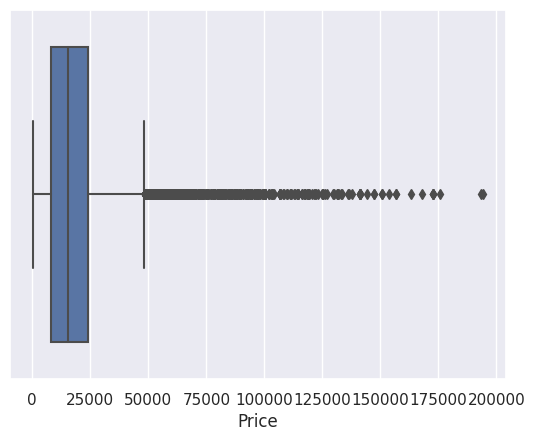

In [ ]:
sns.boxplot(data=cars_tr, x='Price')

### 500-50 000

In [ ]:
cars_tr = cars_tr[cars_tr['Price'] > 500]
cars_tr = cars_tr[cars_tr['Price'] < 80000]


In [ ]:
cars_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13779 entries, 0 to 19234
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total_Price    13779 non-null  float64
 1   Price          13779 non-null  int64  
 2   Levy           13779 non-null  float64
 3   Manufacturer   13779 non-null  object 
 4   Model          13779 non-null  object 
 5   Prod_year      13779 non-null  int64  
 6   Category       13779 non-null  object 
 7   Leather_inter  13779 non-null  bool   
 8   Type           13779 non-null  object 
 9   EngV           13779 non-null  float64
 10  Mileage        13779 non-null  int64  
 11  Cylinders      13779 non-null  int64  
 12  Gearbox        13779 non-null  object 
 13  Drive          13779 non-null  object 
 14  Doors          13779 non-null  int64  
 15  Steering       13779 non-null  int64  
 16  Color          13779 non-null  object 
 17  Airbags        13779 non-null  int64  
 18  Turbo 

<Axes: xlabel='Price', ylabel='Density'>

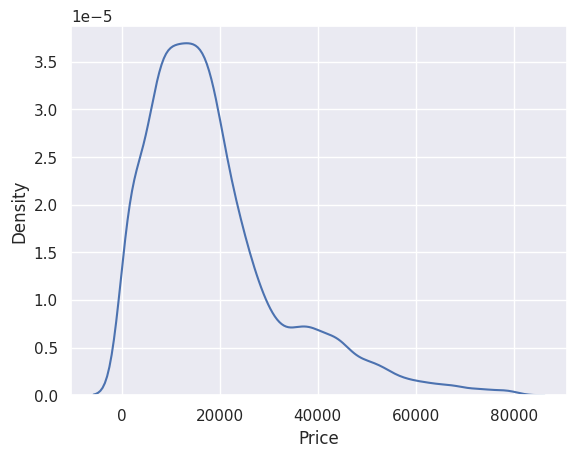

In [ ]:
sns.kdeplot(cars_tr["Price"])

<Axes: xlabel='Price'>

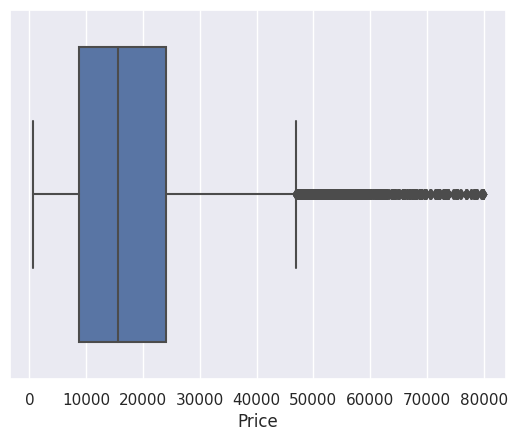

In [ ]:
sns.boxplot(data=cars_tr, x='Price')

In [ ]:
cars_tr.shape

(13779, 19)

In [ ]:
cars_tr.head()

Total_Price  Price         Levy Manufacturer  Model  Prod_year   Category  \
0  14727.000000  13328  1399.000000        LEXUS  other       2010       Jeep   
1  17639.000000  16621  1018.000000    CHEVROLET  other       2011       Jeep   
2   9346.440195   8467   879.440195        HONDA    FIT       2006  Hatchback   
3   4469.000000   3607   862.000000         FORD  other       2011       Jeep   
4  12172.000000  11726   446.000000        HONDA    FIT       2014  Hatchback   

   Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  Drive  Doors  \
0           True  Hybrid   3.5   186005         10  Automatic    4x4      4   
1          False  Petrol   3.0   192000         10  Tiptronic    4x4      4   
2          False  Petrol   2.0   200000          5   Variator  Front      4   
3           True  Hybrid   2.5   168966          5  Automatic    4x4      4   
4           True  Petrol   2.0    91901          5  Automatic  Front      4   

   Steering   Color  Airbags  Turbo  
0         0  Silver       12  False  
1         0   Black        8  False  
2         1   Black        2  False  
3         0   White        0  False  
4         0  Silver        4  False

In [ ]:
cars_tr.describe()

Total_Price         Price          Levy     Prod_year          EngV  \
count  13779.000000  13779.000000  13779.000000  13779.000000  13779.000000   
mean   19553.223502  18689.420568    863.802934   2010.824588      2.335518   
std    14223.927767  14211.780771    272.026201      5.055728      0.608788   
min      808.000000    549.000000     87.000000   2000.000000      2.000000   
25%     9655.220098   8781.000000    730.000000   2008.000000      2.000000   
50%    16403.440195  15681.000000    879.440195   2012.000000      2.000000   
75%    24826.000000  24016.500000    879.440195   2014.000000      2.500000   
max    81685.000000  79971.000000   2200.000000   2020.000000      6.000000   

             Mileage     Cylinders         Doors      Steering       Airbags  
count   13779.000000  13779.000000  13779.000000  13779.000000  13779.000000  
mean   119312.248857      5.898033      3.909065      0.093040      6.484360  
std     71596.800968      1.962039      0.442274      0.290499      3.989002  
min         0.000000      3.000000      2.000000      0.000000      0.000000  
25%     65000.000000      5.000000      4.000000      0.000000      4.000000  
50%    116000.000000      5.000000      4.000000      0.000000      6.000000  
75%    168328.000000      5.000000      4.000000      0.000000     10.000000  
max    299999.000000     10.000000      5.000000      1.000000     16.000000

## Color

<Axes: ylabel='Color'>

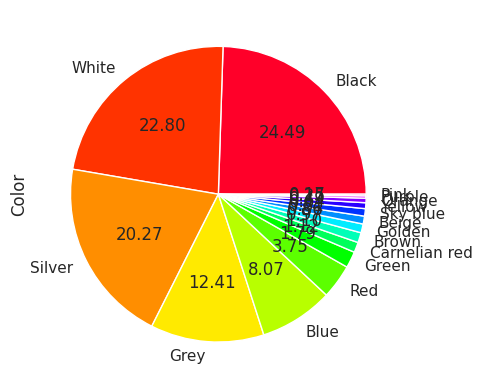

In [ ]:
cars_tr["Color"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [ ]:
cars_tr['Color'] = cars_tr['Color'].str.lower()
cars_tr.head()

Total_Price  Price         Levy Manufacturer  Model  Prod_year   Category  \
0  14727.000000  13328  1399.000000        LEXUS  other       2010       Jeep   
1  17639.000000  16621  1018.000000    CHEVROLET  other       2011       Jeep   
2   9346.440195   8467   879.440195        HONDA    FIT       2006  Hatchback   
3   4469.000000   3607   862.000000         FORD  other       2011       Jeep   
4  12172.000000  11726   446.000000        HONDA    FIT       2014  Hatchback   

   Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  Drive  Doors  \
0           True  Hybrid   3.5   186005         10  Automatic    4x4      4   
1          False  Petrol   3.0   192000         10  Tiptronic    4x4      4   
2          False  Petrol   2.0   200000          5   Variator  Front      4   
3           True  Hybrid   2.5   168966          5  Automatic    4x4      4   
4           True  Petrol   2.0    91901          5  Automatic  Front      4   

   Steering   Color  Airbags  Turbo  
0         0  silver       12  False  
1         0   black        8  False  
2         1   black        2  False  
3         0   white        0  False  
4         0  silver        4  False

<Axes: xlabel='Color', ylabel='Count'>

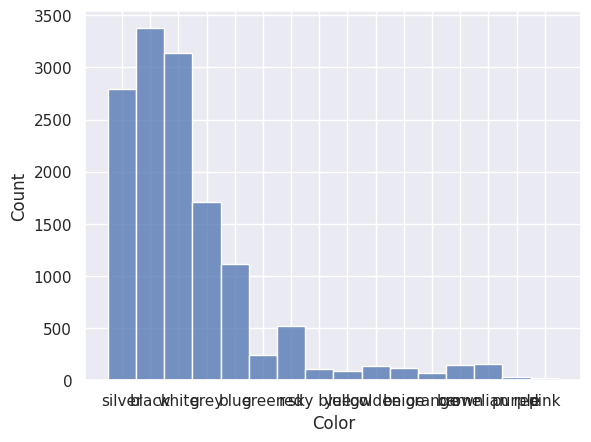

In [ ]:
sns.histplot(data=cars_tr, x="Color")

In [ ]:
cars_tr.head()

Total_Price  Price         Levy Manufacturer  Model  Prod_year   Category  \
0  14727.000000  13328  1399.000000        LEXUS  other       2010       Jeep   
1  17639.000000  16621  1018.000000    CHEVROLET  other       2011       Jeep   
2   9346.440195   8467   879.440195        HONDA    FIT       2006  Hatchback   
3   4469.000000   3607   862.000000         FORD  other       2011       Jeep   
4  12172.000000  11726   446.000000        HONDA    FIT       2014  Hatchback   

   Leather_inter    Type  EngV  Mileage  Cylinders    Gearbox  Drive  Doors  \
0           True  Hybrid   3.5   186005         10  Automatic    4x4      4   
1          False  Petrol   3.0   192000         10  Tiptronic    4x4      4   
2          False  Petrol   2.0   200000          5   Variator  Front      4   
3           True  Hybrid   2.5   168966          5  Automatic    4x4      4   
4           True  Petrol   2.0    91901          5  Automatic  Front      4   

   Steering   Color  Airbags  Turbo  
0         0  silver       12  False  
1         0   black        8  False  
2         1   black        2  False  
3         0   white        0  False  
4         0  silver        4  False

## LabelEncoder

In [ ]:
Manufacturer_le = LabelEncoder()
Model_le = LabelEncoder()
Category_le = LabelEncoder()
Type_le = LabelEncoder()
Gearbox_le = LabelEncoder()
Drive_le = LabelEncoder()

In [ ]:
cars_tr['Manufacturer'] = Manufacturer_le.fit_transform(cars_tr['Manufacturer'])
cars_tr['Model'] = Model_le.fit_transform(cars_tr['Model'])
cars_tr['Category'] = Category_le.fit_transform(cars_tr['Category'])
cars_tr['Type'] = Type_le.fit_transform(cars_tr['Type'])
cars_tr['Gearbox'] = Gearbox_le.fit_transform(cars_tr['Gearbox'])
cars_tr['Drive'] = Drive_le.fit_transform(cars_tr['Drive'])


In [ ]:
Color_le = LabelEncoder()
cars_cleaned['Color'] = Color_le.fit_transform(cars_cleaned['Color'])
cars_cleaned['Manufacturer'] = Manufacturer_le.fit_transform(cars_cleaned['Manufacturer'])
cars_cleaned['Model'] = Model_le.fit_transform(cars_cleaned['Model'])
cars_cleaned['Category'] = Category_le.fit_transform(cars_cleaned['Category'])
cars_cleaned['Type'] = Type_le.fit_transform(cars_cleaned['Type'])
cars_cleaned['Gearbox'] = Gearbox_le.fit_transform(cars_cleaned['Gearbox'])
cars_cleaned['Drive'] = Drive_le.fit_transform(cars_cleaned['Drive'])
cars_cleaned = cars_cleaned.drop(['Total_Price'], axis=1)

In [ ]:
cars_tr['Color_Black'] = cars_tr['Color'].str.contains('black')
cars_tr['Color_White'] = cars_tr['Color'].str.contains('white')
cars_tr['Color_Red'] = cars_tr['Color'].str.contains('red')
cars_tr['Color_Silver'] = cars_tr['Color'].str.contains('silver')
cars_tr['Color_Grey'] = cars_tr['Color'].str.contains('grey')
cars_tr['Color_Blue'] = cars_tr['Color'].str.contains('blue')
cars_tr['Color_Golden_Beige'] = cars_tr['Color'].str.contains('golden|beige')
cars_tr['Color_Or_Yel_Brown'] = cars_tr['Color'].str.contains('orange|brown|yellow')
cars_tr['Color_Pink_Purple'] = cars_tr['Color'].str.contains('pink|purple')
cars_tr['Color_Green'] = cars_tr['Color'].str.contains('green')
cars_tr.drop('Color', axis=1, inplace=True)


In [ ]:
cars_tr.head()

Total_Price  Price         Levy  Manufacturer  Model  Prod_year  Category  \
0  14727.000000  13328  1399.000000             6     24       2010         4   
1  17639.000000  16621  1018.000000             1     24       2011         4   
2   9346.440195   8467   879.440195             3      9       2006         3   
3   4469.000000   3607   862.000000             2     24       2011         4   
4  12172.000000  11726   446.000000             3      9       2014         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
0           True     2   3.5   186005         10        0      0      4   
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
4           True     4   2.0    91901          5        0      1      4   

   Steering  Airbags  Turbo  Color_Black  Color_White  Color_Red  \
0         0       12  False        False        False      False   
1         0        8  False         True        False      False   
2         1        2  False         True        False      False   
3         0        0  False        False         True      False   
4         0        4  False        False        False      False   

   Color_Silver  Color_Grey  Color_Blue  Color_Golden_Beige  \
0          True       False       False               False   
1         False       False       False               False   
2         False       False       False               False   
3         False       False       False               False   
4          True       False       False               False   

   Color_Or_Yel_Brown  Color_Pink_Purple  Color_Green  
0               False              False        False  
1               False              False        False  
2               False              False        False  
3               False              False        False  
4               False              False        False

In [ ]:
cars_tr.describe()

Total_Price         Price          Levy  Manufacturer         Model  \
count  13779.000000  13779.000000  13779.000000  13779.000000  13779.000000   
mean   19553.223502  18689.420568    863.802934      7.367443     18.146527   
std    14223.927767  14211.780771    272.026201      4.927185      7.676558   
min      808.000000    549.000000     87.000000      0.000000      0.000000   
25%     9655.220098   8781.000000    730.000000      4.000000     12.000000   
50%    16403.440195  15681.000000    879.440195      7.000000     24.000000   
75%    24826.000000  24016.500000    879.440195     13.000000     24.000000   
max    81685.000000  79971.000000   2200.000000     15.000000     24.000000   

          Prod_year      Category          Type          EngV        Mileage  \
count  13779.000000  13779.000000  13779.000000  13779.000000   13779.000000   
mean    2010.824588      6.180274      2.927789      2.335518  119312.248857   
std        5.055728      2.824681      1.359022      0.608788   71596.800968   
min     2000.000000      0.000000      0.000000      2.000000       0.000000   
25%     2008.000000      4.000000      2.000000      2.000000   65000.000000   
50%     2012.000000      6.000000      4.000000      2.000000  116000.000000   
75%     2014.000000      9.000000      4.000000      2.500000  168328.000000   
max     2020.000000     10.000000      5.000000      6.000000  299999.000000   

          Cylinders       Gearbox         Drive         Doors      Steering  \
count  13779.000000  13779.000000  13779.000000  13779.000000  13779.000000   
mean       5.898033      0.667610      0.953480      3.909065      0.093040   
std        1.962039      0.959843      0.533613      0.442274      0.290499   
min        3.000000      0.000000      0.000000      2.000000      0.000000   
25%        5.000000      0.000000      1.000000      4.000000      0.000000   
50%        5.000000      0.000000      1.000000      4.000000      0.000000   
75%        5.000000      2.000000      1.000000      4.000000      0.000000   
max       10.000000      3.000000      2.000000      5.000000      1.000000   

            Airbags  
count  13779.000000  
mean       6.484360  
std        3.989002  
min        0.000000  
25%        4.000000  
50%        6.000000  
75%       10.000000  
max       16.000000

In [ ]:
cols_to_move = ['Total_Price', 'Price', 'Levy']

cars_tr = cars_tr[cols_to_move + [x for x in cars_tr.columns if x not in cols_to_move]]

In [ ]:
cars_cleaned.head()

Price         Levy  Manufacturer  Model  Prod_year  Category  \
0  13328  1399.000000            32   1242       2010         4   
1  16621  1018.000000             8    658       2011         4   
2   8467   879.440195            21    684       2006         3   
3   3607   862.000000            16    661       2011         4   
4  11726   446.000000            21    684       2014         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
0           True     2   3.5   186005         10        0      0      4   
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
4           True     4   2.0    91901          5        0      1      4   

   Steering  Color  Airbags  Turbo  
0         0     12       12  False  
1         0      1        8  False  
2         1      1        2  False  
3         0     14        0  False  
4         0     12        4  False

In [ ]:
cars_cleaned.describe()

Price          Levy  Manufacturer         Model     Prod_year  \
count  1.572400e+04  15724.000000  15724.000000  15724.000000  15724.000000   
mean   2.027943e+04    870.529295     32.801832    863.080069   2010.518825   
std    2.106457e+05    277.787104     18.081431    422.271041      6.012302   
min    1.000000e+00     87.000000      0.000000      0.000000   1939.000000   
25%    7.527000e+03    746.000000     21.000000    505.000000   2008.000000   
50%    1.416600e+04    879.440195     28.000000    854.500000   2012.000000   
75%    2.337025e+04    879.440195     54.000000   1229.250000   2014.000000   
max    2.630750e+07   2200.000000     64.000000   1589.000000   2020.000000   

           Category          Type          EngV       Mileage     Cylinders  \
count  15724.000000  15724.000000  15724.000000  1.572400e+04  15724.000000   
mean       6.209616      2.920376      2.356398  1.836530e+06      5.960188   
std        2.817016      1.347197      0.635762  5.353418e+07      2.011180   
min        0.000000      0.000000      2.000000  0.000000e+00      3.000000   
25%        4.000000      2.000000      2.000000  6.657075e+04      5.000000   
50%        7.000000      4.000000      2.000000  1.210000e+05      5.000000   
75%        9.000000      4.000000      2.500000  1.800000e+05      5.000000   
max       10.000000      5.000000      6.000000  2.147484e+09     10.000000   

            Gearbox         Drive         Doors      Steering         Color  \
count  15724.000000  15724.000000  15724.000000  15724.000000  15724.000000   
mean       0.646337      0.949313      3.912999      0.091071      7.837637   
std        0.947395      0.546426      0.436008      0.287719      5.324600   
min        0.000000      0.000000      2.000000      0.000000      0.000000   
25%        0.000000      1.000000      4.000000      0.000000      1.000000   
50%        0.000000      1.000000      4.000000      0.000000      7.000000   
75%        1.000000      1.000000      4.000000      0.000000     12.000000   
max        3.000000      2.000000      5.000000      1.000000     15.000000   

            Airbags  
count  15724.000000  
mean       6.543246  
std        4.067840  
min        0.000000  
25%        4.000000  
50%        6.000000  
75%       12.000000  
max       16.000000

## Удаление выбросов через эвристику (cars_cleaned)

In [ ]:
Q1 = np.percentile(cars_cleaned['Price'],25)
Q3 = np.percentile(cars_cleaned['Price'],75)
IQR = Q3 - Q1
lower_bond = Q1 - (1.5*IQR)
upper_bond = Q3 + (1.5*IQR)

cars_cleaned[(cars_cleaned['Price'] < lower_bond) | (cars_cleaned['Price'] > upper_bond)].shape

(955, 18)

In [ ]:
def outliers_detection(df,f):
    Q1 = np.percentile(df[f],25)
    Q3 = np.percentile(df[f],75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)

    ls = df.index[(df[f] < lower_bound ) | (df[f] > upper_bound) ]

    return ls

In [ ]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
Q1 = np.percentile(cars_cleaned['Price'],25)
Q3 = np.percentile(cars_cleaned['Price'],75)
IQR = Q3 - Q1
lower_bond = Q1 - (1.5*IQR)
upper_bond = Q3 + (1.5*IQR)

cars_cleaned[(cars_cleaned['Price'] < lower_bond) | (cars_cleaned['Price'] > upper_bond)].shape

(955, 18)

In [ ]:
index_list = []

for feature in ['Price', 'Levy', 'Mileage']:
    index_list.extend(outliers_detection(cars_cleaned,feature))

In [ ]:
cars_cleaned = remove(cars_cleaned,index_list)

In [ ]:
cars_cleaned.shape

(11322, 18)

In [ ]:
index_list_df = []

for feature in ['Price', 'Levy', 'Mileage']:
    index_list_df.extend(outliers_detection(cars_cleaned,feature))

In [ ]:
cars_cleaned.head()

Price         Levy  Manufacturer  Model  Prod_year  Category  \
1  16621  1018.000000             8    658       2011         4   
2   8467   879.440195            21    684       2006         3   
3   3607   862.000000            16    661       2011         4   
5  39493   891.000000            23   1305       2016         4   
6   1803   761.000000            58   1154       2010         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
5           True     1   2.0   160931          5        0      1      4   
6           True     2   2.0   258909          5        0      1      4   

   Steering  Color  Airbags  Turbo  
1         0      1        8  False  
2         1      1        2  False  
3         0     14        0  False  
5         0     14        4  False  
6         0     14       12  False

In [ ]:
#sns.boxplot(cars_cleaned['Price'][0])

<Axes: >

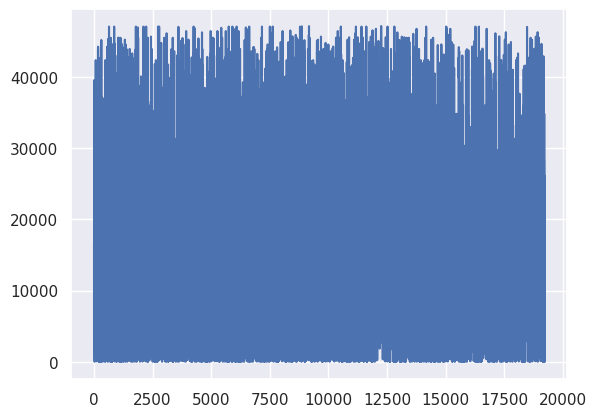

In [ ]:
cars_cleaned['Price'].plot()

<Axes: xlabel='Price', ylabel='Density'>

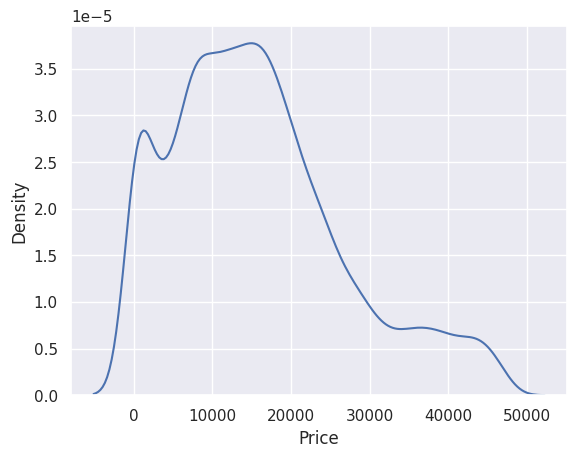

In [ ]:
sns.kdeplot(cars_cleaned['Price'])

<Axes: xlabel='Levy', ylabel='Density'>

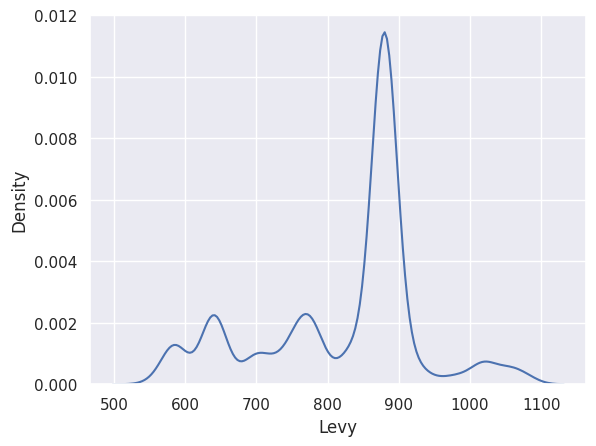

In [ ]:
sns.kdeplot(cars_cleaned['Levy'])

In [ ]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11322 entries, 1 to 19236
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          11322 non-null  int64  
 1   Levy           11322 non-null  float64
 2   Manufacturer   11322 non-null  int64  
 3   Model          11322 non-null  int64  
 4   Prod_year      11322 non-null  int64  
 5   Category       11322 non-null  int64  
 6   Leather_inter  11322 non-null  bool   
 7   Type           11322 non-null  int64  
 8   EngV           11322 non-null  float64
 9   Mileage        11322 non-null  int64  
 10  Cylinders      11322 non-null  int64  
 11  Gearbox        11322 non-null  int64  
 12  Drive          11322 non-null  int64  
 13  Doors          11322 non-null  int64  
 14  Steering       11322 non-null  int64  
 15  Color          11322 non-null  int64  
 16  Airbags        11322 non-null  int64  
 17  Turbo          11322 non-null  bool   
dtypes: boo

<Axes: xlabel='Prod_year', ylabel='Density'>

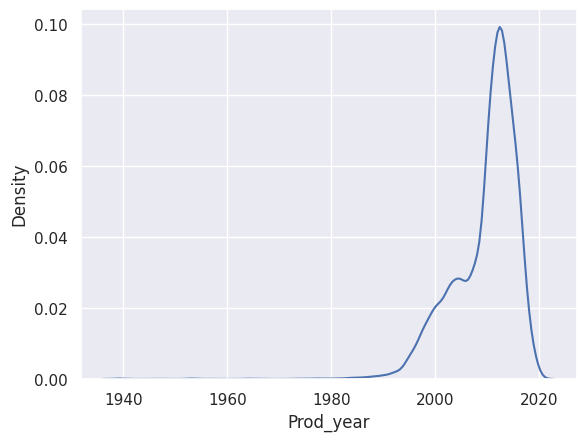

In [ ]:
sns.kdeplot(cars_cleaned['Prod_year'])

<Axes: xlabel='Mileage', ylabel='Density'>

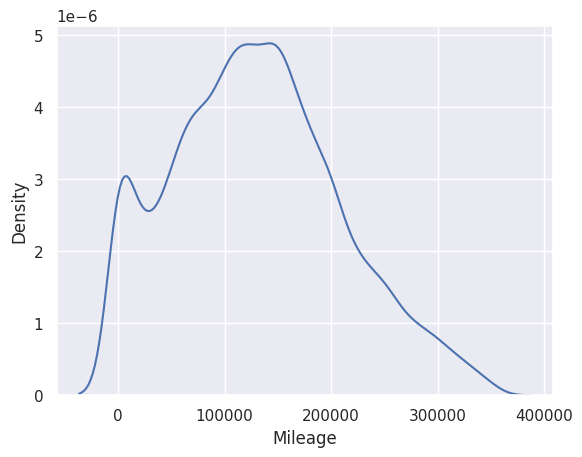

In [ ]:
sns.kdeplot(cars_cleaned['Mileage'])

<Axes: xlabel='Color', ylabel='Density'>

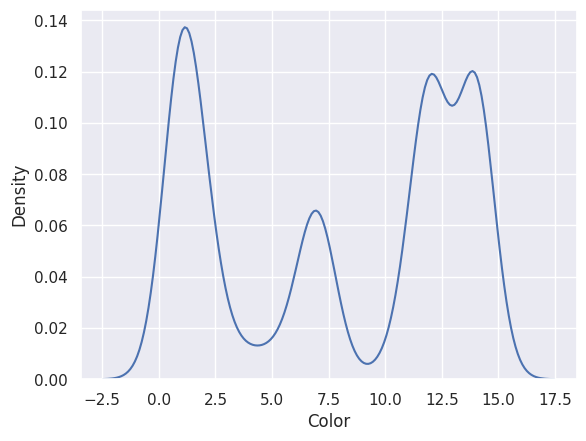

In [ ]:
sns.kdeplot(cars_cleaned['Color'])

# Зависимости

In [ ]:
fig = px.imshow(cars_tr.corr(), width=800, height=800, color_continuous_scale=['#f84f31', '#ffffff', '#23c552'])
fig.show()

In [ ]:
fig = px.imshow(cars_cleaned.corr(), width=800, height=800, color_continuous_scale=['#f84f31', '#ffffff', '#23c552'], )
fig.show()

# Pipeline Price

## cars_tr

In [ ]:
cars_tr.head()

Total_Price  Price         Levy  Manufacturer  Model  Prod_year  Category  \
0  14727.000000  13328  1399.000000             6     24       2010         4   
1  17639.000000  16621  1018.000000             1     24       2011         4   
2   9346.440195   8467   879.440195             3      9       2006         3   
3   4469.000000   3607   862.000000             2     24       2011         4   
4  12172.000000  11726   446.000000             3      9       2014         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
0           True     2   3.5   186005         10        0      0      4   
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
4           True     4   2.0    91901          5        0      1      4   

   Steering  Airbags  Turbo  Color_Black  Color_White  Color_Red  \
0         0       12  False        False        False      False   
1         0        8  False         True        False      False   
2         1        2  False         True        False      False   
3         0        0  False        False         True      False   
4         0        4  False        False        False      False   

   Color_Silver  Color_Grey  Color_Blue  Color_Golden_Beige  \
0          True       False       False               False   
1         False       False       False               False   
2         False       False       False               False   
3         False       False       False               False   
4          True       False       False               False   

   Color_Or_Yel_Brown  Color_Pink_Purple  Color_Green  
0               False              False        False  
1               False              False        False  
2               False              False        False  
3               False              False        False  
4               False              False        False

In [ ]:
X= cars_tr.drop(["Total_Price", "Price"], axis = 1)
y= cars_tr["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])



In [ ]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor""}

In [ ]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    cv_score_2 = cross_val_score(model, X_train,y_train, scoring="r2", cv=5)
    pred = model.predict(X_test)
    print("%s: %f %f %f" % (pipe_dict[i], cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))



LinearRegression: -11565.368075 0.341904 0.339809
DecisionTree: -10273.818735 0.481052 0.441575
RandomForest: -7342.388503 0.734795 0.727898
KNeighbors: -9728.420495 0.534774 0.542876
XGBRegressor: -7536.801308 0.720753 0.732101


## cars_cleaned

In [ ]:
X_c= cars_cleaned.drop(["Price"], axis=1)
y_c= cars_cleaned["Price"]

X_train, X_test, y_train, y_test = train_test_split(X_c, y_c,test_size=0.25, random_state=7)

In [ ]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    cv_score_2 = cross_val_score(model, X_train,y_train, scoring="r2", cv=5)
    pred = model.predict(X_test)
    print("%s: %f %f %f" % (pipe_dict[i], cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

LinearRegression: -9117.862875 0.322249 0.311278
DecisionTree: -8206.636048 0.440839 0.456984
RandomForest: -5982.352621 0.706537 0.698907
KNeighbors: -7129.295069 0.585582 0.581283
XGBRegressor: -6113.316676 0.695047 0.702424


# Pipeline Total_Price

In [ ]:
label_data2 = cars_tr.copy()

In [ ]:
label_data2.head()

Total_Price  Price         Levy  Manufacturer  Model  Prod_year  Category  \
0  14727.000000  13328  1399.000000             6     24       2010         4   
1  17639.000000  16621  1018.000000             1     24       2011         4   
2   9346.440195   8467   879.440195             3      9       2006         3   
3   4469.000000   3607   862.000000             2     24       2011         4   
4  12172.000000  11726   446.000000             3      9       2014         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
0           True     2   3.5   186005         10        0      0      4   
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
4           True     4   2.0    91901          5        0      1      4   

   Steering  Airbags  Turbo  Color_Black  Color_White  Color_Red  \
0         0       12  False        False        False      False   
1         0        8  False         True        False      False   
2         1        2  False         True        False      False   
3         0        0  False        False         True      False   
4         0        4  False        False        False      False   

   Color_Silver  Color_Grey  Color_Blue  Color_Golden_Beige  \
0          True       False       False               False   
1         False       False       False               False   
2         False       False       False               False   
3         False       False       False               False   
4          True       False       False               False   

   Color_Or_Yel_Brown  Color_Pink_Purple  Color_Green  
0               False              False        False  
1               False              False        False  
2               False              False        False  
3               False              False        False  
4               False              False        False

In [ ]:
X= label_data2.drop(["Total_Price", "Price"], axis = 1)
y= label_data2["Total_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    cv_score_2 = cross_val_score(model, X_train,y_train, scoring="r2", cv=10)
    pred = model.predict(X_test)
    print("%s: %f %f %f" % (pipe_dict[i], cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

LinearRegression: -11557.518412 0.343151 0.341152
DecisionTree: -10190.655855 0.484728 0.458198
RandomForest: -7286.543735 0.739305 0.729595
KNeighbors: -9615.327224 0.545680 0.543618
XGBRegressor: -7374.458078 0.732565 0.737326


# Различные виды регрессий с выводом в таблицы cars_tr Price

## Подготовка тренировочного и тестового наборов

In [ ]:
cars_tr.head()

Total_Price  Price         Levy  Manufacturer  Model  Prod_year  Category  \
0  14727.000000  13328  1399.000000             6     24       2010         4   
1  17639.000000  16621  1018.000000             1     24       2011         4   
2   9346.440195   8467   879.440195             3      9       2006         3   
3   4469.000000   3607   862.000000             2     24       2011         4   
4  12172.000000  11726   446.000000             3      9       2014         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
0           True     2   3.5   186005         10        0      0      4   
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
4           True     4   2.0    91901          5        0      1      4   

   Steering  Airbags  Turbo  Color_Black  Color_White  Color_Red  \
0         0       12  False        False        False      False   
1         0        8  False         True        False      False   
2         1        2  False         True        False      False   
3         0        0  False        False         True      False   
4         0        4  False        False        False      False   

   Color_Silver  Color_Grey  Color_Blue  Color_Golden_Beige  \
0          True       False       False               False   
1         False       False       False               False   
2         False       False       False               False   
3         False       False       False               False   
4          True       False       False               False   

   Color_Or_Yel_Brown  Color_Pink_Purple  Color_Green  
0               False              False        False  
1               False              False        False  
2               False              False        False  
3               False              False        False  
4               False              False        False

In [ ]:
X = cars_tr.drop(['Price', 'Total_Price'], axis=1).values
Y = cars_tr['Price'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=42)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

## LinearRegression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()

y_test        y_pred
0   17249   3062.310709
1   13485  16964.007099
2   10506  29260.543022
3   16308  18211.639008
4   13877  16173.925030

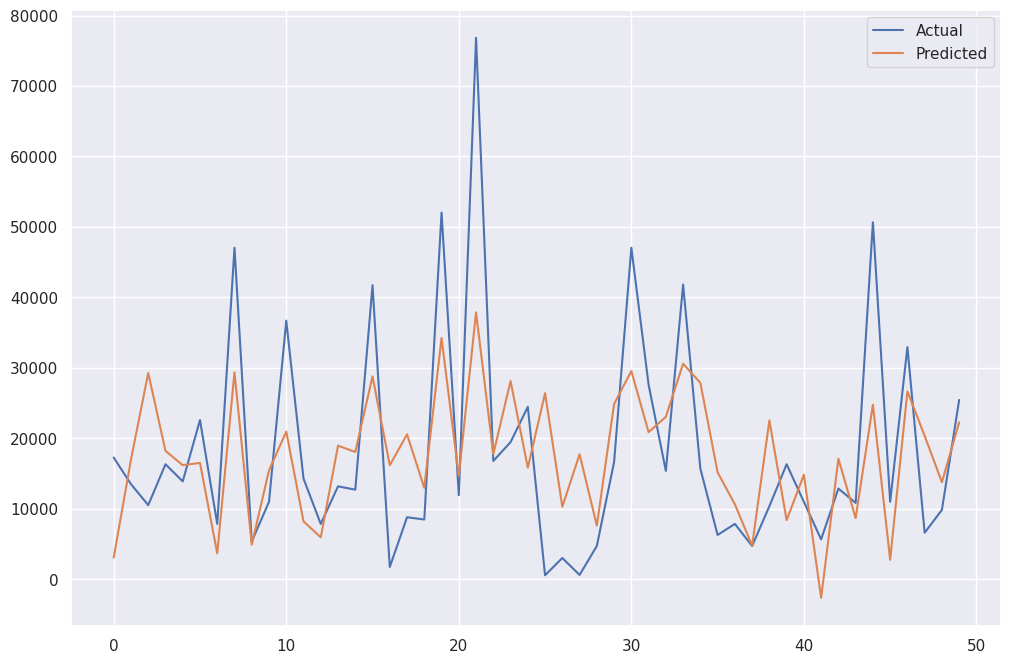

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 8720.62
Mean Squared Error of the model is : 138740127.84
Root Mean Squared Error of the model is : 11778.8
R-squared value of the model is : 0.346


## kNN

In [ ]:
knn= KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
kn.head()

y_test        y_pred
0  18128.440195  15755.260171
1  13988.000000  17569.555024
2  11772.000000  12735.845098
3  17087.000000  20371.735049
4  14463.000000  13842.875000

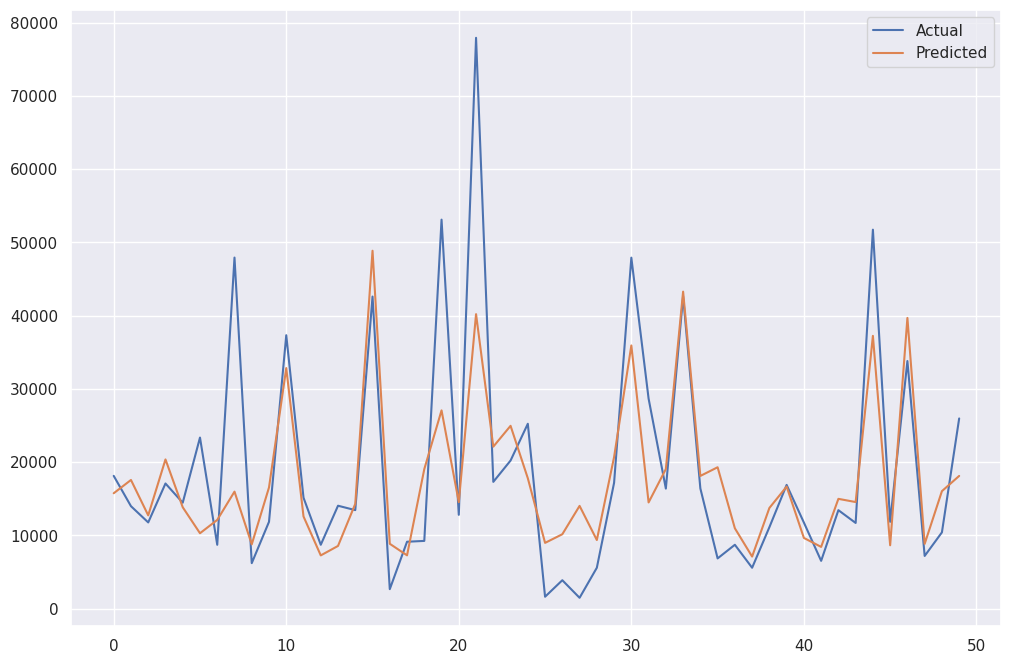

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 6456.761
Mean Squared Error of the model is : 96814254.438
Root Mean Squared Error of the model is : 9839.423
R-squared value of the model is : 0.545


In [ ]:
cv_score = cross_val_score(knn, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(knn, x_train,y_train, scoring="r2", cv=5)
pred = knn.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-9732.653914 0.522667 0.545342


### GridSearch

In [ ]:
k_range = list(range(5, 16))
lsize = list(range(10, 50, 5))
weight_options = ['uniform', 'distance']
metr = ['minkowski', 'l1', 'l2']
param_grid = dict(n_neighbors=k_range, weights=weight_options, leaf_size=lsize, metric=metr)

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
knn= KNeighborsRegressor(n_neighbors=11, leaf_size=10, metric='l1', weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

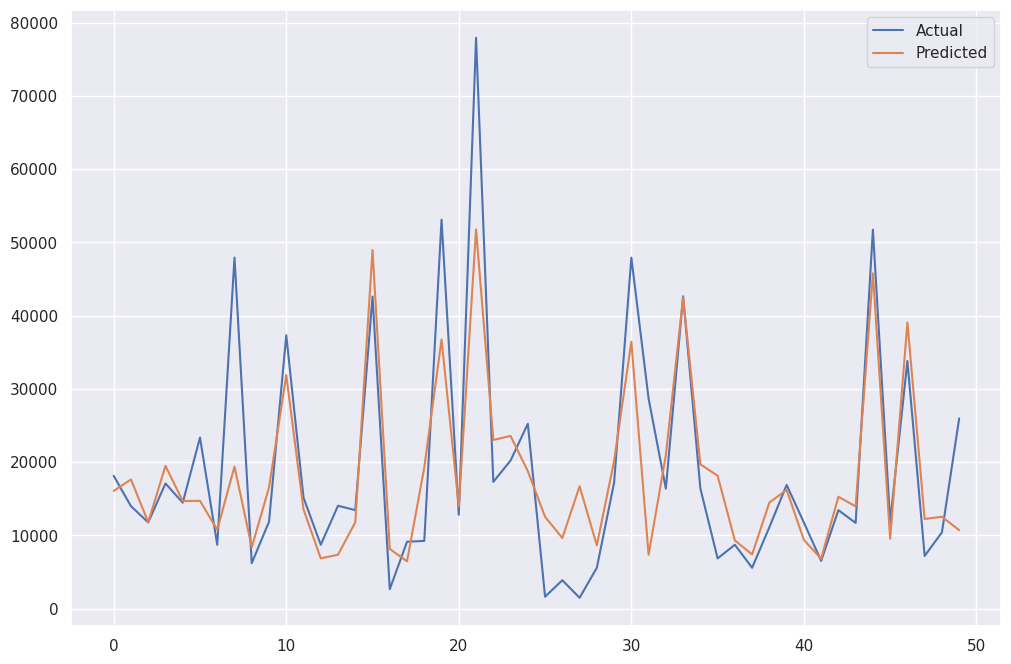

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5809.764
Mean Squared Error of the model is : 84312749.792
Root Mean Squared Error of the model is : 9182.197
R-squared value of the model is : 0.604


In [ ]:
cv_score = cross_val_score(knn, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(knn, x_train,y_train, scoring="r2", cv=5)
pred = knn.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-8890.575201 0.601774 0.604051


## GradientBoostingRegression

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.4,random_state=1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})


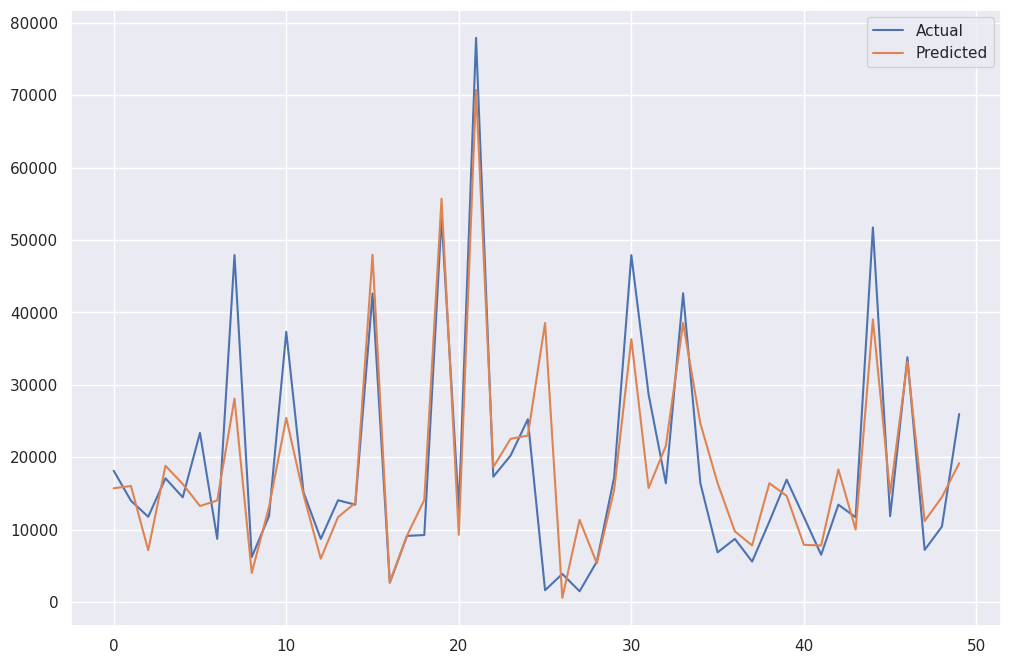

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5012.665
Mean Squared Error of the model is : 58402735.852
Root Mean Squared Error of the model is : 7642.168
R-squared value of the model is : 0.726


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7688.460030 0.701997 0.725730


### GridSearch

In [ ]:
parameters = {'random_state': range (5, 16, 2),
              'learning_rate': [0.05, 0.1, 0.15],
              'min_samples_split': [2,10,20],
              'max_depth': [3, 4, 5, 6, 8],
              "n_estimators": range (100, 401, 50)}

In [ ]:
grid = GridSearchCV(gbr, parameters, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

In [ ]:
grid.best_params_

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.14,random_state=5)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head()

y_test        y_pred
0  18128.440195  18172.053086
1  13988.000000  16759.782271
2  11772.000000   8757.626749
3  17087.000000  18636.338347
4  14463.000000  16673.109728

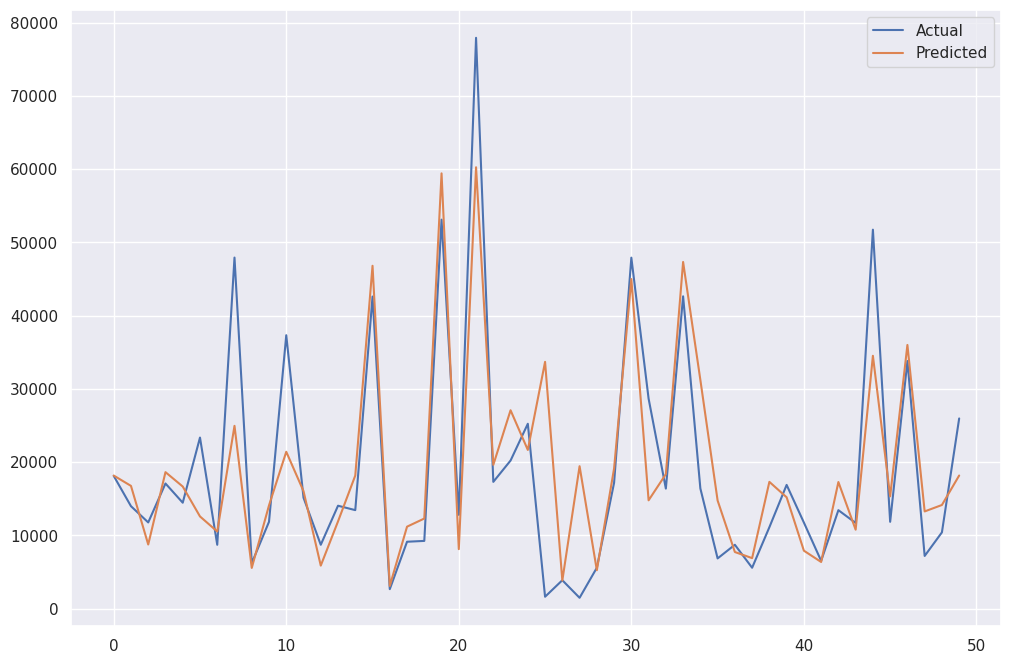

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5119.385
Mean Squared Error of the model is : 59421736.139
Root Mean Squared Error of the model is : 7708.55
R-squared value of the model is : 0.721


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7534.251440 0.713887 0.720944


## RandomForest

In [ ]:
Rf = RandomForestRegressor(n_estimators = 400,max_depth=15, max_features='log2',random_state=1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf.head()

y_test        y_pred
0  18128.440195  13043.324194
1  13988.000000  16927.157954
2  11772.000000  11893.316449
3  17087.000000  19571.980802
4  14463.000000  15926.585058

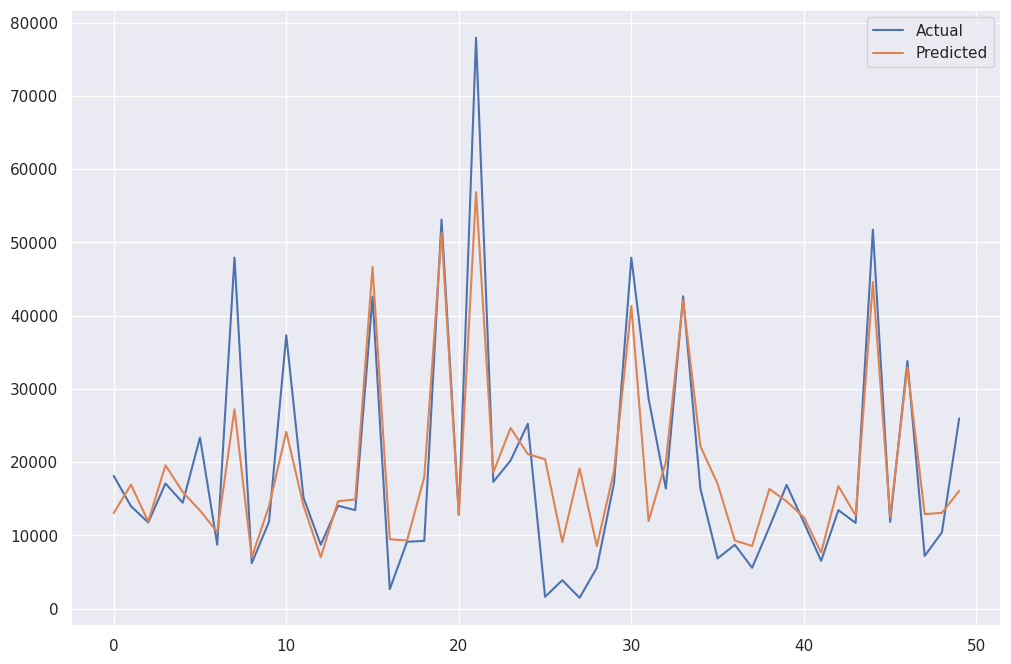

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5098.594
Mean Squared Error of the model is : 62757050.166
Root Mean Squared Error of the model is : 7921.935
R-squared value of the model is : 0.705


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7634.603629 0.706271 0.705281


### GridSearch

In [ ]:
parametrs = { 'n_estimators': range (100, 401, 50),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
grid = GridSearchCV(Rf, parametrs, cv=5)
grid.fit(x_train, y_train) # 7940 s

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, max_features='log2',
                                             n_estimators=400, random_state=1),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(100, 401, 50)})

In [ ]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
Rf = RandomForestRegressor(n_estimators = 400, max_depth=11, min_samples_split = 2, min_samples_leaf = 1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
# rf.head()

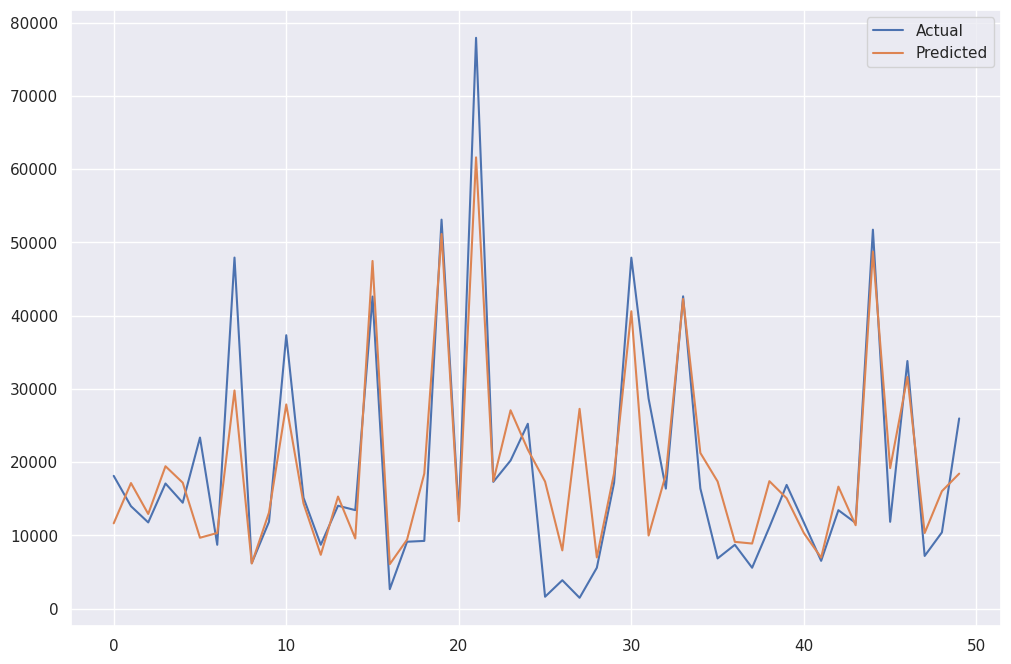

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4943.002
Mean Squared Error of the model is : 59390044.195
Root Mean Squared Error of the model is : 7706.494
R-squared value of the model is : 0.721


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7534.320402 0.713577 0.721093


In [ ]:
Rf = RandomForestRegressor(n_estimators = 50, max_depth=11, min_samples_split = 4, min_samples_leaf = 1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
# rf.head()

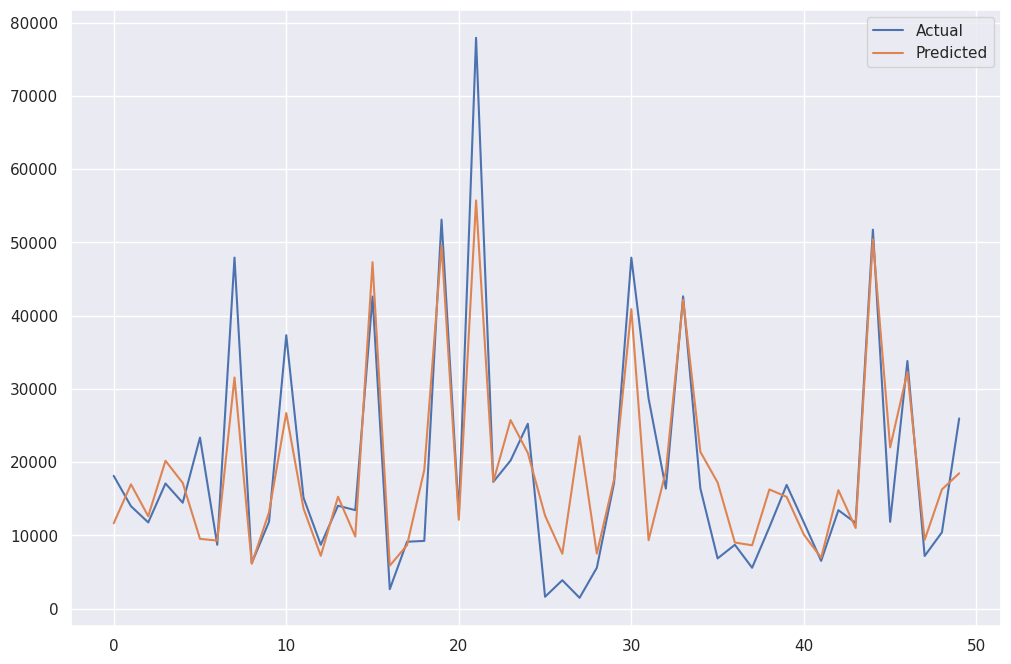

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4949.2
Mean Squared Error of the model is : 59083986.368
Root Mean Squared Error of the model is : 7686.611
R-squared value of the model is : 0.723


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7592.372469 0.711511 0.722530


## XGBRegressor

In [ ]:
# from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=6,n_estimators = 260,random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

[13:02:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


y_test        y_pred
0  18128.440195  14643.528320
1  13988.000000  16150.526367
2  11772.000000  12627.500977
3  17087.000000  19799.369141
4  14463.000000  14098.478516

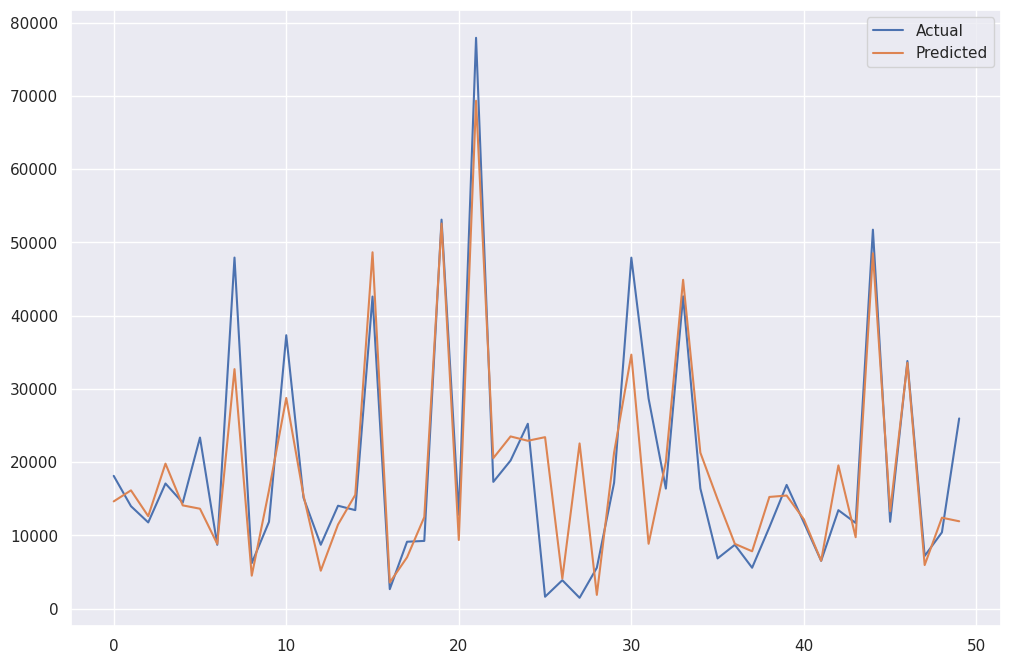

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4758.641
Mean Squared Error of the model is : 55873511.133
Root Mean Squared Error of the model is : 7474.859
R-squared value of the model is : 0.738


In [ ]:
cv_score = cross_val_score(xg, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(xg, x_train,y_train, scoring="r2", cv=5)
pred = xg.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

[13:02:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:02:59] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:18] WARNING: ../src/objective/regression_

### GridSearch

In [ ]:
params = {
        'max_depth': [3, 4, 5, 6, 8],
        'n_estimators': range (100, 401, 10)
        }

In [ ]:
grid = GridSearchCV(xg, parametrs, cv=5)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
# from xgboost import XGBRegressor
xg = XGBRegressor(max_depth=8, n_estimators=400, random_state=3, learning_rate=0.14)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

y_test        y_pred
0  18128.440195  14967.234375
1  13988.000000  17626.287109
2  11772.000000  12041.025391
3  17087.000000  22309.773438
4  14463.000000  14361.338867

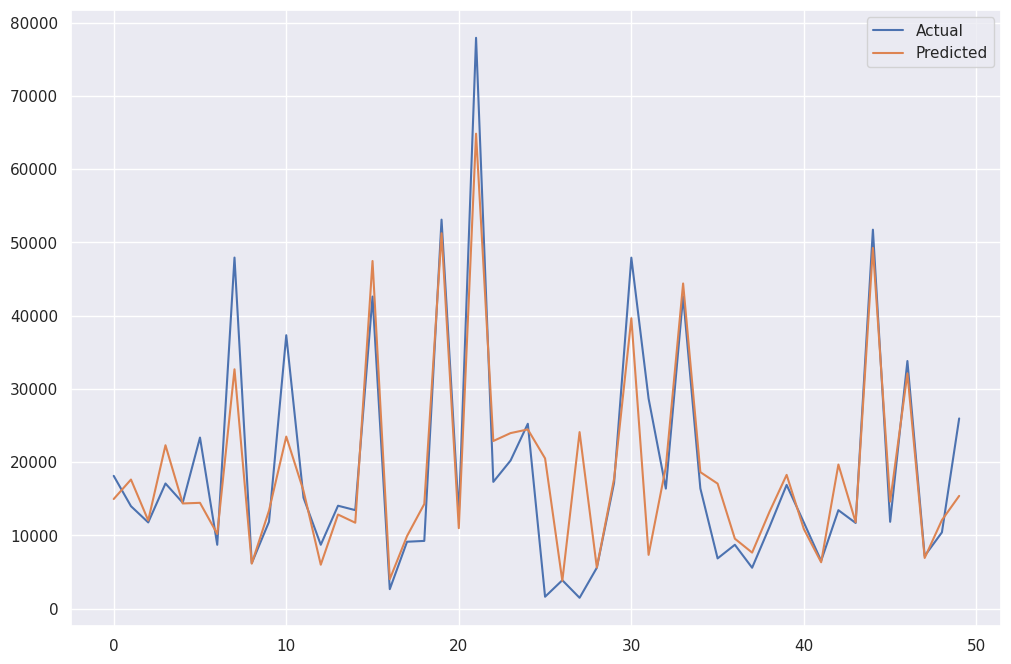

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4489.711
Mean Squared Error of the model is : 52115892.697
Root Mean Squared Error of the model is : 7219.134
R-squared value of the model is : 0.755


In [ ]:
cv_score = cross_val_score(xg, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(xg, x_train,y_train, scoring="r2", cv=5)
pred = xg.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7340.357498 0.728427 0.755254


## Формирование таблицы результатов

In [ ]:
models= [LinearRegression(),
         KNeighborsRegressor(n_neighbors=11, leaf_size=10, metric='l1', weights='distance'),
         GradientBoostingRegressor(n_estimators=380,learning_rate=0.14,random_state=5),
         RandomForestRegressor(n_estimators = 400,max_depth=11, min_samples_split = 2, min_samples_leaf = 1),
         XGBRegressor(max_depth=8, n_estimators=400, random_state=3, learning_rate=0.14)]
scores= []
test_score = []
train_score=[]
train_times = []
names= []

In [ ]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, x_train, y_train, scoring= 'r2', cv= 5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score With Cross-Validation'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    score1=model.score(x_train, y_train)
    train_score.append(score1)
    score2=model.score(x_test, y_test)
    test_score.append(score2)
df['Test_Score'] = test_score
df['Train_Score'] = train_score

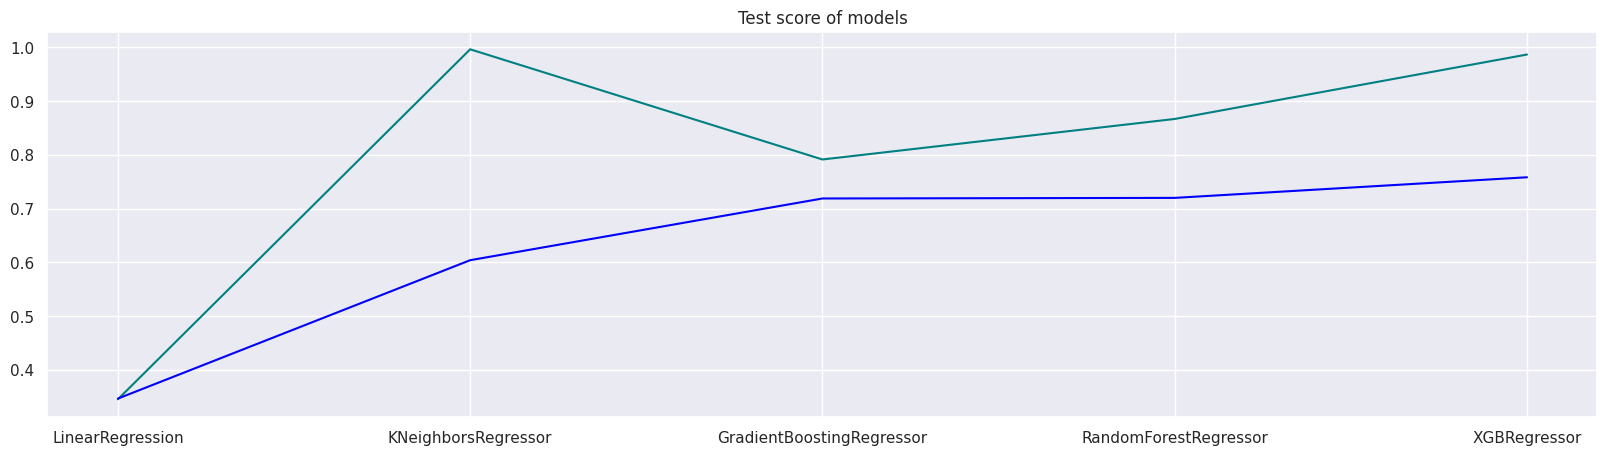

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['Model'],df['Train_Score'], color='teal')
plt.plot(df['Model'],df['Test_Score'], color='blue')
plt.title('Test score of models')
plt.show();

In [ ]:
df

Model  Score With Cross-Validation       Time  \
0           LinearRegression                     0.341963   0.120772   
1        KNeighborsRegressor                     0.601927   4.501808   
2  GradientBoostingRegressor                     0.713197  22.691788   
3      RandomForestRegressor                     0.714096  55.150182   
4               XGBRegressor                     0.727263  38.400185   

   Test_Score  Train_Score  
0    0.346499     0.345149  
1    0.604025     0.996479  
2    0.718868     0.791451  
3    0.719986     0.866865  
4    0.758347     0.986766

# Различные виды регрессий с выводом в таблицы cars_tr Total_Price

## Подготовка тренировочного и тестового наборов

In [ ]:
cars_tr.head()

Total_Price  Price         Levy  Manufacturer  Model  Prod_year  Category  \
0  14727.000000  13328  1399.000000             6     24       2010         4   
1  17639.000000  16621  1018.000000             1     24       2011         4   
2   9346.440195   8467   879.440195             3      9       2006         3   
3   4469.000000   3607   862.000000             2     24       2011         4   
4  12172.000000  11726   446.000000             3      9       2014         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
0           True     2   3.5   186005         10        0      0      4   
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
4           True     4   2.0    91901          5        0      1      4   

   Steering  Airbags  Turbo  Color_Black  Color_White  Color_Red  \
0         0       12  False        False        False      False   
1         0        8  False         True        False      False   
2         1        2  False         True        False      False   
3         0        0  False        False         True      False   
4         0        4  False        False        False      False   

   Color_Silver  Color_Grey  Color_Blue  Color_Golden_Beige  \
0          True       False       False               False   
1         False       False       False               False   
2         False       False       False               False   
3         False       False       False               False   
4          True       False       False               False   

   Color_Or_Yel_Brown  Color_Pink_Purple  Color_Green  
0               False              False        False  
1               False              False        False  
2               False              False        False  
3               False              False        False  
4               False              False        False

In [ ]:
X = cars_tr.drop(['Price', 'Total_Price'], axis=1).values
Y = cars_tr['Total_Price'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=42)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

## LinearRegression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()

y_test        y_pred
0  18128.440195   3941.750904
1  13988.000000  17467.007099
2  11772.000000  30526.543022
3  17087.000000  18990.639008
4  14463.000000  16759.925030

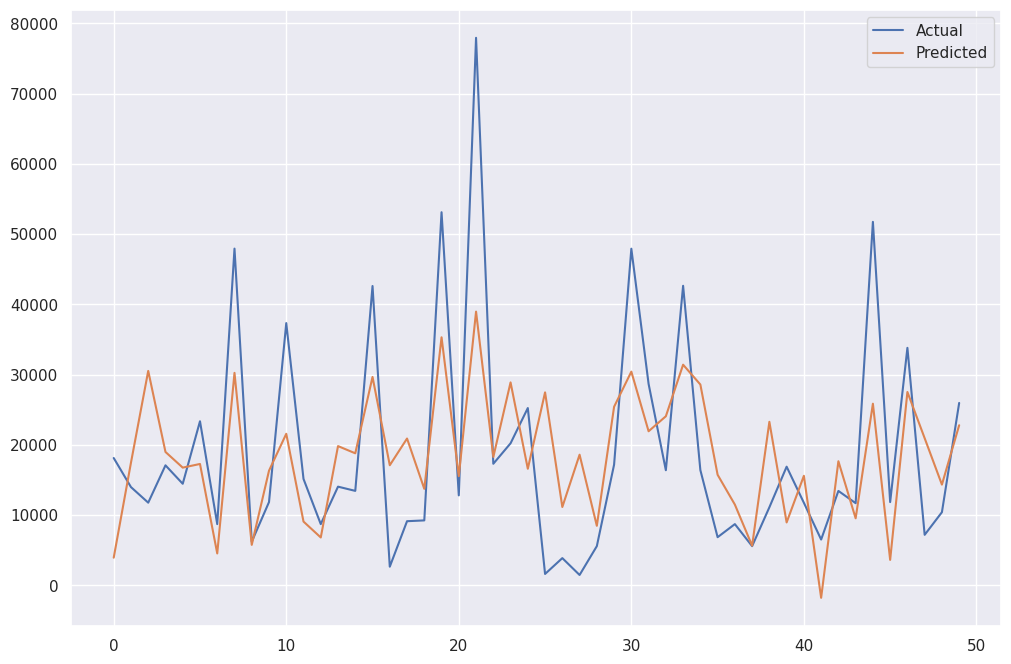

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 8720.62
Mean Squared Error of the model is : 138740127.84
Root Mean Squared Error of the model is : 11778.8
R-squared value of the model is : 0.348


## kNN

In [ ]:
knn= KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
kn.head()

y_test        y_pred
0  18128.440195  15755.260171
1  13988.000000  17569.555024
2  11772.000000  12735.845098
3  17087.000000  20371.735049
4  14463.000000  13842.875000

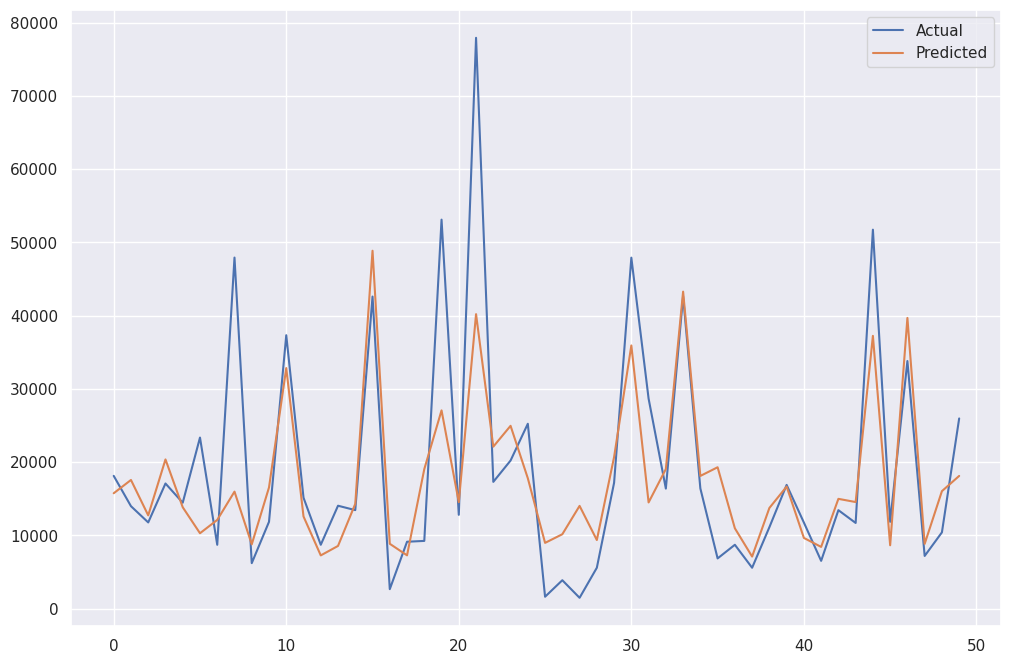

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 6456.761
Mean Squared Error of the model is : 96814254.438
Root Mean Squared Error of the model is : 9839.423
R-squared value of the model is : 0.545


In [ ]:
cv_score = cross_val_score(knn, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(knn, x_train,y_train, scoring="r2", cv=5)
pred = knn.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-9732.653914 0.522667 0.545342


### GridSearch

In [ ]:
k_range = list(range(5, 16))
lsize = list(range(10, 50, 5))
weight_options = ['uniform', 'distance']
metr = ['minkowski', 'l1', 'l2']
param_grid = dict(n_neighbors=k_range, weights=weight_options, leaf_size=lsize, metric=metr)

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
knn= KNeighborsRegressor(n_neighbors=11, leaf_size=10, metric='l1', weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

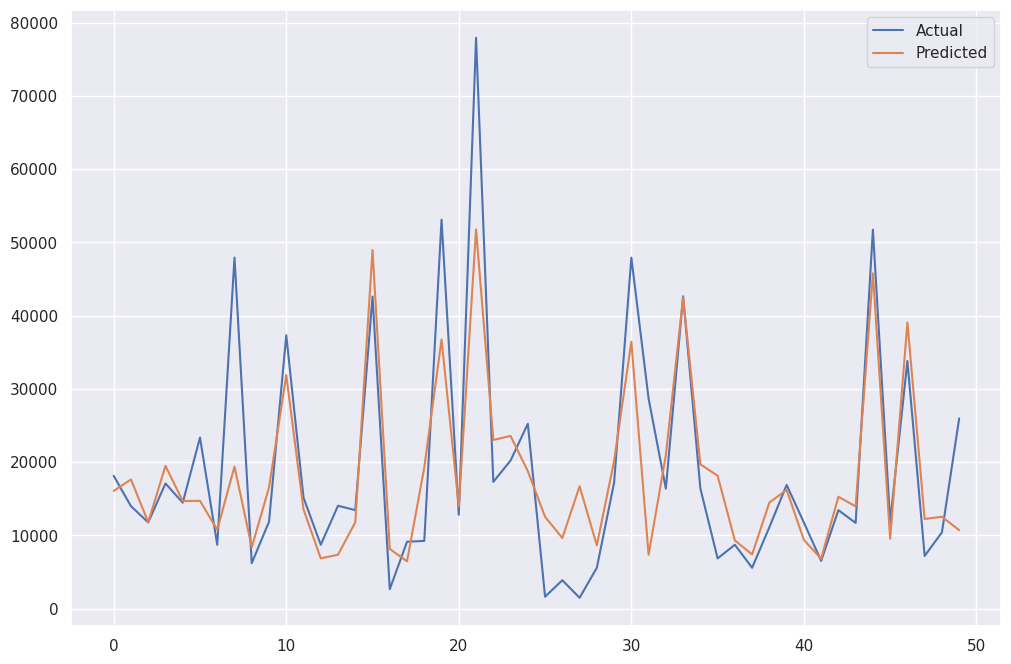

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5809.764
Mean Squared Error of the model is : 84312749.792
Root Mean Squared Error of the model is : 9182.197
R-squared value of the model is : 0.604


In [ ]:
cv_score = cross_val_score(knn, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(knn, x_train,y_train, scoring="r2", cv=5)
pred = knn.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-8890.575201 0.601774 0.604051


## GradientBoostingRegression

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.4,random_state=1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})


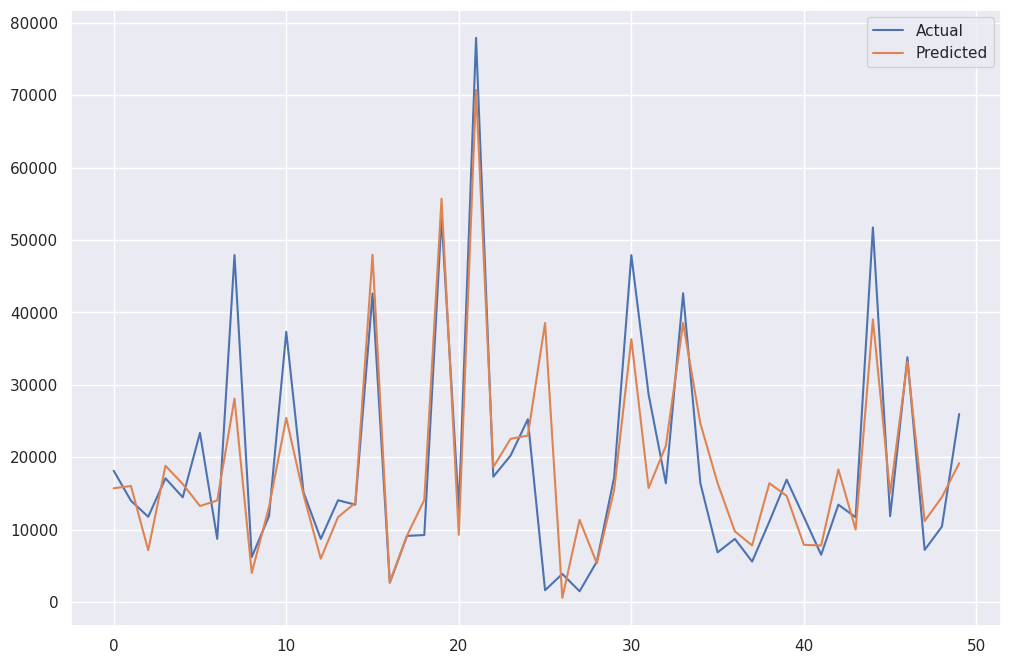

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5012.665
Mean Squared Error of the model is : 58402735.852
Root Mean Squared Error of the model is : 7642.168
R-squared value of the model is : 0.726


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7688.460030 0.701997 0.725730


### GridSearch

In [ ]:
parameters = {'random_state': range (5, 16, 2),
              'learning_rate': [0.05, 0.1, 0.15],
              'min_samples_split': [2,10,20],
              'max_depth': [3, 4, 5, 6, 8],
              "n_estimators": range (100, 401, 50)}

In [ ]:
grid = GridSearchCV(gbr, parameters, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

In [ ]:
grid.best_params_

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.14,random_state=5)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head()

y_test        y_pred
0  18128.440195  18172.053086
1  13988.000000  16759.782271
2  11772.000000   8757.626749
3  17087.000000  18636.338347
4  14463.000000  16673.109728

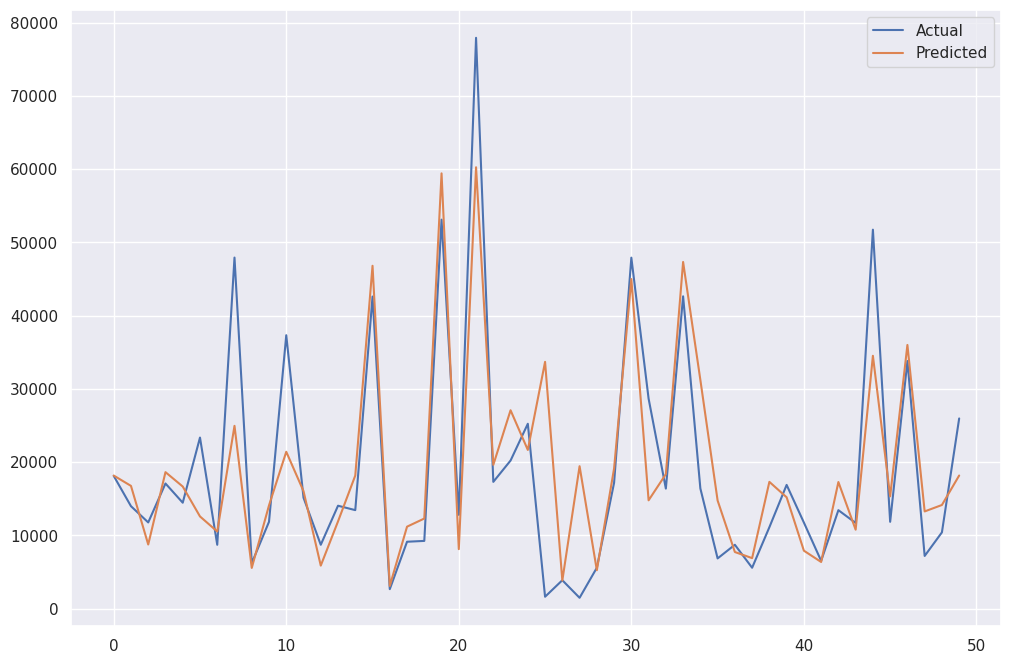

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5119.385
Mean Squared Error of the model is : 59421736.139
Root Mean Squared Error of the model is : 7708.55
R-squared value of the model is : 0.721


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7534.251440 0.713887 0.720944


## RandomForest

In [ ]:
Rf = RandomForestRegressor(n_estimators = 400,max_depth=15, max_features='log2',random_state=1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf.head()

y_test        y_pred
0  18128.440195  13043.324194
1  13988.000000  16927.157954
2  11772.000000  11893.316449
3  17087.000000  19571.980802
4  14463.000000  15926.585058

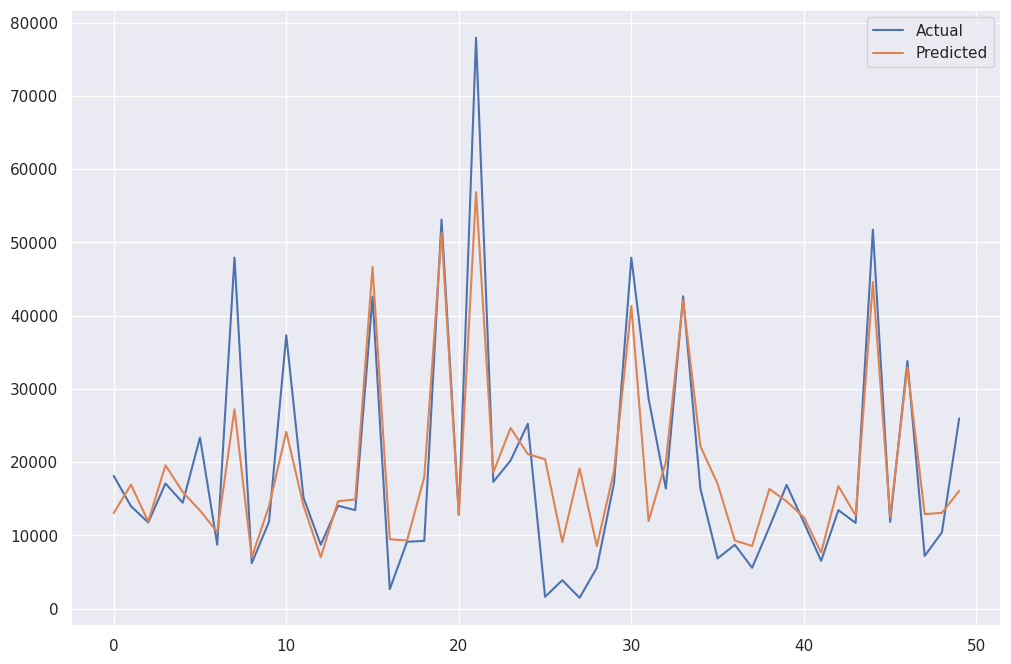

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5098.594
Mean Squared Error of the model is : 62757050.166
Root Mean Squared Error of the model is : 7921.935
R-squared value of the model is : 0.705


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7634.603629 0.706271 0.705281


### GridSearch

In [ ]:
parametrs = { 'n_estimators': range (100, 401, 50),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
grid = GridSearchCV(Rf, parametrs, cv=5)
grid.fit(x_train, y_train) # 7940 s

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, max_features='log2',
                                             n_estimators=400, random_state=1),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(100, 401, 50)})

In [ ]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
Rf = RandomForestRegressor(n_estimators = 400, max_depth=11, min_samples_split = 2, min_samples_leaf = 1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
# rf.head()

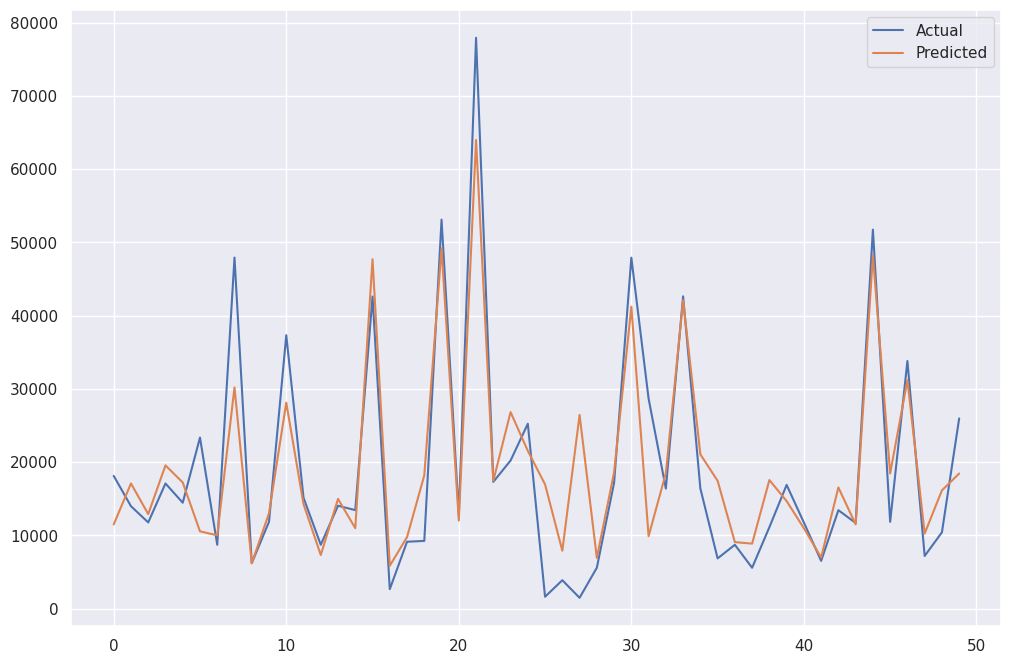

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4945.765
Mean Squared Error of the model is : 59267007.189
Root Mean Squared Error of the model is : 7698.507
R-squared value of the model is : 0.722


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7549.429176 0.714378 0.721671


## XGBRegressor

In [ ]:
# from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=6,n_estimators = 260,random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

[13:08:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


y_test        y_pred
0  18128.440195  14643.528320
1  13988.000000  16150.526367
2  11772.000000  12627.500977
3  17087.000000  19799.369141
4  14463.000000  14098.478516

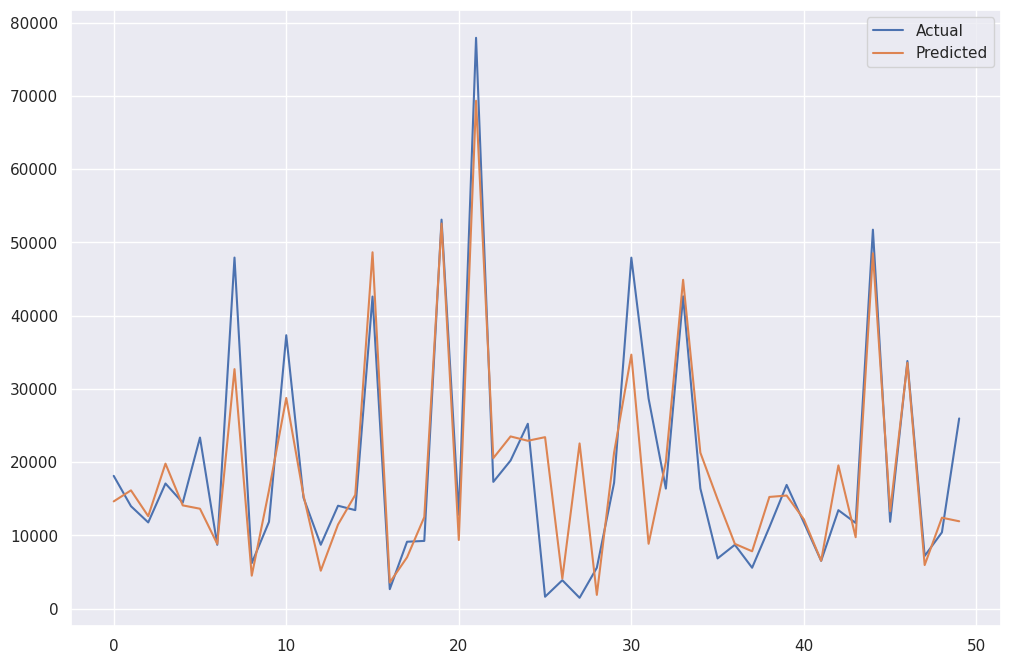

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4758.641
Mean Squared Error of the model is : 55873511.133
Root Mean Squared Error of the model is : 7474.859
R-squared value of the model is : 0.738


In [ ]:
cv_score = cross_val_score(xg, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(xg, x_train,y_train, scoring="r2", cv=5)
pred = xg.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

[13:08:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:07] WARNING: ../src/objective/regression_

### GridSearch

In [ ]:
params = {
        'min_child_weight': [1, 5, 6, 8, 10],
        'max_depth': [3, 4, 5, 6, 8],
        'n_estimators': range (100, 401, 10)
        }

In [ ]:
grid = GridSearchCV(xg, parametrs, cv=5)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
# from xgboost import XGBRegressor
xg = XGBRegressor(max_depth=8, n_estimators=400, random_state=3, learning_rate=0.14)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

y_test        y_pred
0  18128.440195  14967.234375
1  13988.000000  17626.287109
2  11772.000000  12041.025391
3  17087.000000  22309.773438
4  14463.000000  14361.338867

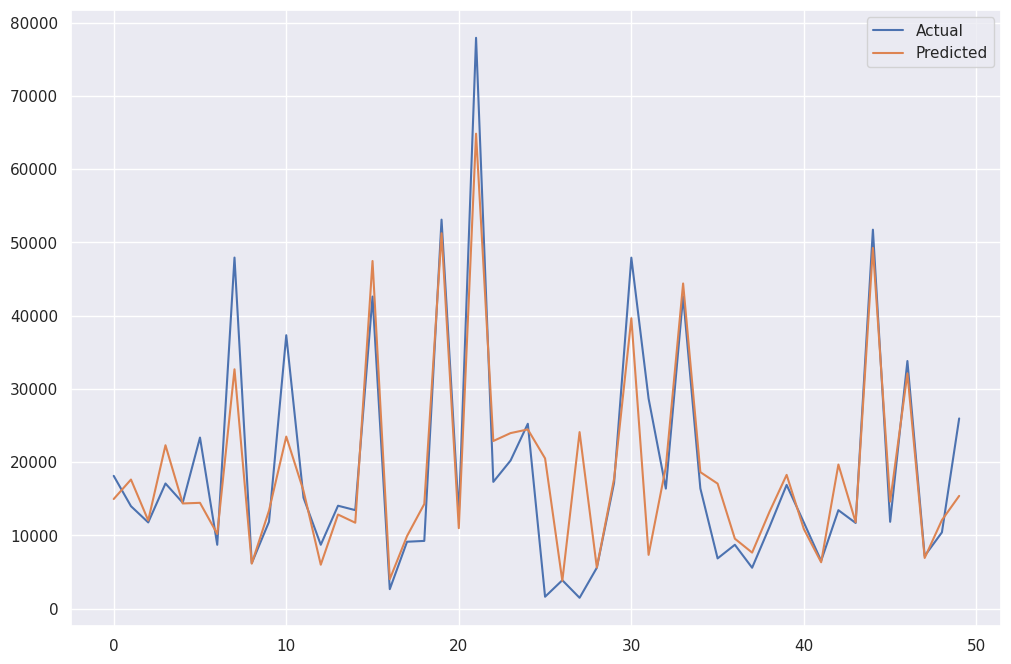

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4489.711
Mean Squared Error of the model is : 52115892.697
Root Mean Squared Error of the model is : 7219.134
R-squared value of the model is : 0.755


In [ ]:
cv_score = cross_val_score(xg, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(xg, x_train,y_train, scoring="r2", cv=5)
pred = xg.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7340.357498 0.728427 0.755254


## Формирование таблицы результатов

In [ ]:
models= [LinearRegression(),
         KNeighborsRegressor(n_neighbors=11, leaf_size=10, metric='l1', weights='distance'),
         GradientBoostingRegressor(n_estimators=380,learning_rate=0.14,random_state=5),
         RandomForestRegressor(n_estimators = 400,max_depth=11, min_samples_split = 2, min_samples_leaf = 1),
         XGBRegressor(max_depth=8, n_estimators=400, random_state=3, learning_rate=0.14)]
scores= []
test_score = []
train_score=[]
train_times = []
names= []

In [ ]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, x_train, y_train, scoring= 'r2', cv= 5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score With Cross-Validation'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    score1=model.score(x_train, y_train)
    train_score.append(score1)
    score2=model.score(x_test, y_test)
    test_score.append(score2)
df['Test_Score'] = test_score
df['Train_Score'] = train_score

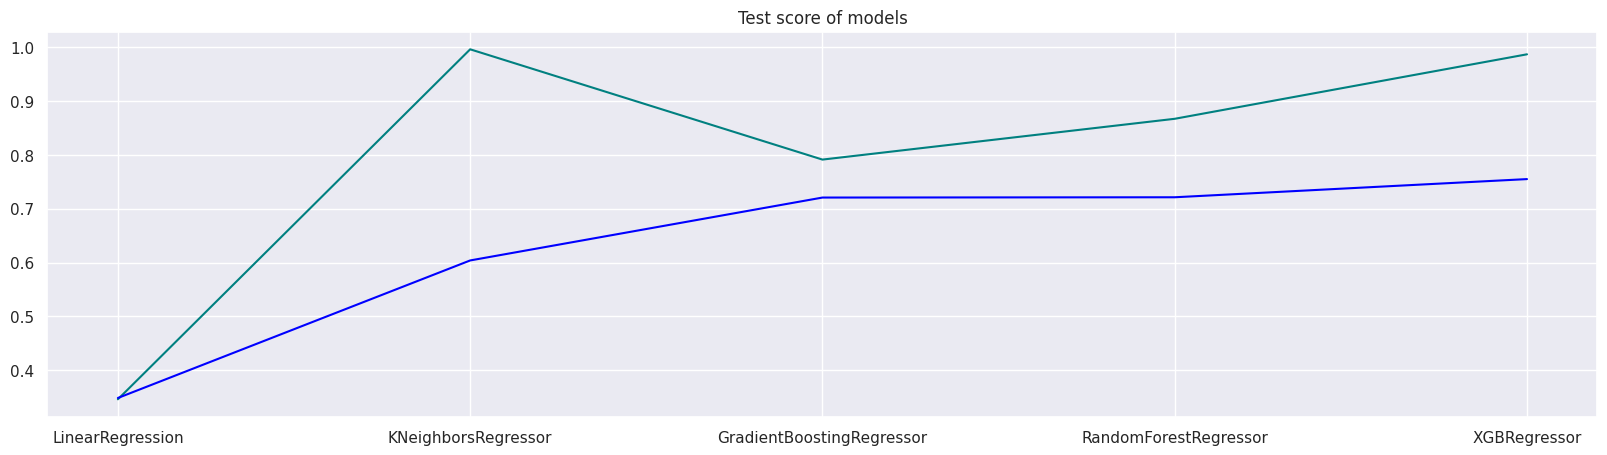

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['Model'],df['Train_Score'], color='teal')
plt.plot(df['Model'],df['Test_Score'], color='blue')
plt.title('Test score of models')
plt.show();

In [ ]:
df

Model  Score With Cross-Validation       Time  \
0           LinearRegression                     0.342796   0.117629   
1        KNeighborsRegressor                     0.601774   3.135764   
2  GradientBoostingRegressor                     0.713887  26.463822   
3      RandomForestRegressor                     0.714041  59.169979   
4               XGBRegressor                     0.728427  37.848089   

   Test_Score  Train_Score  
0    0.348450     0.345968  
1    0.604051     0.996483  
2    0.720944     0.791508  
3    0.721477     0.867323  
4    0.755254     0.987190

# Различные виды регрессий с выводом в таблицы cars_cleaned Price

## Подготовка тренировочного и тестового (70/30) наборов из cars_cleaned

In [ ]:
cars_cleaned.head()

Price         Levy  Manufacturer  Model  Prod_year  Category  \
1  16621  1018.000000             8    658       2011         4   
2   8467   879.440195            21    684       2006         3   
3   3607   862.000000            16    661       2011         4   
5  39493   891.000000            23   1305       2016         4   
6   1803   761.000000            58   1154       2010         3   

   Leather_inter  Type  EngV  Mileage  Cylinders  Gearbox  Drive  Doors  \
1          False     4   3.0   192000         10        2      0      4   
2          False     4   2.0   200000          5        3      1      4   
3           True     2   2.5   168966          5        0      0      4   
5           True     1   2.0   160931          5        0      1      4   
6           True     2   2.0   258909          5        0      1      4   

   Steering  Color  Airbags  Turbo  
1         0      1        8  False  
2         1      1        2  False  
3         0     14        0  False  
5         0     14        4  False  
6         0     14       12  False

In [ ]:
X = cars_cleaned.drop(['Price'], axis=1).values
Y = cars_cleaned['Price'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.3 ,random_state=42)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

## LinearRegression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()

y_test        y_pred
0   14069  13720.773524
1   13172  19892.943395
2   29793  18609.464828
3   23602  21847.276179
4   17249  19917.222983

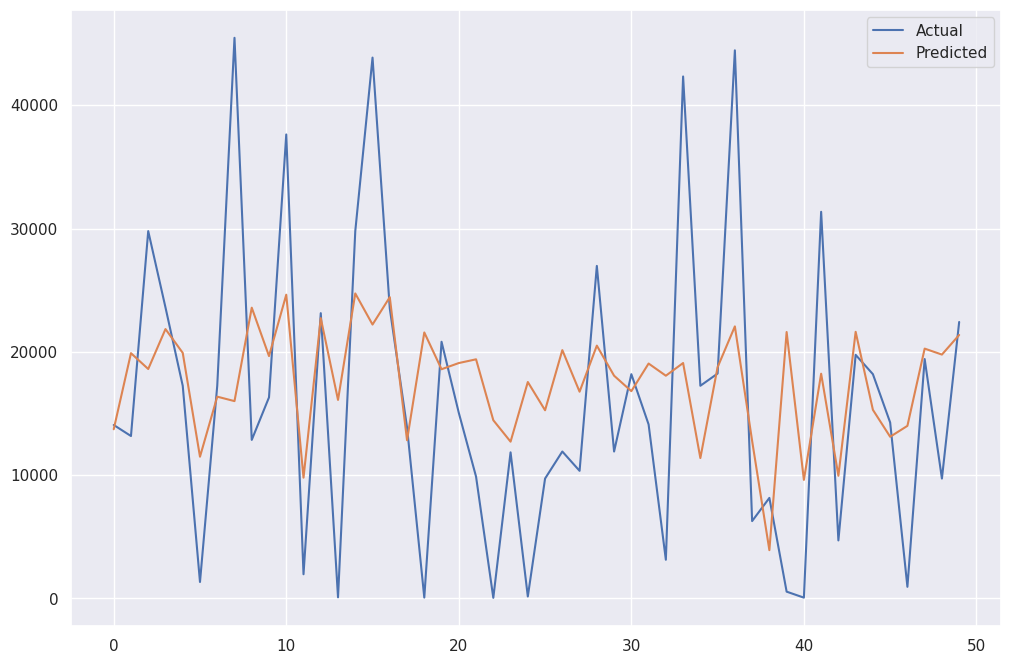

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 6816.818
Mean Squared Error of the model is : 82067957.213
Root Mean Squared Error of the model is : 9059.137
R-squared value of the model is : 0.306


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-6378.708815 0.672397 0.678230


## kNN

In [ ]:
knn= KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
kn.head()

y_test     y_pred
0   14069  19247.875
1   13172   8614.375
2   29793  31380.500
3   23602  28960.750
4   17249  10223.625

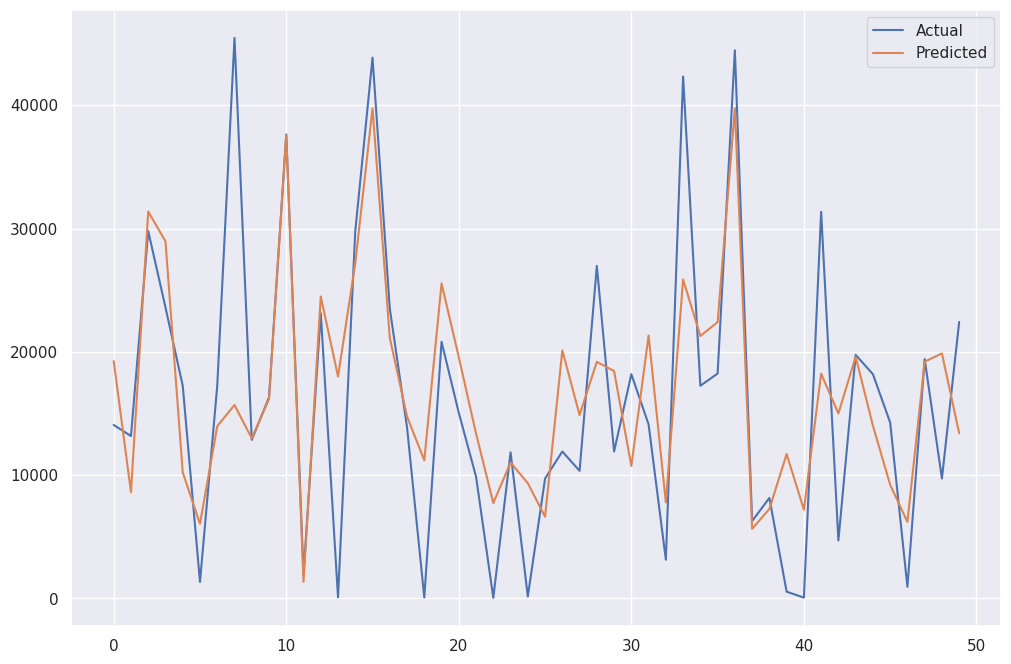

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5348.051
Mean Squared Error of the model is : 56903372.154
Root Mean Squared Error of the model is : 7543.432
R-squared value of the model is : 0.519


In [ ]:
cv_score = cross_val_score(knn, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(knn, x_train,y_train, scoring="r2", cv=5)
pred = knn.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7907.963614 0.496669 0.518575


### GridSearch

In [ ]:
k_range = list(range(5, 16))
lsize = list(range(10, 50, 5))
weight_options = ['uniform', 'distance']
metr = ['minkowski', 'l1', 'l2']
param_grid = dict(n_neighbors=k_range, weights=weight_options, leaf_size=lsize, metric=metr)

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
knn= KNeighborsRegressor(n_neighbors=12, leaf_size=10, metric='l1', weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

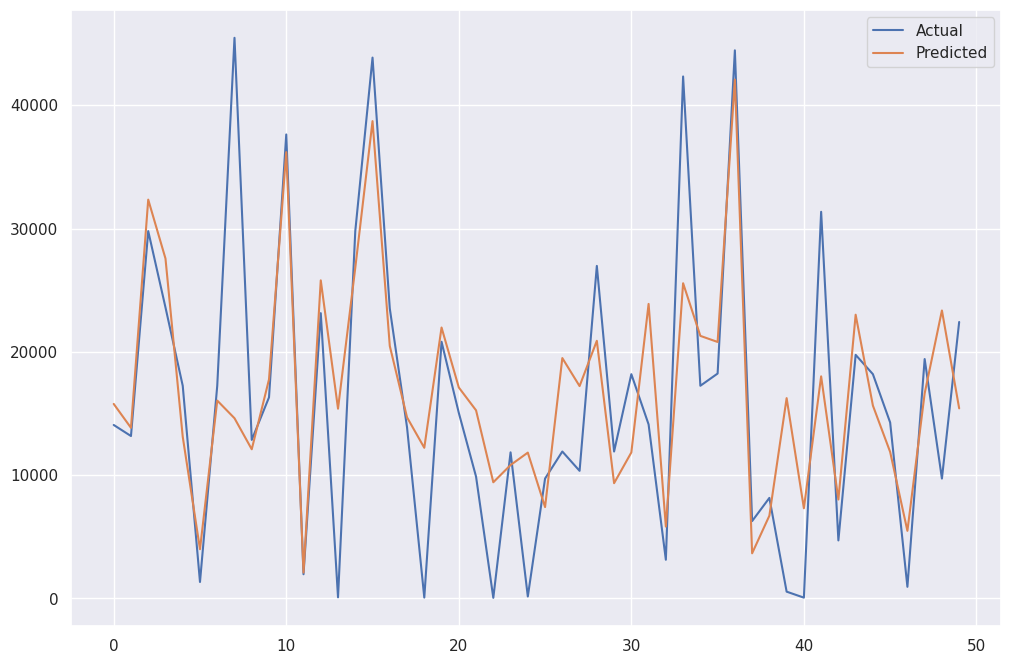

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4704.75
Mean Squared Error of the model is : 46222917.405
Root Mean Squared Error of the model is : 6798.744
R-squared value of the model is : 0.609


In [ ]:
cv_score = cross_val_score(knn, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(knn, x_train,y_train, scoring="r2", cv=5)
pred = knn.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-7110.088457 0.592963 0.608936


## GradientBoostingRegression

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.4,random_state=1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head()

y_test        y_pred
0   14069  15792.192899
1   13172   4525.258812
2   29793  22458.365383
3   23602  24164.064613
4   17249  17975.441018

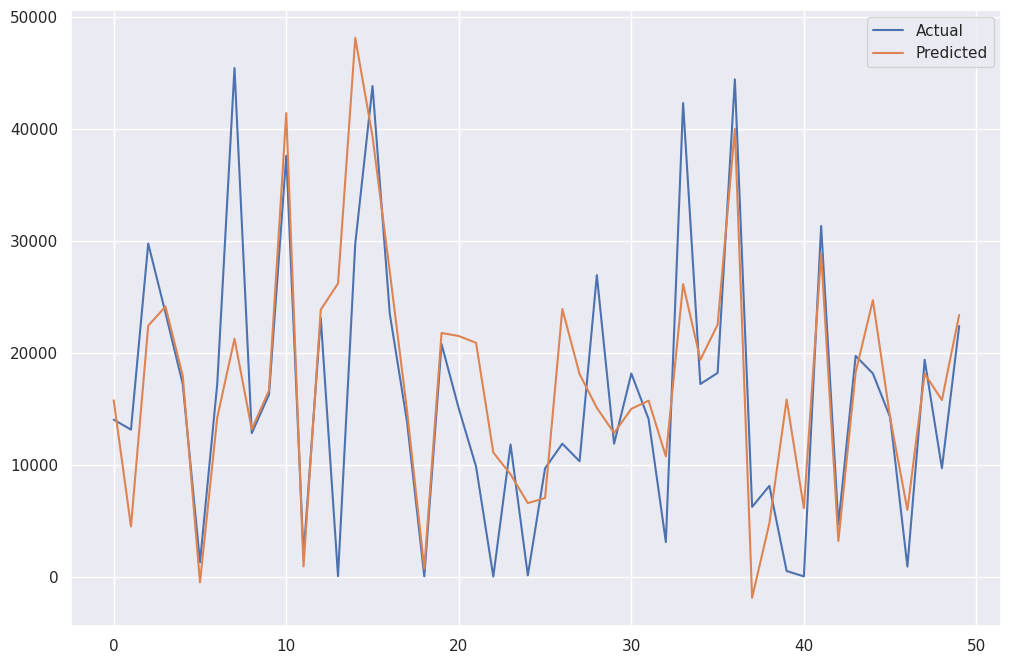

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4185.388
Mean Squared Error of the model is : 38032491.816
Root Mean Squared Error of the model is : 6167.049
R-squared value of the model is : 0.678


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-6378.708815 0.672397 0.678230


### GridSearch

In [ ]:
parameters = {'random_state': range (5, 16, 2),
              'learning_rate': [0.05, 0.1, 0.15],
              'min_samples_split': [2,10,20],
              'max_depth': [3, 4, 5, 6, 8],
              "n_estimators": range (100, 401, 50)}

In [ ]:
grid = GridSearchCV(gbr, parameters, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

In [ ]:
grid.best_params_

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.14,random_state=5)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head()

y_test        y_pred
0   14069  15049.171767
1   13172   6511.936736
2   29793  23384.917040
3   23602  23650.257047
4   17249  18298.545524

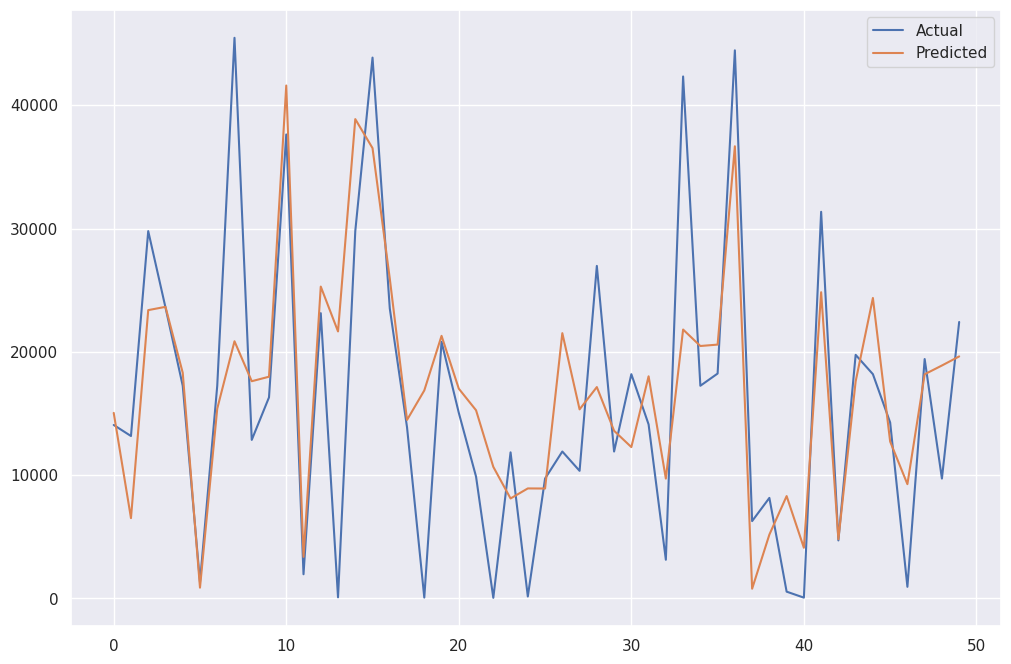

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4221.617
Mean Squared Error of the model is : 38277406.401
Root Mean Squared Error of the model is : 6186.874
R-squared value of the model is : 0.676


In [ ]:
cv_score = cross_val_score(gbr, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(gbr, x_train,y_train, scoring="r2", cv=5)
pred = gbr.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-6305.208549 0.680093 0.676158


## RandomForest

In [ ]:
Rf = RandomForestRegressor(n_estimators = 300, max_depth=11, min_samples_split = 2, min_samples_leaf = 1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
# rf.head()

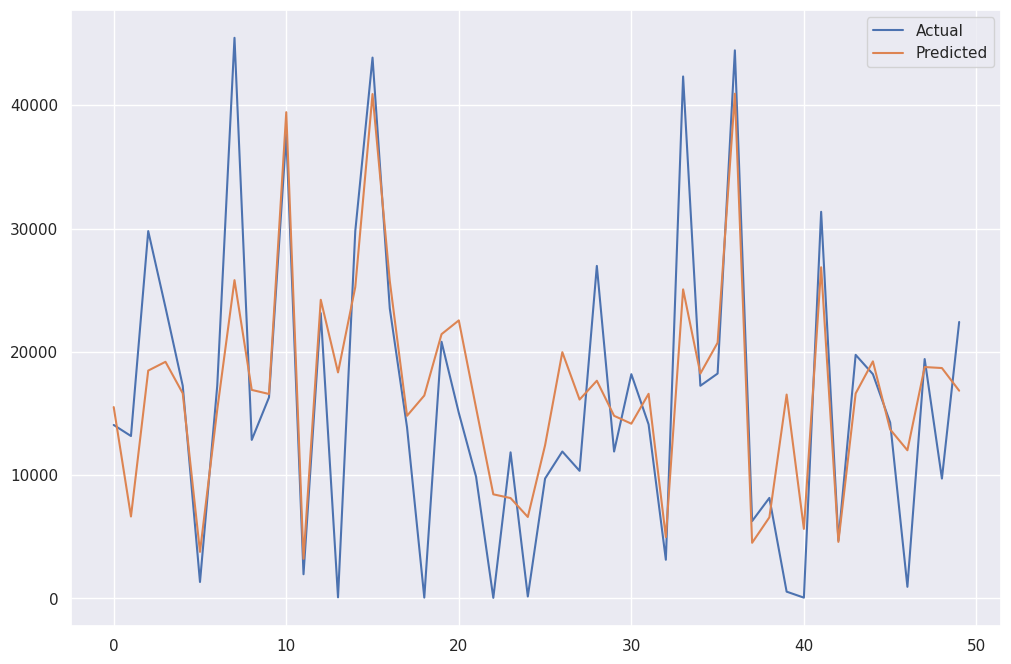

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4060.797
Mean Squared Error of the model is : 35501477.944
Root Mean Squared Error of the model is : 5958.312
R-squared value of the model is : 0.7


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-6219.465075 0.688446 0.699644


### GridSearch

In [ ]:
parametrs = { 'n_estimators': range (100, 401, 50),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
grid = GridSearchCV(Rf, parametrs, cv=5)
grid.fit(x_train, y_train) #  s

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, max_features='log2',
                                             n_estimators=400, random_state=1),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(100, 401, 50)})

In [ ]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
Rf = RandomForestRegressor(n_estimators = 400, max_depth=15, min_samples_split = 4, min_samples_leaf = 1)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
# rf.head()

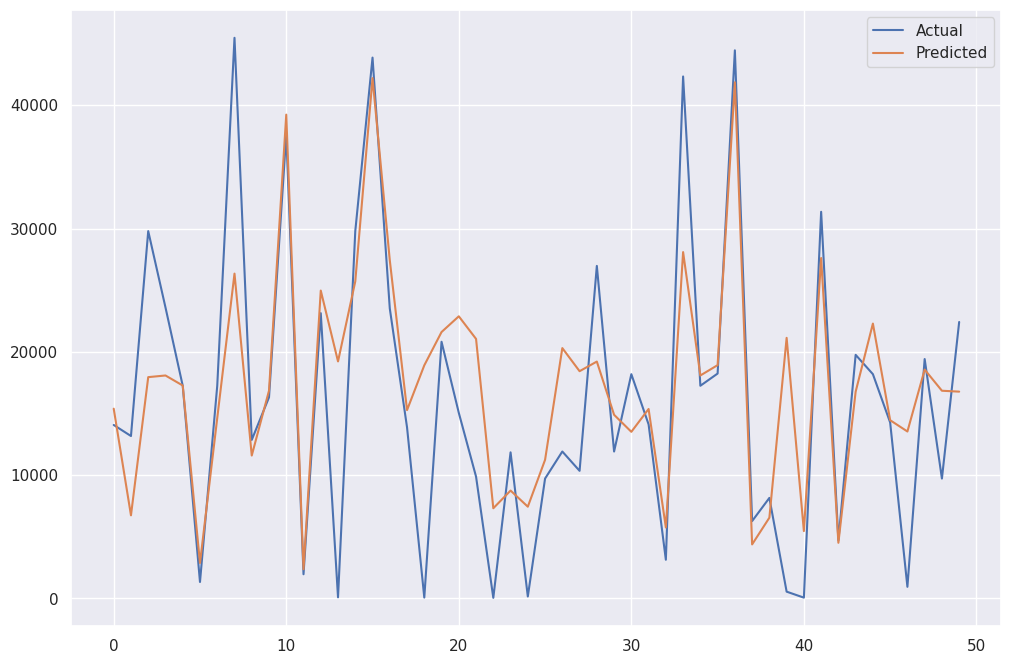

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 3856.675
Mean Squared Error of the model is : 33529154.977
Root Mean Squared Error of the model is : 5790.437
R-squared value of the model is : 0.716


In [ ]:
cv_score = cross_val_score(Rf, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(Rf, x_train,y_train, scoring="r2", cv=5)
pred = Rf.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-6092.375412 0.701712 0.716330


## XGBRegressor

In [ ]:
# from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=6,n_estimators = 260,random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

[13:44:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


y_test        y_pred
0   14069  16231.733398
1   13172   3521.277100
2   29793  19636.509766
3   23602  18338.791016
4   17249  17555.445312

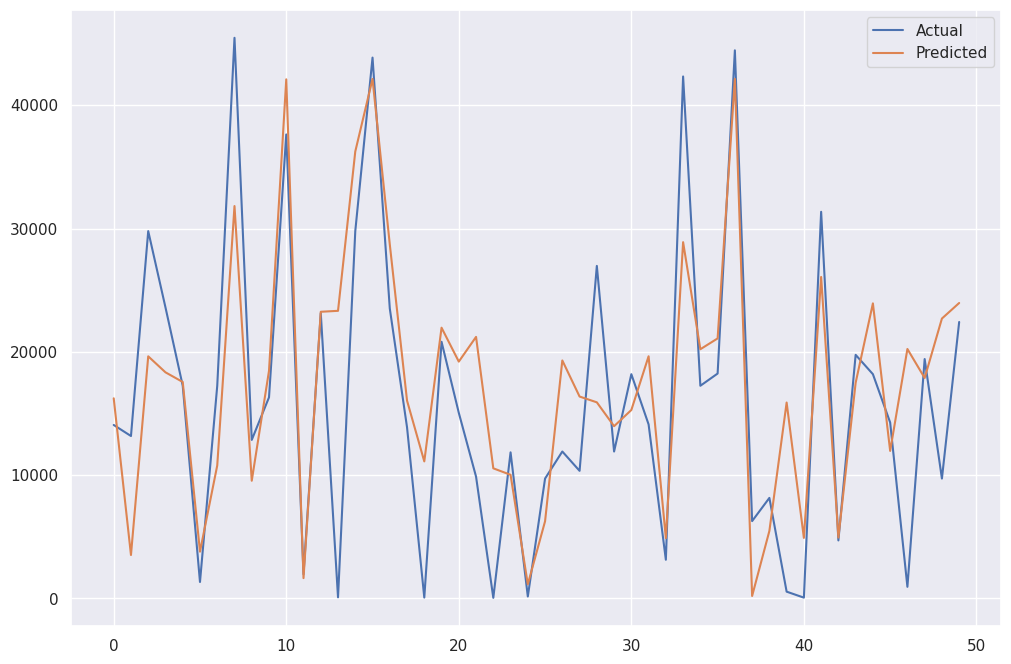

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4020.273
Mean Squared Error of the model is : 35392400.839
Root Mean Squared Error of the model is : 5949.151
R-squared value of the model is : 0.701


In [ ]:
cv_score = cross_val_score(xg, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(xg, x_train,y_train, scoring="r2", cv=5)
pred = xg.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

[13:44:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:26] WARNING: ../src/objective/regression_

### GridSearch

In [ ]:
params = {
        'min_child_weight': [1, 5, 6, 8, 10],
        'max_depth': [3, 4, 5, 6, 8],
        'n_estimators': range (100, 401, 10)
        }

In [ ]:
grid = GridSearchCV(xg, parametrs, cv=5)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
# from xgboost import XGBRegressor
xg = XGBRegressor(max_depth=8, n_estimators=400, random_state=3, learning_rate=0.14)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

y_test        y_pred
0   14069  16624.238281
1   13172   5511.697266
2   29793  28033.941406
3   23602  16514.710938
4   17249  18893.312500

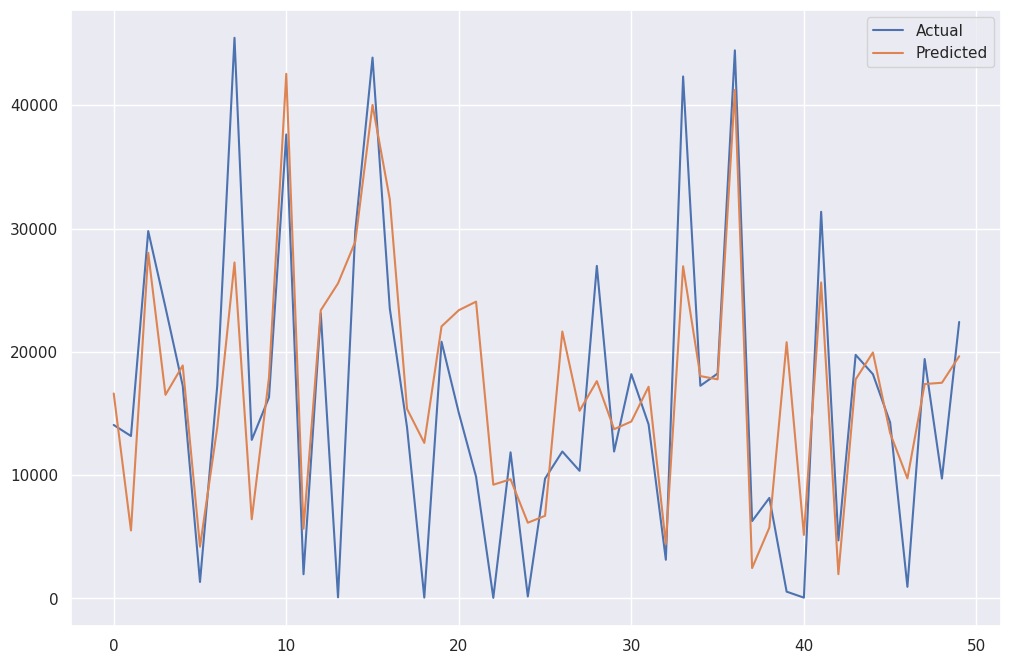

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 3909.893
Mean Squared Error of the model is : 34127351.745
Root Mean Squared Error of the model is : 5841.862
R-squared value of the model is : 0.711


In [ ]:
cv_score = cross_val_score(xg, x_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
cv_score_2 = cross_val_score(xg, x_train,y_train, scoring="r2", cv=5)
pred = xg.predict(x_test)
print("%f %f %f" % (cv_score.mean(), cv_score_2.mean(), metrics.r2_score(y_test, pred)))

-6150.485048 0.695438 0.711269


## Формирование таблицы результатов

In [ ]:
models= [LinearRegression(),
         KNeighborsRegressor(n_neighbors=11, leaf_size=10, metric='l1', weights='distance'),
         GradientBoostingRegressor(n_estimators=380,learning_rate=0.14,random_state=5),
         RandomForestRegressor(n_estimators = 400, max_depth=15, min_samples_split = 2, min_samples_leaf = 1),
         XGBRegressor(max_depth=8, n_estimators=400, random_state=3, learning_rate=0.14)]
scores= []
test_score = []
train_score=[]
train_times = []
names= []

In [ ]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, x_train, y_train, scoring= 'r2', cv= 5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score With Cross-Validation'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    score1=model.score(x_train, y_train)
    train_score.append(score1)
    score2=model.score(x_test, y_test)
    test_score.append(score2)
df['Test_Score'] = test_score
df['Train_Score'] = train_score

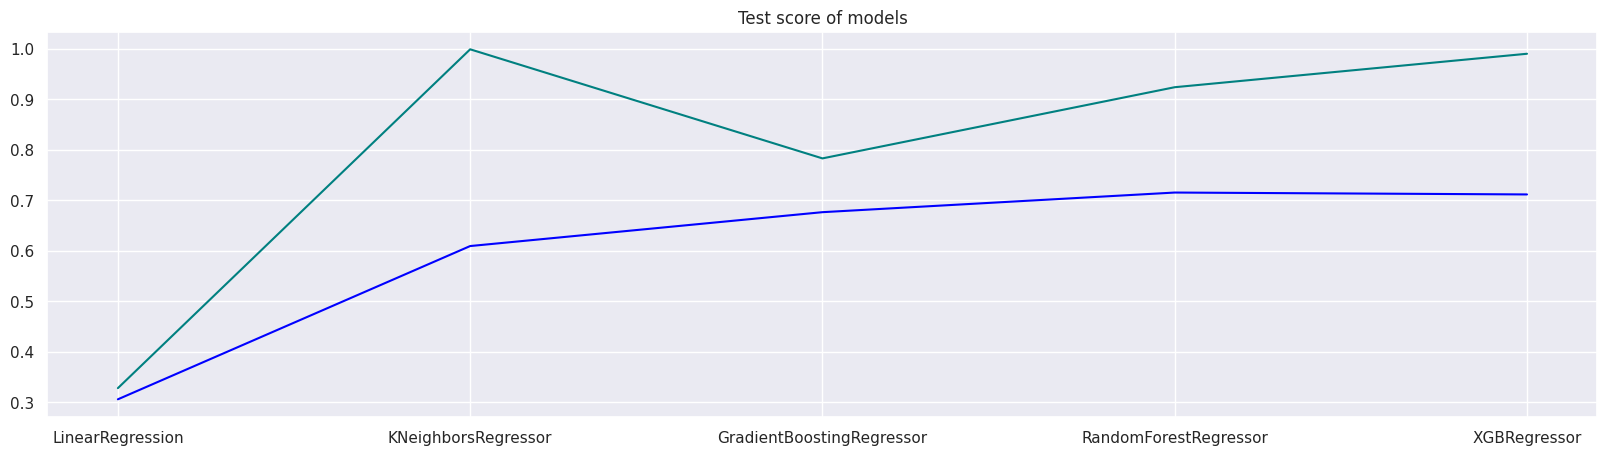

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['Model'],df['Train_Score'], color='teal')
plt.plot(df['Model'],df['Test_Score'], color='blue')
plt.title('Test score of models')
plt.show();

In [ ]:
df

Model  Score With Cross-Validation       Time  \
0           LinearRegression                     0.323837   0.163867   
1        KNeighborsRegressor                     0.592064   1.581614   
2  GradientBoostingRegressor                     0.680093  17.472533   
3      RandomForestRegressor                     0.700368  55.193146   
4               XGBRegressor                     0.695438  23.991033   

   Test_Score  Train_Score  
0    0.305673     0.327793  
1    0.609100     0.998611  
2    0.676158     0.782633  
3    0.715020     0.923559  
4    0.711269     0.989799